In [2]:
#read the datafile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob



In [3]:
#clean data file

medicare_claims_csv_files = glob.glob('Medicare_Claims_data_part_*.csv')

In [4]:
df_list = []

for file in medicare_claims_csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

In [5]:
merged_df = pd.concat(df_list, ignore_index = True)

In [6]:
merged_df.head()

,cur_clm_uniq_id,bene_mbi_id,fac_prvdr_npi_num,clm_from_dt,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,clm_dgns_cd,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd
0,1345381,10065,1.320330e+09,4/1/2016,2/17/2016,N926,NaN,NaN,2.0,93571,77.04,NaN,I10,NaN,NaN,85.85,8
1,526682,11329,1.630461e+09,3/7/2018,1/28/2018,E780,NaN,NaN,6.0,80053,34.88,NaN,I10,NaN,NaN,81.47,6
2,1013399,11606,1.029737e+09,5/30/2018,5/9/2016,I129,NaN,NaN,2.0,84165,10.69,NaN,I10,NaN,NaN,12.53,11
3,550379,13080,1.835759e+09,2/2/2018,3/14/2018,I4891,101.84,395.427642,4.0,96375,1.24,2.0,Z951,NaN,NaN,NaN,NaN
4,874017,12778,1.043510e+09,12/1/2018,11/30/2018,D472,NaN,NaN,1.0,NaN,41.58,NaN,I10,NaN,NaN,109.53,4


In [7]:
merged_df.shape

(1000000, 17)

In [8]:
missing_data = merged_df.isnull().sum()
missing_data

cur_clm_uniq_id                      0
bene_mbi_id                          0
fac_prvdr_npi_num                  930
clm_from_dt                          0
clm_thru_dt                          0
prncpl_dgns_cd                     105
clm_pmt_amt                     588330
clm_mdcr_instnl_tot_chrg_amt    580005
clm_line_num                     54451
clm_line_hcpcs_cd                 6875
clm_line_cvrd_pd_amt             56486
clm_val_sqnc_num_dgns           602835
clm_dgns_cd                         13
clm_val_sqnc_num_prcdr          957147
clm_prcdr_cd                    956968
clm_line_alowd_chrg_amt         414125
clm_prvdr_spclty_cd             441575
dtype: int64

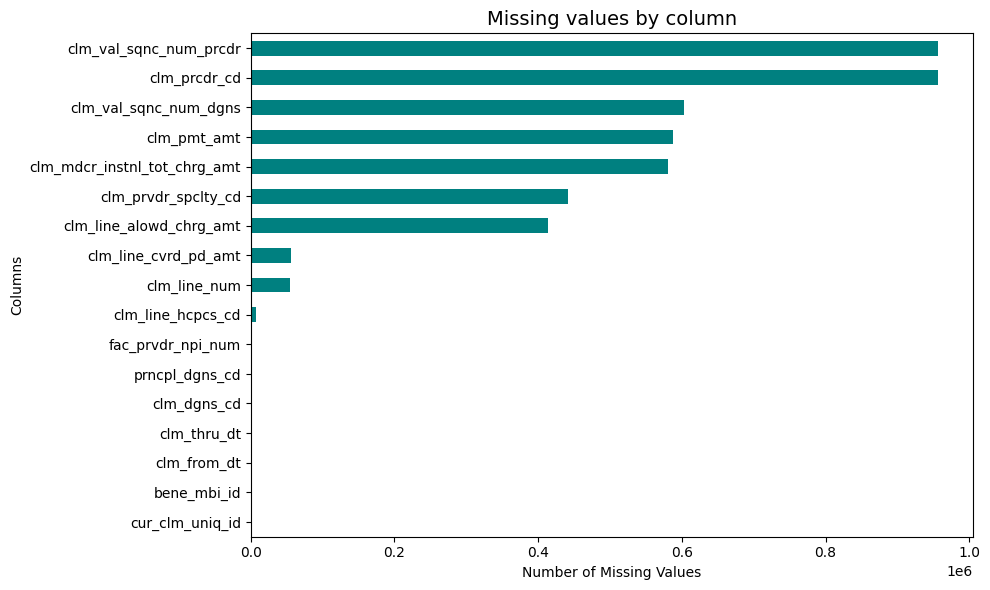

In [9]:
plt.figure(figsize=(10,6))
missing_data.sort_values().plot(kind='barh', color='teal')
plt.title("Missing values by column", fontsize = 14)
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

In [10]:
merged_df.columns

Index(['cur_clm_uniq_id', 'bene_mbi_id', 'fac_prvdr_npi_num', 'clm_from_dt',
       'clm_thru_dt', 'prncpl_dgns_cd', 'clm_pmt_amt',
       'clm_mdcr_instnl_tot_chrg_amt', 'clm_line_num', 'clm_line_hcpcs_cd',
       'clm_line_cvrd_pd_amt', 'clm_val_sqnc_num_dgns', 'clm_dgns_cd',
       'clm_val_sqnc_num_prcdr', 'clm_prcdr_cd', 'clm_line_alowd_chrg_amt',
       'clm_prvdr_spclty_cd'],
      dtype='object')

In [11]:
merged_df.describe(include="all")

,cur_clm_uniq_id,bene_mbi_id,fac_prvdr_npi_num,clm_from_dt,clm_thru_dt,prncpl_dgns_cd,clm_pmt_amt,clm_mdcr_instnl_tot_chrg_amt,clm_line_num,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_val_sqnc_num_dgns,clm_dgns_cd,clm_val_sqnc_num_prcdr,clm_prcdr_cd,clm_line_alowd_chrg_amt,clm_prvdr_spclty_cd
count,1.000000e+06,1000000.000000,9.990700e+05,1000000,1000000,999895,411670.000000,419995.000000,945549.000000,993125,943514.000000,397165.000000,999987,42853.0,43032,585875.000000,558425
unique,NaN,NaN,NaN,1350,1094,4053,NaN,NaN,NaN,2199,NaN,NaN,1849,NaN,88,NaN,89
top,NaN,NaN,NaN,12/29/2018,12/29/2018,I10,NaN,NaN,NaN,36415,NaN,NaN,I10,NaN,4A023N7,NaN,69
freq,NaN,NaN,NaN,10625,14626,10759,NaN,NaN,NaN,68638,NaN,NaN,600569,NaN,3376,NaN,158890
mean,8.590467e+05,10181.975303,1.631983e+09,NaN,NaN,NaN,2850.883712,17021.708677,4.620723,NaN,38.614874,4.513897,NaN,2.0,NaN,59.847093,NaN
std,4.448251e+05,3645.606427,8.516557e+08,NaN,NaN,NaN,4140.918293,26115.612179,6.626001,NaN,89.382442,3.633880,NaN,0.0,NaN,73.130361,NaN
min,1.000200e+05,10.000000,1.001502e+09,NaN,NaN,NaN,-100.700000,0.020000,1.000000,NaN,-33.800000,1.000000,NaN,2.0,NaN,0.000000,NaN
25%,4.904090e+05,10341.000000,1.279201e+09,NaN,NaN,NaN,98.110000,700.035835,1.000000,NaN,2.150000,2.000000,NaN,2.0,NaN,10.640000,NaN
50%,7.989925e+05,11387.000000,1.572350e+09,NaN,NaN,NaN,1054.405000,8517.569832,2.000000,NaN,6.530000,4.000000,NaN,2.0,NaN,18.260000,NaN
75%,1.226340e+06,12108.000000,1.780011e+09,NaN,NaN,NaN,4693.400000,18829.577105,4.000000,NaN,47.220000,6.000000,NaN,2.0,NaN,88.900000,NaN


In [12]:
merged_df.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   cur_clm_uniq_id               1000000 non-null  int64  
 1   bene_mbi_id                   1000000 non-null  int64  
 2   fac_prvdr_npi_num             999070 non-null   float64
 3   clm_from_dt                   1000000 non-null  object 
 4   clm_thru_dt                   1000000 non-null  object 
 5   prncpl_dgns_cd                999895 non-null   object 
 6   clm_pmt_amt                   411670 non-null   float64
 7   clm_mdcr_instnl_tot_chrg_amt  419995 non-null   float64
 8   clm_line_num                  945549 non-null   float64
 9   clm_line_hcpcs_cd             993125 non-null   object 
 10  clm_line_cvrd_pd_amt          943514 non-null   float64
 11  clm_val_sqnc_num_dgns         397165 non-null   float64
 12  clm_dgns_cd                  

In [13]:
merged_df['clm_from_dt'] = pd.to_datetime(merged_df['clm_from_dt'], errors='coerce')
merged_df['clm_thru_dt'] = pd.to_datetime(merged_df['clm_thru_dt'], errors='coerce')


In [14]:
merged_df['fac_prvdr_npi_num'] = merged_df['fac_prvdr_npi_num'].astype('Int64')
merged_df['clm_line_num'] = merged_df['clm_line_num'].astype('Int64')


In [15]:
market_hcpcs = ['J1885', 'J2250', 'J2704', 'J3010']

A = merged_df['clm_line_hcpcs_cd'].isin(market_hcpcs).sum()
A



np.int64(15268)

In [16]:
qualifying_claims = (
    merged_df.loc[
        merged_df['clm_line_hcpcs_cd'].isin(market_hcpcs),
        'cur_clm_uniq_id'
    ]
    .dropna()
    .unique()
)

B = len(qualifying_claims)
B


15145

In [17]:
filtered_df = merged_df[
    merged_df['cur_clm_uniq_id'].isin(qualifying_claims)
].copy()

C = filtered_df.shape[0]
C


28368

In [18]:
filtered_df.columns

Index(['cur_clm_uniq_id', 'bene_mbi_id', 'fac_prvdr_npi_num', 'clm_from_dt',
       'clm_thru_dt', 'prncpl_dgns_cd', 'clm_pmt_amt',
       'clm_mdcr_instnl_tot_chrg_amt', 'clm_line_num', 'clm_line_hcpcs_cd',
       'clm_line_cvrd_pd_amt', 'clm_val_sqnc_num_dgns', 'clm_dgns_cd',
       'clm_val_sqnc_num_prcdr', 'clm_prcdr_cd', 'clm_line_alowd_chrg_amt',
       'clm_prvdr_spclty_cd'],
      dtype='object')

In [19]:
hcp_df = pd.read_csv("HCP_demographics_data.csv")
patient_df = pd.read_csv("Patient_demographics_data.csv")
proc_df = pd.read_csv("Procedure_Code_Mapping.csv")
zip_df = pd.read_csv("Zip_to_Territory_Mapping.csv")

In [20]:
hcp_df.columns

Index(['HCP NPI ID', 'Address', 'City', 'State', 'ZIP Code', 'Specialty'], dtype='object')

In [21]:
hcp_df['NPI'] = hcp_df['HCP NPI ID'].astype('Int64')
hcp_df['ZIP Code'] = hcp_df['ZIP Code'].astype(str).str.zfill(5)
hcp_df['Specialty'] = hcp_df['Specialty'].str.strip().str.upper()


In [22]:
hcp_df = hcp_df[['NPI', 'State', 'ZIP Code', 'Specialty']]

In [23]:
patient_df.columns

Index(['Patient_id', 'Age', 'Gender'], dtype='object')

In [24]:
patient_df['Patient_id'] = patient_df['Patient_id'].astype('Int64')
patient_df['Gender'] = patient_df['Gender'].str.upper().str[0]  # M / F


In [25]:
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 200]
age_labels = [
    '<18',
    '18-30',
    '31-40',
    '41-50',
    '51-60',
    '61-70',
    '71-80',
    '81+'
]


In [26]:
patient_df['age_group'] = pd.cut(
    patient_df['Age'],
    bins=age_bins,
    labels=age_labels,
    right=True
)


In [27]:
patient_df.head(5)

,Patient_id,Age,Gender,age_group
0,10,71,M,71-80
1,11,56,M,51-60
2,12,65,F,61-70
3,13,72,F,71-80
4,14,77,F,71-80


In [28]:
proc_df.columns

Index(['CPT Codes', 'Procedure Code Category', 'Operative Procedure',
       'Procedure Description', 'Procedure Code Descriptions'],
      dtype='object')

In [29]:
proc_df.head()

,CPT Codes,Procedure Code Category,Operative Procedure,Procedure Description,Procedure Code Descriptions
0,11008,HER,Herniorrhaphy,"Repair of inguinal, femoral, umbilical, or an...","Removal of prosthetic material or mesh, abdomi..."
1,11970,BRST,Breast surgery,Excision of lesion or tissue of breast includi...,Replacement of tissue expander(s) with permane...
2,19101,BRST,Breast surgery,Excision of lesion or tissue of breast includi...,"Biopsy of breast; open, incisional"
3,19105,BRST,Breast surgery,Excision of lesion or tissue of breast includi...,"Ablation, cryosurgical, of fibroadenoma, inclu..."
4,19110,BRST,Breast surgery,Excision of lesion or tissue of breast includi...,"Nipple exploration, with or without excision o..."


In [30]:
proc_df['CPT Codes'] = proc_df['CPT Codes'].astype(str).str.strip()
proc_df['Procedure Code Category'] = proc_df['Procedure Code Category'].str.upper()


In [31]:
proc_df = proc_df[['CPT Codes', 'Procedure Code Category']]

In [32]:
zip_df.columns

Index(['Zip Code', 'Territory Name', 'Region Name'], dtype='object')

In [33]:
zip_df.head()



,Zip Code,Territory Name,Region Name
0,501,"St Louis, MO",Midwest
1,544,"St Louis, MO",Midwest
2,601,"St Louis, MO",Midwest
3,602,"St Louis, MO",Midwest
4,603,"St Louis, MO",Midwest


In [34]:
zip_df.shape


(41683, 3)

In [35]:
zip_df.columns = (
    zip_df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)


In [36]:
zip_df.columns.tolist()


['zip_code', 'territory_name', 'region_name']

In [37]:
zip_df.info()
zip_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41683 entries, 0 to 41682
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   zip_code        41683 non-null  int64 
 1   territory_name  41683 non-null  object
 2   region_name     41683 non-null  object
dtypes: int64(1), object(2)
memory usage: 977.1+ KB


,zip_code,territory_name,region_name
0,501,"St Louis, MO",Midwest
1,544,"St Louis, MO",Midwest
2,601,"St Louis, MO",Midwest
3,602,"St Louis, MO",Midwest
4,603,"St Louis, MO",Midwest


In [38]:
zip_df['zip_code'] = zip_df['zip_code'].astype(str).str.zfill(5)


In [39]:
dx_map_df = pd.read_csv("diagnosis_code_mapping.csv")  


In [40]:
dx_map_df.head()

,Diagnosis Code Market,Specialty
0,A,Infectious and Parasitic Diseases
1,B,Infectious and Parasitic Diseases
2,C,Neoplasms
3,D,"Neoplasms, Blood, Blood-forming Organs"
4,E,"Endocrine, Nutritional, Metabolic"


In [41]:

dx_map_df.columns.tolist()


['Diagnosis Code Market', 'Specialty']

In [42]:
dx_map_df.columns = (
    dx_map_df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)


In [43]:
dx_map_df = dx_map_df.rename(columns={
    'diagnosis_code_market': 'dx_initial',
    'specialty': 'diagnosis_specialty'
})


In [44]:
dx_map_df['dx_initial'] = dx_map_df['dx_initial'].astype(str).str.upper()


#building the final data

In [45]:
market_df = filtered_df.copy()



In [46]:
market_df['claim_date'] = pd.to_datetime(
    market_df['clm_from_dt'], errors='coerce'
)
market_df['year_month'] = market_df['claim_date'].dt.to_period('M')


In [47]:
product_map = {
    'J1885': 'Prod 1 (Leader - Ketorolac)',
    'J2250': 'Prod 2 (Variant - Midazolam)',
    'J3010': 'Prod 3 (Comp - Fentanyl)',
    'J2704': 'Prod 4 (Alt - Propofol)'
}


In [48]:
market_df['product'] = market_df['clm_line_hcpcs_cd'].map(product_map)


In [49]:
market_df['dx_initial'] = (
    market_df['clm_dgns_cd']
    .astype(str)
    .str[0]
    .str.upper()
)

market_df = market_df.merge(
    dx_map_df,
    on='dx_initial',
    how='left'
)


In [50]:
hcp_df.columns

Index(['NPI', 'State', 'ZIP Code', 'Specialty'], dtype='object')

In [51]:
market_df = market_df.merge(
    hcp_df,
    left_on='fac_prvdr_npi_num',
    right_on='NPI',
    how='left'
)


In [52]:
patient_df.columns.tolist()


['Patient_id', 'Age', 'Gender', 'age_group']

In [53]:
patient_df.columns = (
    patient_df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)


In [54]:
market_df = market_df.merge(
    patient_df,
    left_on='bene_mbi_id',
    right_on='patient_id',
    how='left'
)


In [55]:
zip_df.columns.tolist()

['zip_code', 'territory_name', 'region_name']

In [56]:
market_df = market_df.rename(columns={'ZIP Code': 'zip_code'})


In [57]:
market_df['zip_code'] = market_df['zip_code'].astype(str).str.zfill(5)

market_df = market_df.merge(
    zip_df,
    on='zip_code',
    how='left'
)


In [58]:
market_df.shape

(28368, 32)

In [59]:
market_df['product'].notna().sum()

np.int64(15268)

In [60]:
market_df['region_name'].isna().mean()

np.float64(0.0)

SECTION 1 — MARKET DYNAMICS & COMPETITIVE LANDSCAPE (2016–2018)

In [61]:
market_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28368 entries, 0 to 28367
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   cur_clm_uniq_id               28368 non-null  int64         
 1   bene_mbi_id                   28368 non-null  int64         
 2   fac_prvdr_npi_num             28368 non-null  Int64         
 3   clm_from_dt                   28368 non-null  datetime64[ns]
 4   clm_thru_dt                   28368 non-null  datetime64[ns]
 5   prncpl_dgns_cd                28365 non-null  object        
 6   clm_pmt_amt                   14352 non-null  float64       
 7   clm_mdcr_instnl_tot_chrg_amt  14639 non-null  float64       
 8   clm_line_num                  26730 non-null  Int64         
 9   clm_line_hcpcs_cd             28269 non-null  object        
 10  clm_line_cvrd_pd_amt          26595 non-null  float64       
 11  clm_val_sqnc_num_dgns       

In [62]:
# Year column (mandatory)
market_df['year'] = market_df['claim_date'].dt.year

# Restrict to 2016–2018 (as per question)
market_df = market_df[market_df['year'].between(2016, 2018)]


1(a) SHARE OF CLAIMS, PATIENTS, HCPs

In [63]:
claims_yearly = (
    market_df
    .dropna(subset=['product'])
    .groupby(['year', 'product'])
    .size()
    .reset_index(name='claims')
)

claims_yearly['pct'] = (
    claims_yearly['claims'] /
    claims_yearly.groupby('year')['claims'].transform('sum')
)


In [64]:
patients_yearly = (
    market_df
    .dropna(subset=['product'])
    .groupby(['year', 'product'])['bene_mbi_id']
    .nunique()
    .reset_index(name='patients')
)

patients_yearly['pct'] = (
    patients_yearly['patients'] /
    patients_yearly.groupby('year')['patients'].transform('sum')
)


In [65]:
hcp_yearly = (
    market_df
    .dropna(subset=['product'])
    .groupby(['year', 'product'])['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='writers')
)

hcp_yearly['pct'] = (
    hcp_yearly['writers'] /
    hcp_yearly.groupby('year')['writers'].transform('sum')
)


In [66]:
import matplotlib.pyplot as plt
import numpy as np

def plot_100pct_stacked_bar(
    df,
    x_col,
    stack_col,
    value_col,
    title,
    ylabel,
    color_map=None,
    label_threshold=0.03
):
    """
    label_threshold: minimum % (0–1) to show text label
    color_map: dict {product: color}
    """

    # Pivot & normalize
    pivot = (
        df.pivot(index=x_col, columns=stack_col, values=value_col)
        .fillna(0)
    )
    pct = pivot.div(pivot.sum(axis=1), axis=0)

    # Default color palette (editable later)
    if color_map is None:
        color_map = {
            'Prod 1 (Leader - Ketorolac)': '#1f77b4',
            'Prod 2 (Variant - Midazolam)': '#ff7f0e',
            'Prod 3 (Comp - Fentanyl)': '#d62728',
            'Prod 4 (Alt - Propofol)': '#2ca02c'
        }

    colors = [color_map.get(col, '#999999') for col in pct.columns]

    # Plot
    ax = pct.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 6),
        color=colors
    )

    # Add % labels
    for container in ax.containers:
        for rect in container:
            height = rect.get_height()
            if height >= label_threshold:
                ax.text(
                    rect.get_x() + rect.get_width() / 2,
                    rect.get_y() + height / 2,
                    f"{height*100:.0f}%",
                    ha='center',
                    va='center',
                    fontsize=9,
                    color='white',
                    fontweight='bold'
                )

    # Formatting
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(x_col)
    ax.set_ylim(0, 1)

    ax.legend(
        title='Product',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

    plt.tight_layout()
    plt.show()


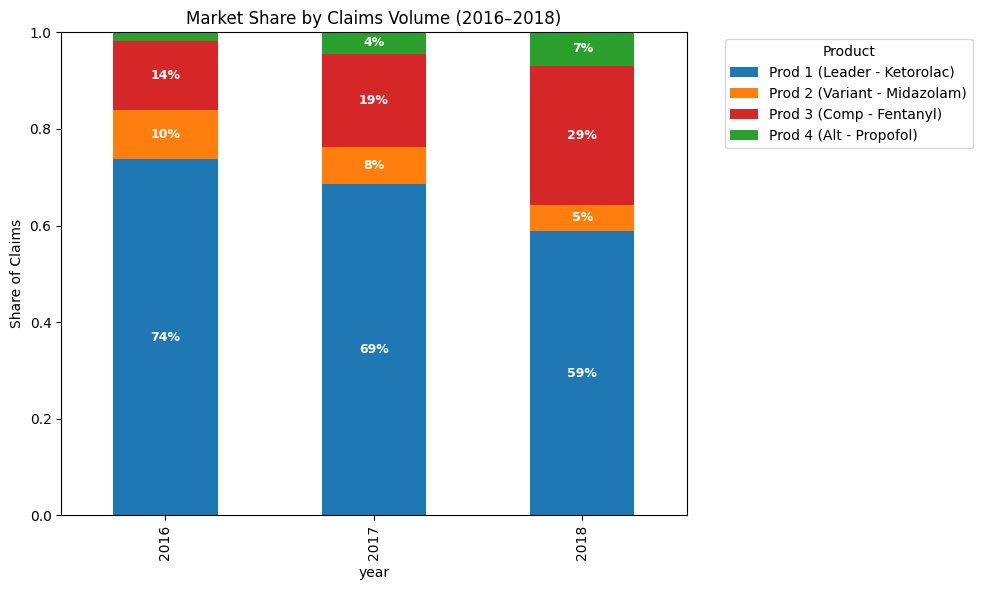

In [67]:
plot_100pct_stacked_bar(
    df=claims_yearly,
    x_col='year',
    stack_col='product',
    value_col='claims',
    title='Market Share by Claims Volume (2016–2018)',
    ylabel='Share of Claims'
)


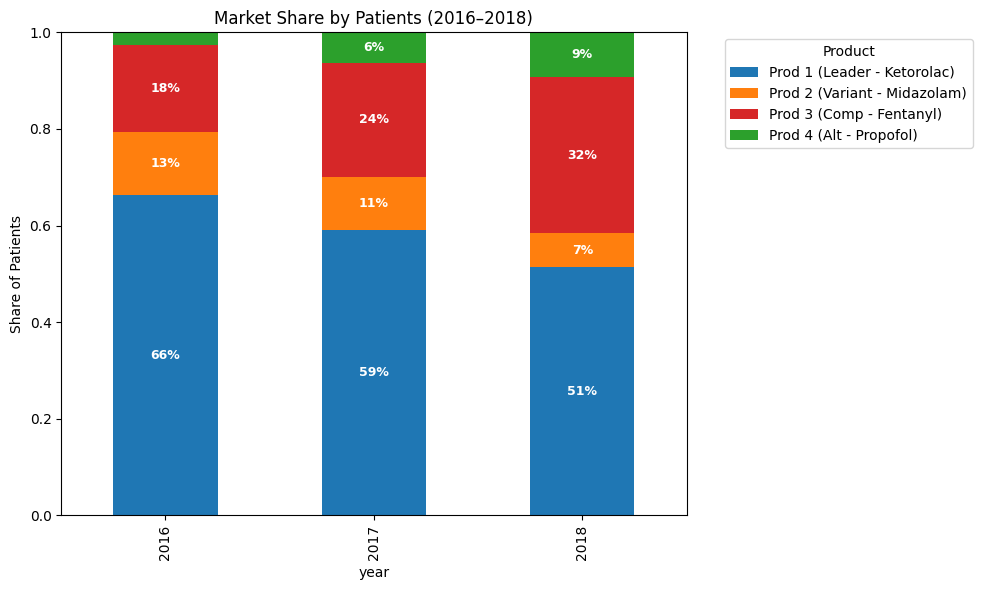

In [68]:
plot_100pct_stacked_bar(
    df=patients_yearly,
    x_col='year',
    stack_col='product',
    value_col='patients',
    title='Market Share by Patients (2016–2018)',
    ylabel='Share of Patients'
)


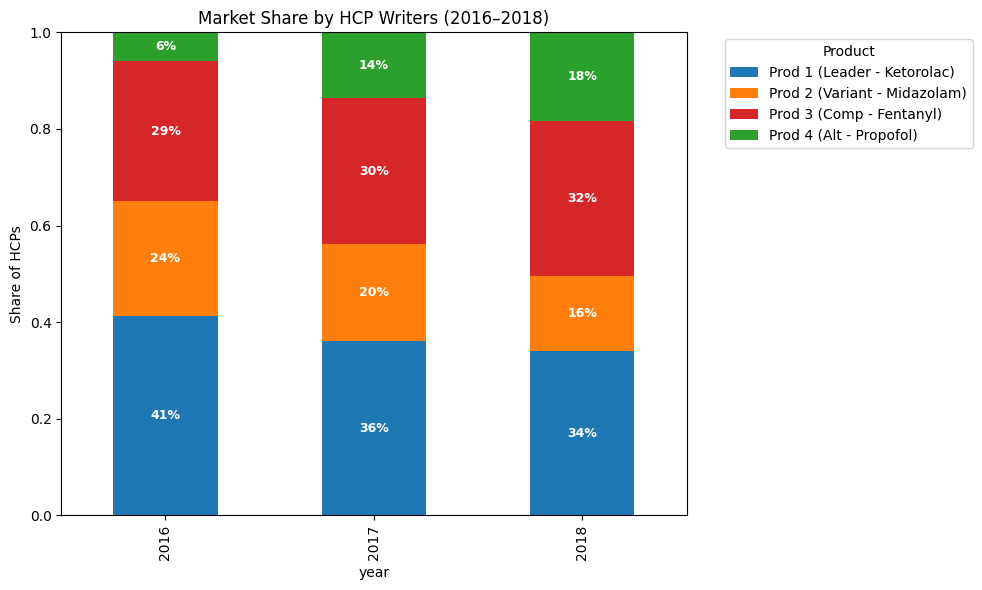

In [69]:
plot_100pct_stacked_bar(
    df=hcp_yearly,
    x_col='year',
    stack_col='product',
    value_col='writers',
    title='Market Share by HCP Writers (2016–2018)',
    ylabel='Share of HCPs'
)


In [70]:
claims_per_hcp = (
    market_df
    .dropna(subset=['product'])
    .groupby(['year', 'product'])
    .agg(
        claims=('cur_clm_uniq_id', 'nunique'),
        hcps=('fac_prvdr_npi_num', 'nunique')
    )
    .reset_index()
)

claims_per_hcp['claims_per_hcp'] = (
    claims_per_hcp['claims'] / claims_per_hcp['hcps']
)


claims_per_hcp['year'] = claims_per_hcp['year'].astype(int)



In [71]:
patients_per_hcp = (
    market_df
    .dropna(subset=['product'])
    .groupby(['year', 'product'])
    .agg(
        patients=('bene_mbi_id', 'nunique'),
        hcps=('fac_prvdr_npi_num', 'nunique')
    )
    .reset_index()
)

patients_per_hcp['patients_per_hcp'] = (
    patients_per_hcp['patients'] / patients_per_hcp['hcps']
)

patients_per_hcp['year'] = patients_per_hcp['year'].astype(int)


In [72]:
def plot_line_by_product(
    df,
    x_col,
    y_col,
    title,
    ylabel,
    color_map=None
):
    if color_map is None:
        color_map = {
            'Prod 1 (Leader - Ketorolac)': '#1f77b4',
            'Prod 2 (Variant - Midazolam)': '#ff7f0e',
            'Prod 3 (Comp - Fentanyl)': '#d62728',
            'Prod 4 (Alt - Propofol)': '#2ca02c'
        }

    plt.figure(figsize=(10, 6))

    years = sorted(df[x_col].unique())

    for product, grp in df.groupby('product'):
        grp = grp.sort_values(x_col)
        plt.plot(
            grp[x_col],
            grp[y_col],
            marker='o',
            label=product,
            color=color_map.get(product, '#999999')
        )

        # Value labels
        for _, row in grp.iterrows():
            plt.text(
                row[x_col],
                row[y_col],
                f"{row[y_col]:.1f}",
                ha='center',
                va='bottom',
                fontsize=9
            )

    # 🔑 FORCE DISCRETE YEAR TICKS
    plt.xticks(years, years)

    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


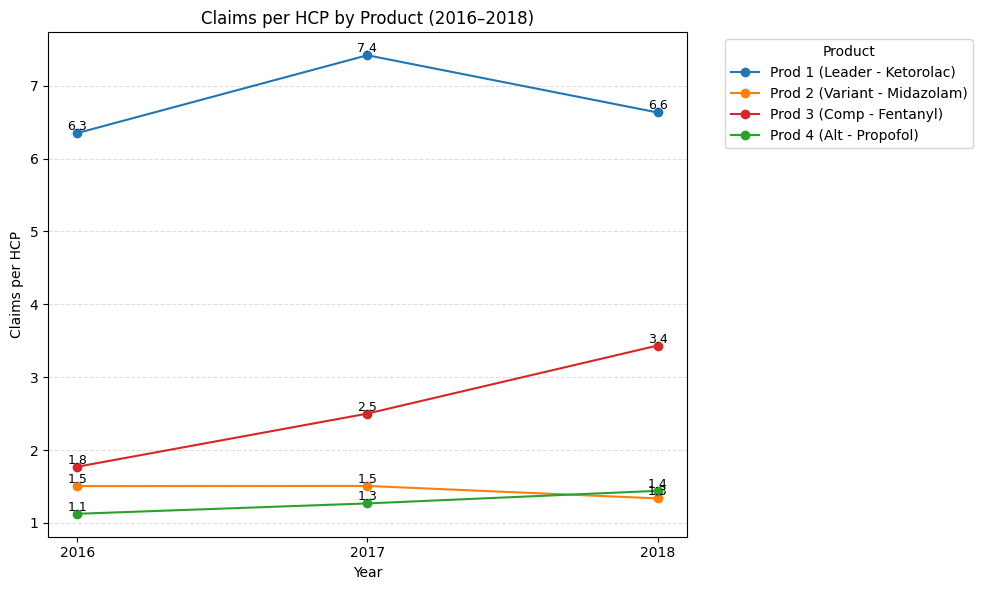

In [73]:
plot_line_by_product(
    df=claims_per_hcp,
    x_col='year',
    y_col='claims_per_hcp',
    title='Claims per HCP by Product (2016–2018)',
    ylabel='Claims per HCP'
)


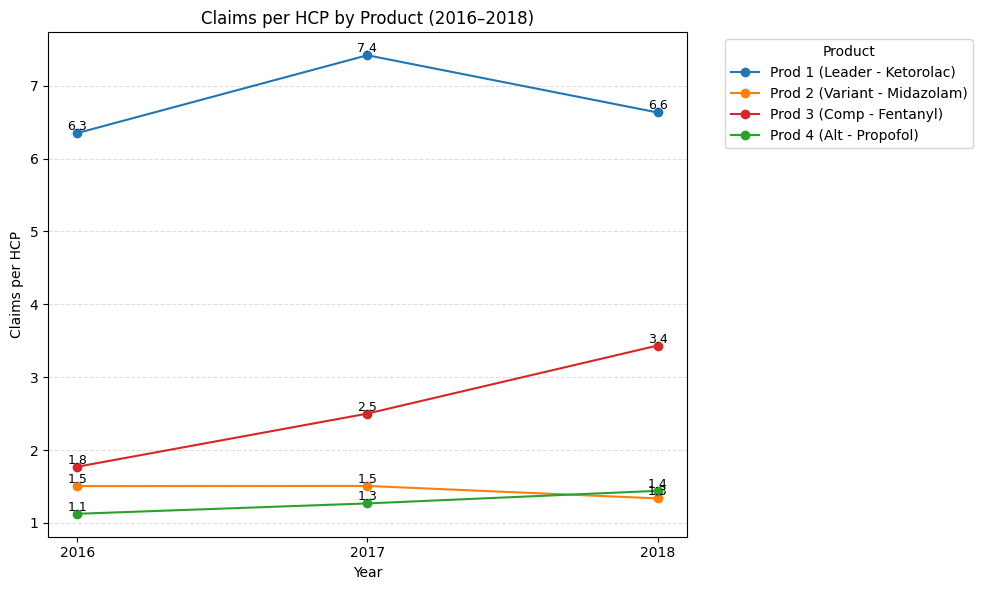

In [74]:
plot_line_by_product(
    df=claims_per_hcp,
    x_col='year',
    y_col='claims_per_hcp',
    title='Claims per HCP by Product (2016–2018)',
    ylabel='Claims per HCP'
)


In [75]:
territory_claims = (
    market_df
    .dropna(subset=['product'])
    .groupby(['territory_name', 'year', 'product'])
    .size()
    .reset_index(name='claims')
)


In [76]:
territory_claims.head()


,territory_name,year,product,claims
0,"Albany, NY",2016,Prod 1 (Leader - Ketorolac),128
1,"Albany, NY",2016,Prod 2 (Variant - Midazolam),14
2,"Albany, NY",2016,Prod 3 (Comp - Fentanyl),35
3,"Albany, NY",2016,Prod 4 (Alt - Propofol),6
4,"Albany, NY",2017,Prod 1 (Leader - Ketorolac),157


In [77]:
variant_name = 'Prod 2 (Variant - Midazolam)'
competitor_name = 'Prod 3 (Comp - Fentanyl)'

variant_tc = territory_claims[
    territory_claims['product'] == variant_name
]

variant_pivot = variant_tc.pivot(
    index='territory_name',
    columns='year',
    values='claims'
)

# Keep only territories with data in both years
variant_pivot = variant_pivot.dropna(subset=[2017, 2018])

variant_pivot['yoy_17_18_pct'] = (
    (variant_pivot[2018] - variant_pivot[2017]) /
    variant_pivot[2017]
)


In [78]:
top5_territories = (
    variant_pivot
    .sort_values('yoy_17_18_pct')
    .head(5)
    .index
    .tolist()
)

top5_territories


['St Louis, MO',
 'Phoenix, AZ',
 'LA-San Diego, CA',
 'New York, NY',
 'Minneapolis, MN']

In [79]:
focus_df = territory_claims[
    territory_claims['territory_name'].isin(top5_territories) &
    territory_claims['year'].between(2016, 2018)
]


In [80]:
stacked_df = (
    focus_df
    .groupby(['territory_name', 'year', 'product'])['claims']
    .sum()
    .reset_index()
)


In [81]:
color_map = {
    'Prod 1 (Leader - Ketorolac)': '#1f77b4',
    'Prod 2 (Variant - Midazolam)': '#ff7f0e',
    'Prod 3 (Comp - Fentanyl)': '#d62728',
    'Prod 4 (Alt - Propofol)': '#2ca02c'
}


In [82]:
import matplotlib.pyplot as plt

def plot_stacked_by_territory(
    df,
    territories,
    year,
    title_prefix,
    color_map,
    label_threshold=0.05  # show label only if >= 5%
):
    plot_df = df[
        (df['territory_name'].isin(territories)) &
        (df['year'] == year)
    ]

    pivot = (
        plot_df
        .pivot(index='territory_name', columns='product', values='claims')
        .fillna(0)
    )

    # Convert to % market share
    pivot_pct = pivot.div(pivot.sum(axis=1), axis=0)

    # Colors in consistent product order
    colors = [color_map.get(col, '#999999') for col in pivot_pct.columns]

    ax = pivot_pct.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        color=colors
    )

    # --- Add % labels ---
    for container in ax.containers:
        for rect in container:
            height = rect.get_height()
            if height >= label_threshold:
                ax.text(
                    rect.get_x() + rect.get_width() / 2,
                    rect.get_y() + height / 2,
                    f"{height*100:.0f}%",
                    ha='center',
                    va='center',
                    fontsize=9,
                    color='white',
                    fontweight='bold'
                )

    # Formatting
    ax.set_title(f"{title_prefix} – {year}")
    ax.set_ylabel('Market Share (%)')
    ax.set_xlabel('Territory')
    ax.set_ylim(0, 1)

    ax.legend(
        title='Product',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


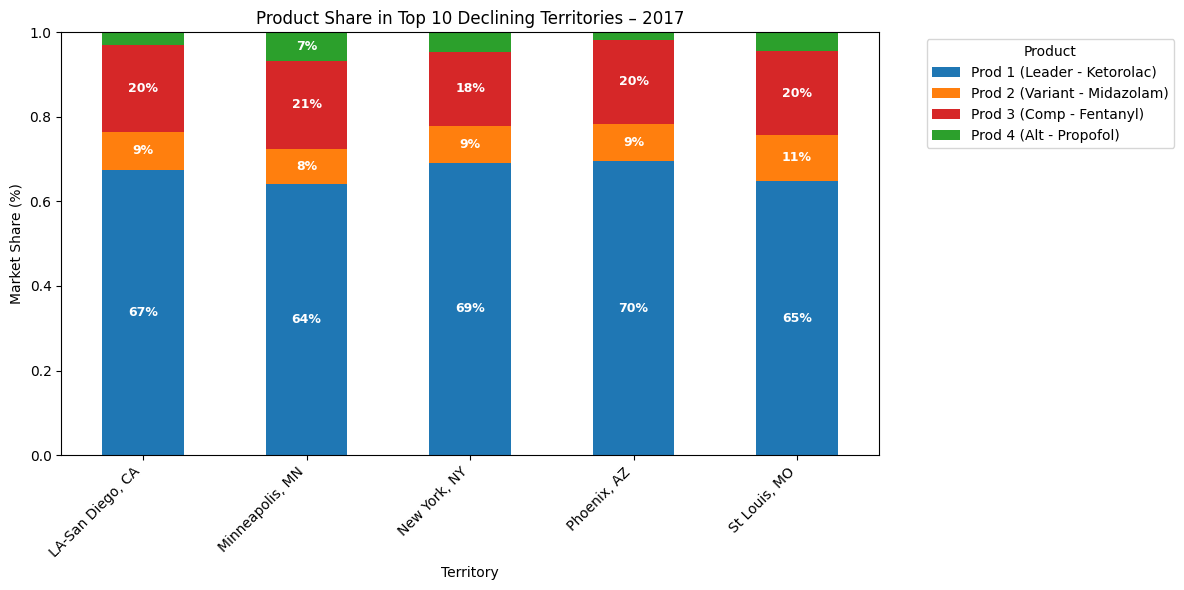

In [83]:
plot_stacked_by_territory(
    df=focus_df,
    territories=top5_territories,
    year=2017,
    title_prefix='Product Share in Top 10 Declining Territories',
    color_map=color_map
)


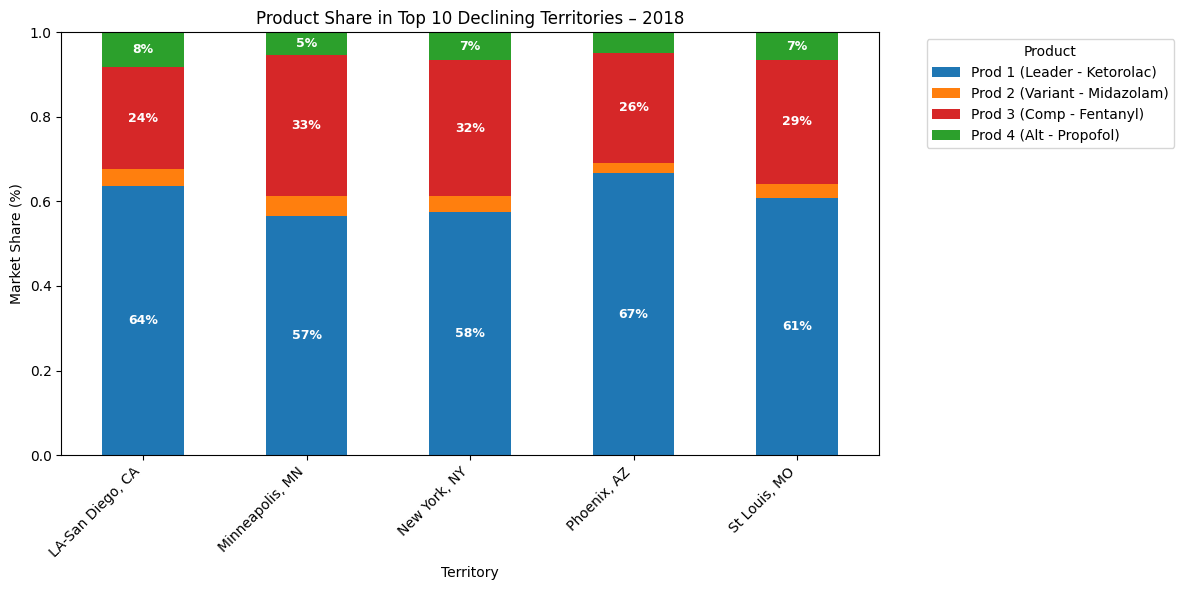

In [84]:
plot_stacked_by_territory(
    df=focus_df,
    territories=top5_territories,
    year=2018,
    title_prefix='Product Share in Top 10 Declining Territories',
    color_map=color_map
)


In [85]:
table_df = (
    focus_df
    .groupby(['territory_name', 'year', 'product'])['claims']
    .sum()
    .reset_index()
)


In [86]:
table_df['market_share_pct'] = (
    table_df['claims'] /
    table_df.groupby(['territory_name', 'year'])['claims'].transform('sum')
    * 100
).round(1)


In [87]:
table_df['claims_with_share'] = (
    table_df['claims'].map('{:,}'.format)
    + ' ('
    + table_df['market_share_pct'].astype(str)
    + '%)'
)


In [88]:
def make_year_table_with_values(df, year):
    return (
        df[df['year'] == year]
        .pivot(
            index='territory_name',
            columns='product',
            values='claims_with_share'
        )
        .fillna('0 (0%)')
        .reset_index()
    )


In [89]:
table_2016 = make_year_table_with_values(table_df, 2016)

table_2016

product,territory_name,Prod 1 (Leader - Ketorolac),Prod 2 (Variant - Midazolam),Prod 3 (Comp - Fentanyl),Prod 4 (Alt - Propofol)
0,"LA-San Diego, CA",262 (74.4%),29 (8.2%),55 (15.6%),6 (1.7%)
1,"Minneapolis, MN",88 (73.9%),15 (12.6%),14 (11.8%),2 (1.7%)
2,"New York, NY",254 (80.4%),24 (7.6%),33 (10.4%),5 (1.6%)
3,"Phoenix, AZ",61 (76.2%),11 (13.8%),7 (8.8%),1 (1.2%)
4,"St Louis, MO",108 (71.5%),19 (12.6%),23 (15.2%),1 (0.7%)


In [90]:
table_2017 = make_year_table_with_values(table_df, 2017)
table_2017

product,territory_name,Prod 1 (Leader - Ketorolac),Prod 2 (Variant - Midazolam),Prod 3 (Comp - Fentanyl),Prod 4 (Alt - Propofol)
0,"LA-San Diego, CA",284 (67.5%),38 (9.0%),86 (20.4%),13 (3.1%)
1,"Minneapolis, MN",114 (64.0%),15 (8.4%),37 (20.8%),12 (6.7%)
2,"New York, NY",318 (69.1%),40 (8.7%),81 (17.6%),21 (4.6%)
3,"Phoenix, AZ",80 (69.6%),10 (8.7%),23 (20.0%),2 (1.7%)
4,"St Louis, MO",131 (64.9%),22 (10.9%),40 (19.8%),9 (4.5%)


In [91]:
table_2018 = make_year_table_with_values(table_df, 2018)
table_2018

product,territory_name,Prod 1 (Leader - Ketorolac),Prod 2 (Variant - Midazolam),Prod 3 (Comp - Fentanyl),Prod 4 (Alt - Propofol)
0,"LA-San Diego, CA",262 (63.7%),16 (3.9%),99 (24.1%),34 (8.3%)
1,"Minneapolis, MN",85 (56.7%),7 (4.7%),50 (33.3%),8 (5.3%)
2,"New York, NY",273 (57.6%),17 (3.6%),153 (32.3%),31 (6.5%)
3,"Phoenix, AZ",82 (66.7%),3 (2.4%),32 (26.0%),6 (4.9%)
4,"St Louis, MO",112 (60.9%),6 (3.3%),54 (29.3%),12 (6.5%)


In [92]:
variant_name = 'Prod 2 (Variant - Midazolam)'
competitor_name = 'Prod 3 (Comp - Fentanyl)'

focus_df = territory_claims[
    territory_claims['territory_name'].isin(top5_territories) &
    territory_claims['product'].isin([variant_name, competitor_name]) &
    territory_claims['year'].between(2016, 2018)
]


In [93]:
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_by_year(
    df,
    product_name,
    title,
    ylabel
):
    plot_df = df[df['product'] == product_name]

    pivot = (
        plot_df
        .pivot(index='year', columns='territory_name', values='claims')
        .fillna(0)
        .sort_index()
    )

    years = pivot.index.tolist()
    territories = pivot.columns.tolist()

    x = np.arange(len(years))
    width = 0.15

    plt.figure(figsize=(12, 6))

    for i, territory in enumerate(territories):
        plt.bar(
            x + i * width,
            pivot[territory],
            width,
            label=territory
        )

    plt.xticks(x + width * (len(territories) - 1) / 2, years)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title='Territory', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


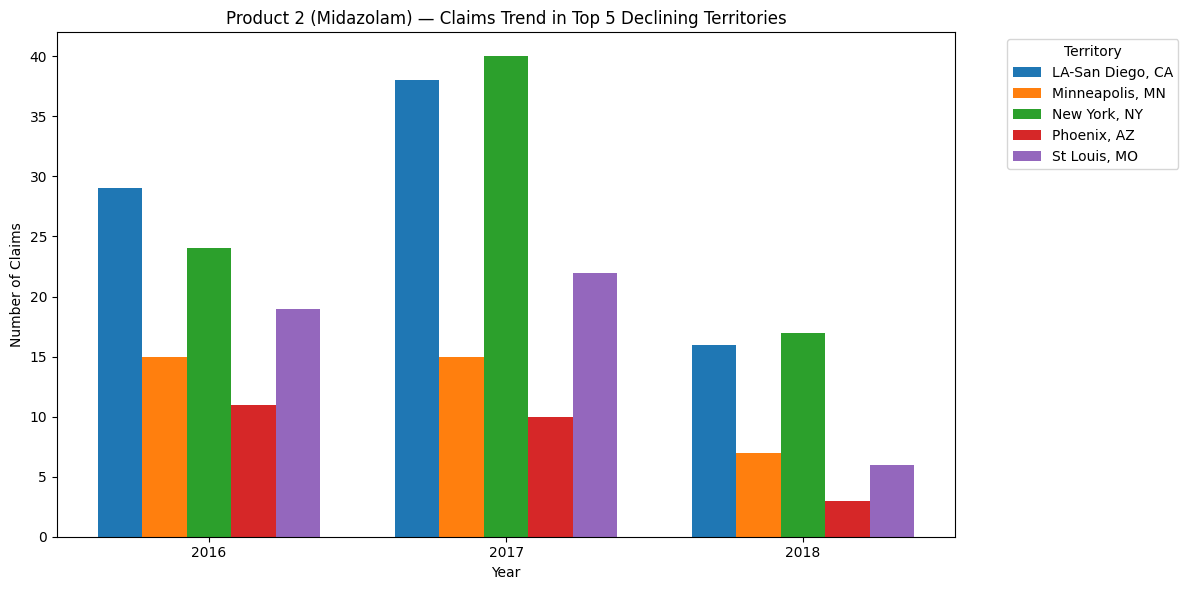

In [94]:
plot_clustered_by_year(
    df=focus_df,
    product_name=variant_name,
    title='Product 2 (Midazolam) — Claims Trend in Top 5 Declining Territories',
    ylabel='Number of Claims'
)


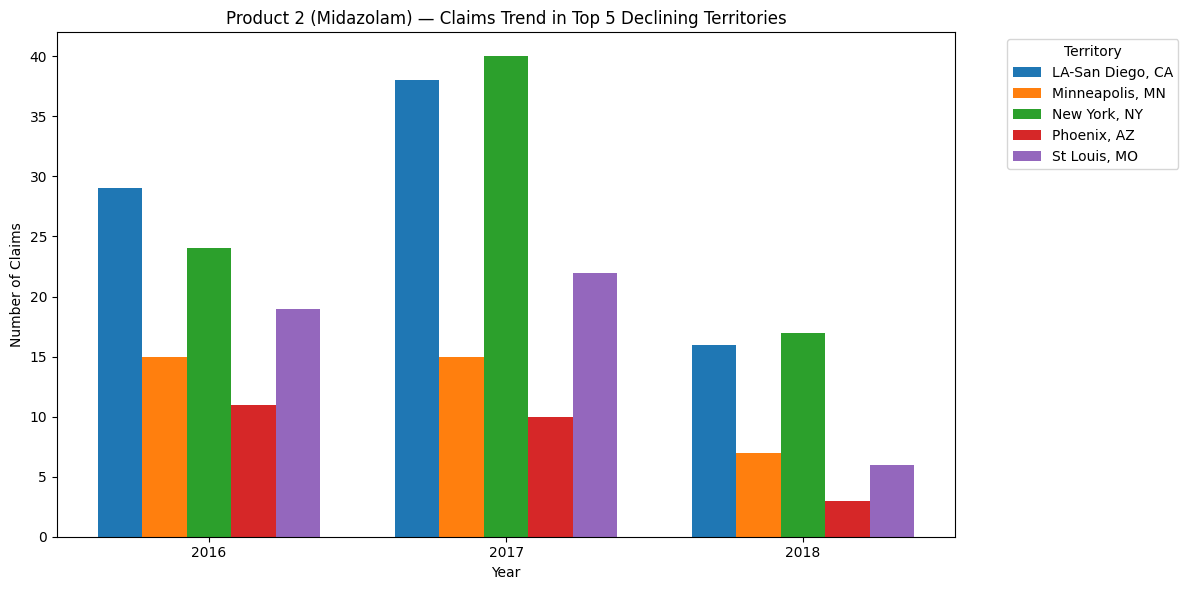

In [95]:
plot_clustered_by_year(
    df=focus_df,
    product_name=variant_name,
    title='Product 2 (Midazolam) — Claims Trend in Top 5 Declining Territories',
    ylabel='Number of Claims'
)


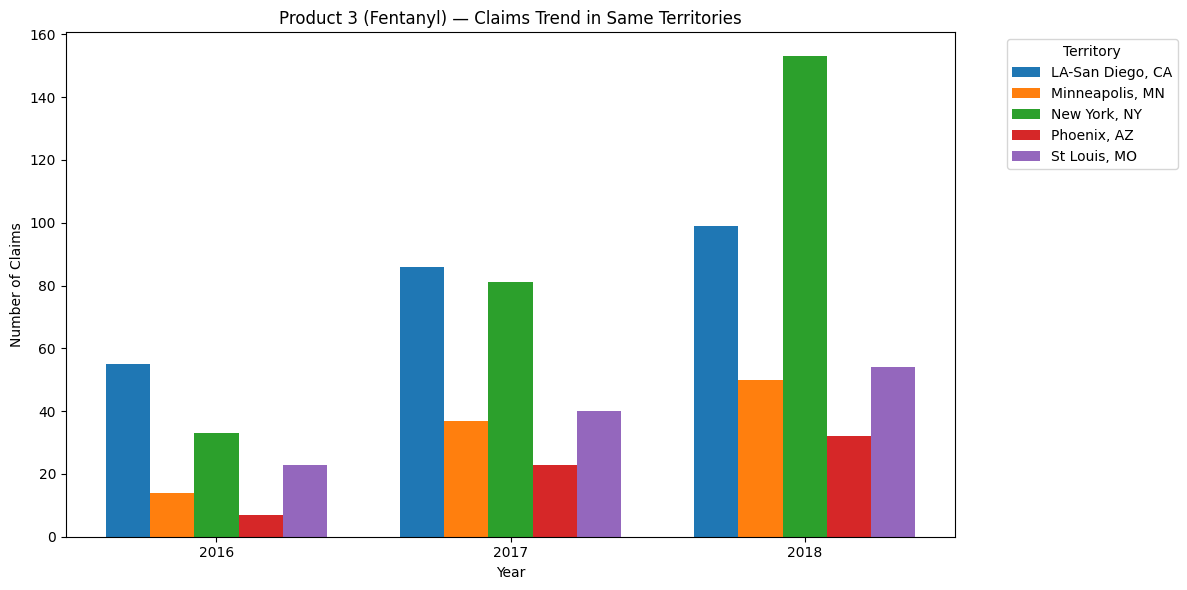

In [96]:
plot_clustered_by_year(
    df=focus_df,
    product_name=competitor_name,
    title='Product 3 (Fentanyl) — Claims Trend in Same Territories',
    ylabel='Number of Claims'
)


In [97]:
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_by_territory_year(
    df,
    product_name,
    territories,
    years,
    title,
    ylabel,
    year_color_map=None,
    value_offset_ratio=0.01
):
    # Default year color scheme (editable later)
    if year_color_map is None:
        year_color_map = {
            2016: '#1f77b4',  # blue
            2017: '#ff7f0e',  # orange
            2018: '#2ca02c'   # green
        }

    plot_df = df[
        (df['product'] == product_name) &
        (df['territory_name'].isin(territories)) &
        (df['year'].isin(years))
    ]

    pivot = (
        plot_df
        .pivot(index='territory_name', columns='year', values='claims')
        .fillna(0)
        .loc[territories]  # enforce territory order
    )

    x = np.arange(len(territories))
    width = 0.25
    ymax = pivot.max().max()

    plt.figure(figsize=(12, 6))

    for i, year in enumerate(years):
        bars = plt.bar(
            x + i * width,
            pivot[year],
            width,
            label=str(year),
            color=year_color_map.get(year, '#999999')
        )

        # ---- Add value labels ----
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                plt.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + ymax * value_offset_ratio,
                    f"{int(height)}",
                    ha='center',
                    va='bottom',
                    fontsize=9
                )

    plt.xticks(
        x + width,
        territories,
        rotation=45,
        ha='right'
    )

    plt.xlabel('Territory')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()


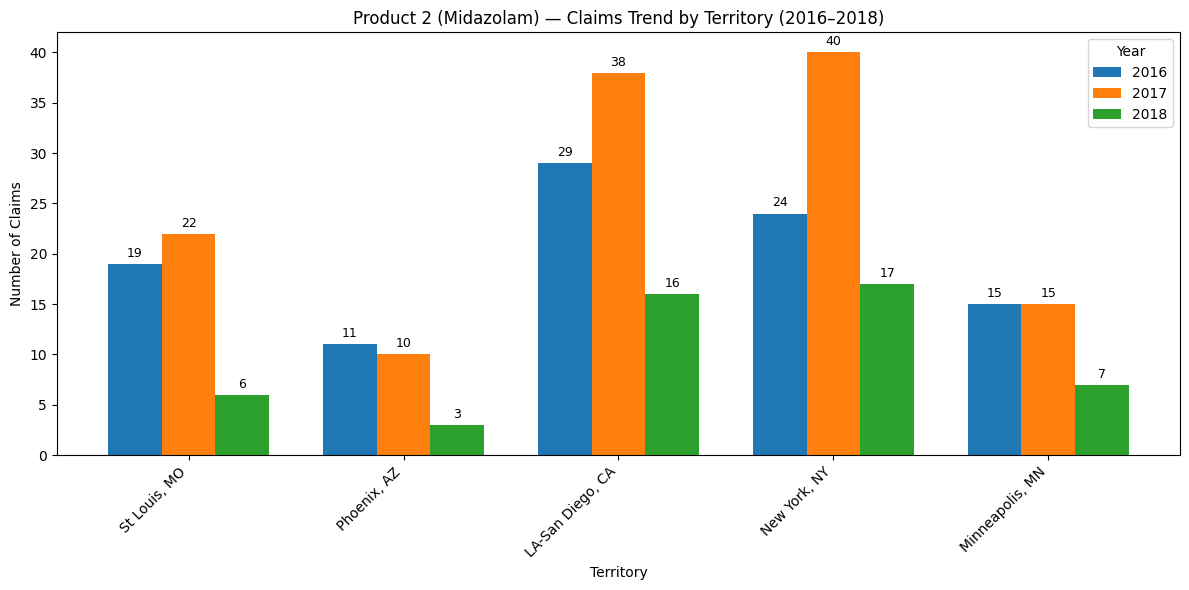

In [98]:
plot_clustered_by_territory_year(
    df=territory_claims,
    product_name='Prod 2 (Variant - Midazolam)',
    territories=top5_territories,
    years=[2016, 2017, 2018],
    title='Product 2 (Midazolam) — Claims Trend by Territory (2016–2018)',
    ylabel='Number of Claims'
)


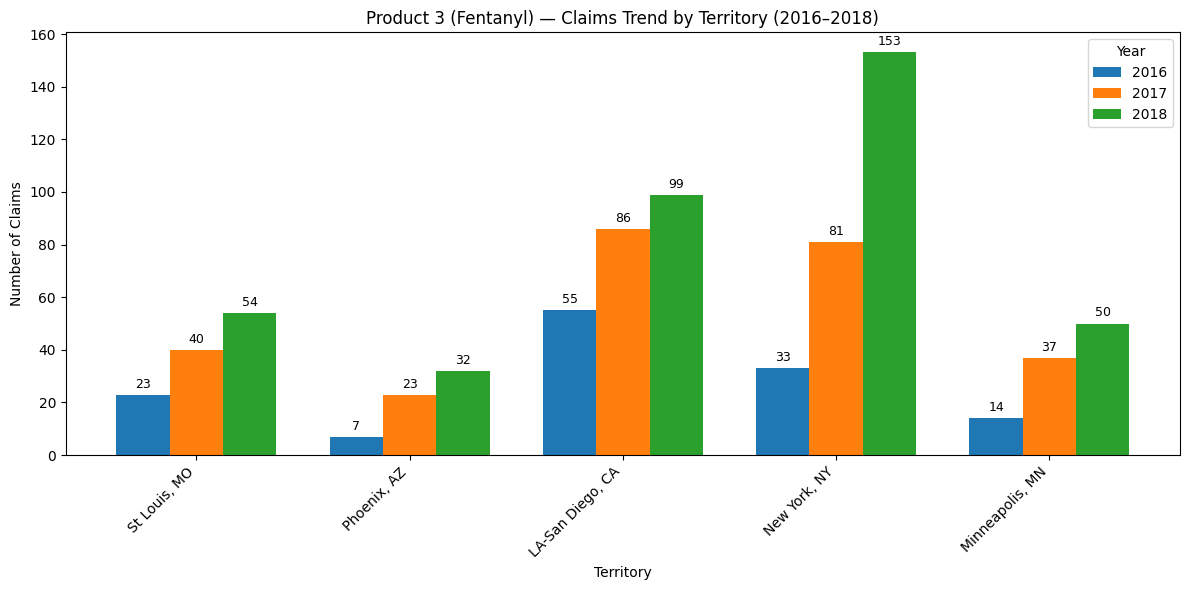

In [99]:
plot_clustered_by_territory_year(
    df=territory_claims,
    product_name='Prod 3 (Comp - Fentanyl)',
    territories=top5_territories,
    years=[2016, 2017, 2018],
    title='Product 3 (Fentanyl) — Claims Trend by Territory (2016–2018)',
    ylabel='Number of Claims'
)


In [100]:
import numpy as np
import matplotlib.pyplot as plt

def plot_grouped_stacked_by_territory_year(
    df,
    territories,
    years,
    title,
    color_map,
    label_threshold=0.07
):
    plot_df = df[
        (df['territory_name'].isin(territories)) &
        (df['year'].isin(years))
    ]

    # Aggregate
    agg = (
        plot_df
        .groupby(['territory_name', 'year', 'product'])['claims']
        .sum()
        .reset_index()
    )

    # Convert to % share
    agg['share'] = (
        agg['claims'] /
        agg.groupby(['territory_name', 'year'])['claims'].transform('sum')
    )

    territories = list(territories)
    products = agg['product'].unique()

    x = np.arange(len(territories))
    width = 0.22            # bar width
    year_gap = 0.05         # spacing between years

    fig, ax = plt.subplots(figsize=(14, 6))

    for i, year in enumerate(years):
        year_df = agg[agg['year'] == year]
        bottom = np.zeros(len(territories))

        x_pos = x + i * (width + year_gap)

        for product in products:
            values = (
                year_df[year_df['product'] == product]
                .set_index('territory_name')
                .reindex(territories)['share']
                .fillna(0)
                .values
            )

            bars = ax.bar(
                x_pos,
                values,
                width,
                bottom=bottom,
                color=color_map.get(product, '#999999'),
                edgecolor='white',     # 👈 border
                linewidth=1.0,
                label=product if i == 0 else None
            )

            # % labels
            for idx, v in enumerate(values):
                if v >= label_threshold:
                    ax.text(
                        x_pos[idx],
                        bottom[idx] + v / 2,
                        f"{v*100:.0f}%",
                        ha='center',
                        va='center',
                        fontsize=8,
                        color='white',
                        fontweight='bold'
                    )

            bottom += values

    # X-axis formatting
    ax.set_xticks(x + (len(years)-1)*(width + year_gap)/2)
    ax.set_xticklabels(territories, rotation=45, ha='right')

    ax.set_ylim(0, 1)
    ax.set_ylabel('Market Share (%)')
    ax.set_title(title)

    ax.legend(
        title='Product',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

    plt.tight_layout()
    plt.show()


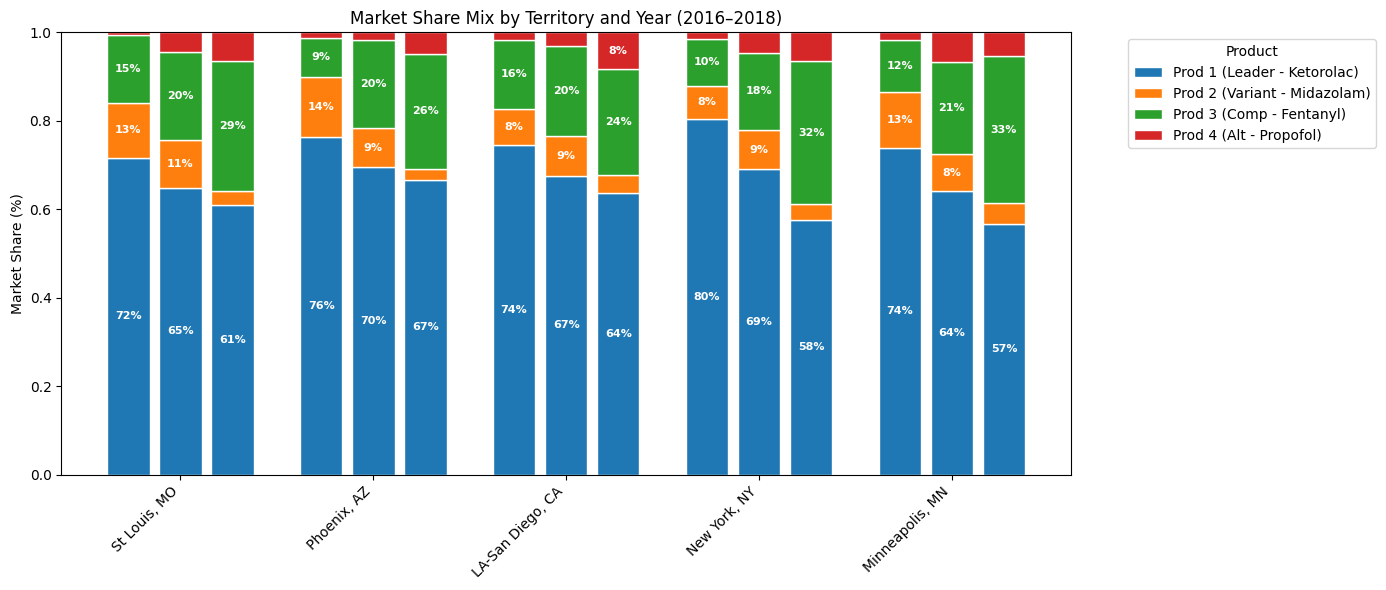

In [101]:
plot_grouped_stacked_by_territory_year(
    df=territory_claims,
    territories=top5_territories,
    years=[2016, 2017, 2018],
    title='Market Share Mix by Territory and Year (2016–2018)',
    color_map={
        'Prod 1 (Leader - Ketorolac)': '#1f77b4',
        'Prod 2 (Variant - Midazolam)': '#ff7f0e',
        'Prod 3 (Comp - Fentanyl)': '#2ca02c',
        'Prod 4 (Alt - Propofol)': '#d62728'
    }
)


2. Identifying the trends of the Key Market Drivers of the Injectable Anesthesia Market:

Top 5 Diagnosis Specialties by % of Claims

In [102]:
market_df['dx_initial'] = market_df['clm_dgns_cd'].str[0]


In [103]:
dx_map_df.columns

Index(['dx_initial', 'diagnosis_specialty'], dtype='object')

In [104]:
market_df.columns

Index(['cur_clm_uniq_id', 'bene_mbi_id', 'fac_prvdr_npi_num', 'clm_from_dt',
       'clm_thru_dt', 'prncpl_dgns_cd', 'clm_pmt_amt',
       'clm_mdcr_instnl_tot_chrg_amt', 'clm_line_num', 'clm_line_hcpcs_cd',
       'clm_line_cvrd_pd_amt', 'clm_val_sqnc_num_dgns', 'clm_dgns_cd',
       'clm_val_sqnc_num_prcdr', 'clm_prcdr_cd', 'clm_line_alowd_chrg_amt',
       'clm_prvdr_spclty_cd', 'claim_date', 'year_month', 'product',
       'dx_initial', 'diagnosis_specialty', 'NPI', 'State', 'zip_code',
       'Specialty', 'patient_id', 'age', 'gender', 'age_group',
       'territory_name', 'region_name', 'year'],
      dtype='object')

In [105]:
dx_claims = (
    market_df
    .groupby('diagnosis_specialty')['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='claims')
)

dx_claims['claim_share_pct'] = (
    dx_claims['claims'] / dx_claims['claims'].sum() * 100
)

top5_dx = (
    dx_claims
    .sort_values('claims', ascending=False)
    .head(5)
)


In [106]:
market_df['diagnosis_specialty'].isna().mean()


np.float64(0.0)

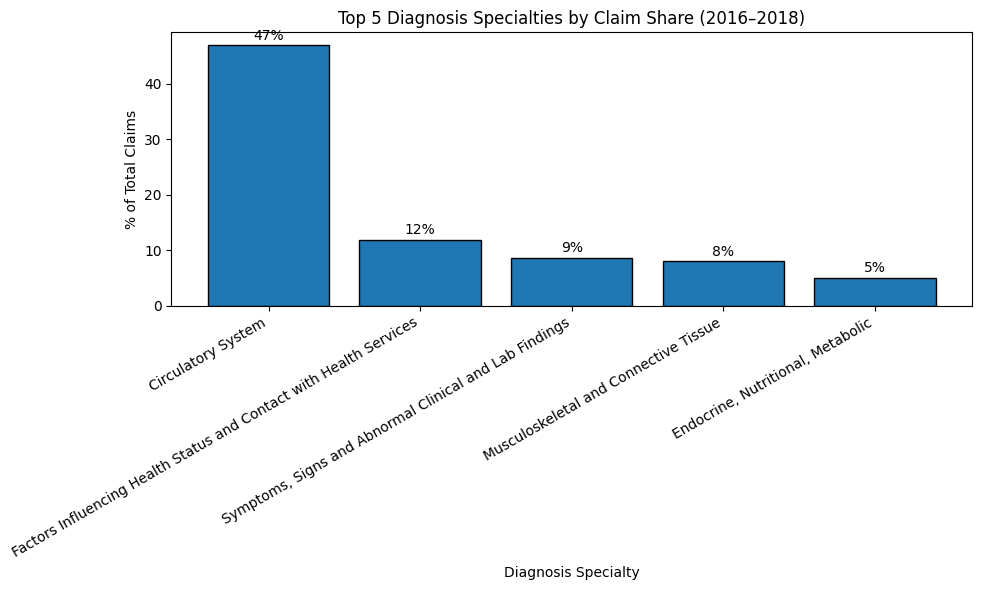

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

bars = plt.bar(
    top5_dx['diagnosis_specialty'],
    top5_dx['claim_share_pct'],
    color='#1f77b4',
    edgecolor='black'
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f"{height:.0f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.ylabel('% of Total Claims')
plt.xlabel('Diagnosis Specialty')
plt.title('Top 5 Diagnosis Specialties by Claim Share (2016–2018)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


In [108]:
hcp_trend = (
    market_df
    .groupby(['year', 'Specialty'])['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='writers')
)


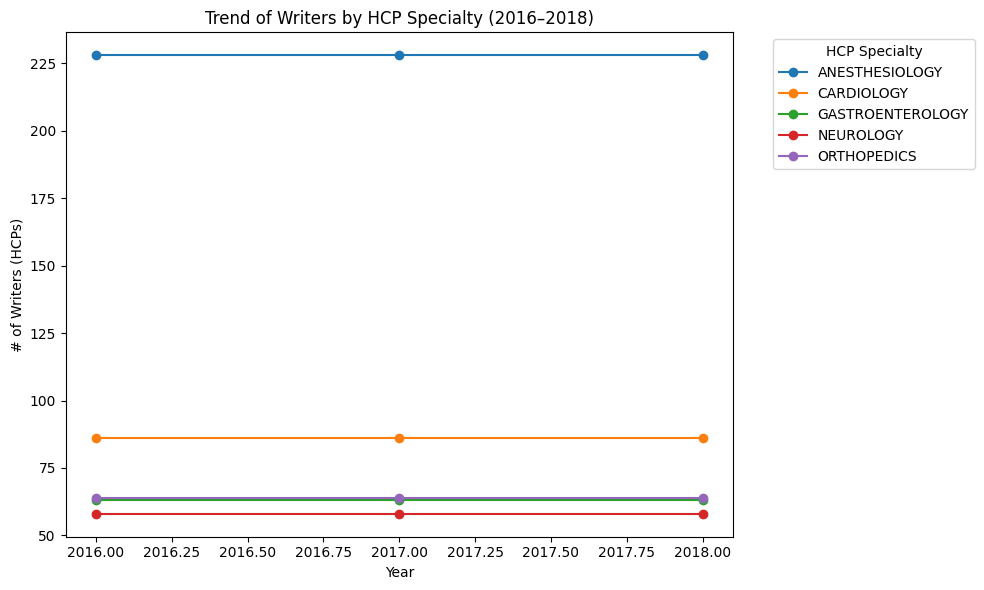

In [109]:
plt.figure(figsize=(10, 6))

for spec in hcp_trend['Specialty'].unique():
    subset = hcp_trend[hcp_trend['Specialty'] == spec]
    plt.plot(
        subset['year'],
        subset['writers'],
        marker='o',
        label=spec
    )

plt.xlabel('Year')
plt.ylabel('# of Writers (HCPs)')
plt.title('Trend of Writers by HCP Specialty (2016–2018)')
plt.legend(title='HCP Specialty', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [110]:
merged_df.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   cur_clm_uniq_id               1000000 non-null  int64         
 1   bene_mbi_id                   1000000 non-null  int64         
 2   fac_prvdr_npi_num             999070 non-null   Int64         
 3   clm_from_dt                   1000000 non-null  datetime64[ns]
 4   clm_thru_dt                   1000000 non-null  datetime64[ns]
 5   prncpl_dgns_cd                999895 non-null   object        
 6   clm_pmt_amt                   411670 non-null   float64       
 7   clm_mdcr_instnl_tot_chrg_amt  419995 non-null   float64       
 8   clm_line_num                  945549 non-null   Int64         
 9   clm_line_hcpcs_cd             993125 non-null   object        
 10  clm_line_cvrd_pd_amt          943514 non-null   float64       
 11 

2b

In [111]:
#Aggregate unique patients
patient_age_yoy = (
    market_df
    .groupby(['year', 'age_group'])['bene_mbi_id']
    .nunique()
    .reset_index(name='patients')
)


/var/folders/_p/jh19hxn93_ngdjzjp2y59kth0000gn/T/ipykernel_1072/3754803860.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'age_group'])['bene_mbi_id']


In [112]:
patient_age_pivot = (
    patient_age_yoy
    .pivot(index='year', columns='age_group', values='patients')
    .fillna(0)
)


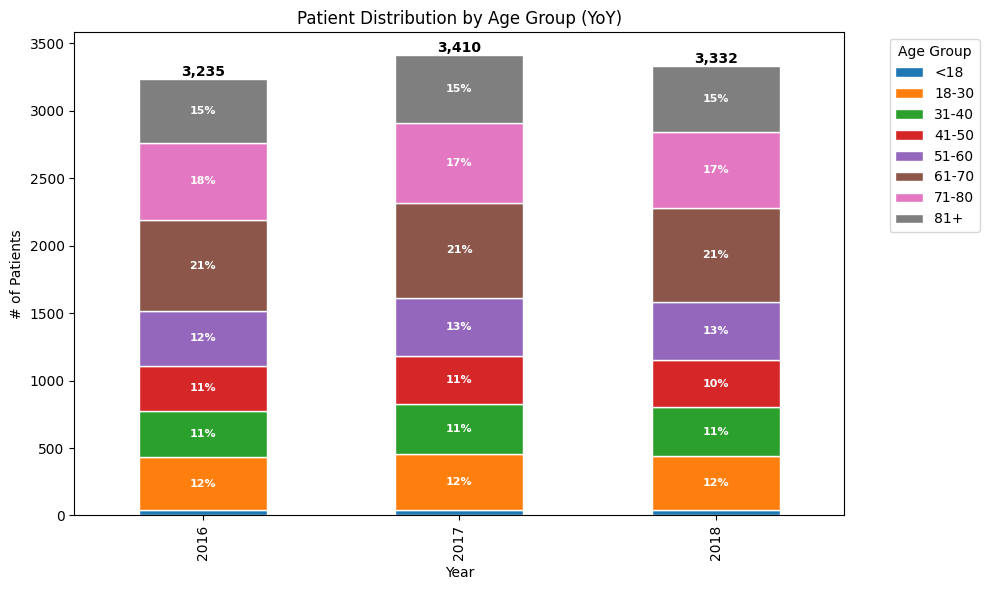

In [113]:
import matplotlib.pyplot as plt

ax = patient_age_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    edgecolor='white'
)

# ---- Compute totals per year ----
totals = patient_age_pivot.sum(axis=1)

# ---- Add % labels inside bars ----
for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        if height > 0:
            year_idx = int(rect.get_x() + rect.get_width() / 2)
            year = patient_age_pivot.index[year_idx]

            pct = height / totals.loc[year] * 100

            if pct >= 7:  # show only meaningful segments
                ax.text(
                    rect.get_x() + rect.get_width() / 2,
                    rect.get_y() + height / 2,
                    f"{pct:.0f}%",
                    ha='center',
                    va='center',
                    fontsize=8,
                    color='white',
                    fontweight='bold'
                )

# ---- Add total patient count on top of each bar ----
for i, total in enumerate(totals):
    ax.text(
        i,
        total,
        f"{int(total):,}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# ---- Formatting ----
plt.xlabel('Year')
plt.ylabel('# of Patients')
plt.title('Patient Distribution by Age Group (YoY)')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


🔹 2(b)(i).2 — 100% Stacked Bar: % of Claims by Age Group (YoY)

In [114]:
claim_age_yoy = (
    market_df
    .groupby(['year', 'age_group'])['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='claims')
)


/var/folders/_p/jh19hxn93_ngdjzjp2y59kth0000gn/T/ipykernel_1072/3965474704.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'age_group'])['cur_clm_uniq_id']


In [115]:
claim_age_pivot = (
    claim_age_yoy
    .pivot(index='year', columns='age_group', values='claims')
    .fillna(0)
)

claim_age_pct = claim_age_pivot.div(
    claim_age_pivot.sum(axis=1), axis=0
)


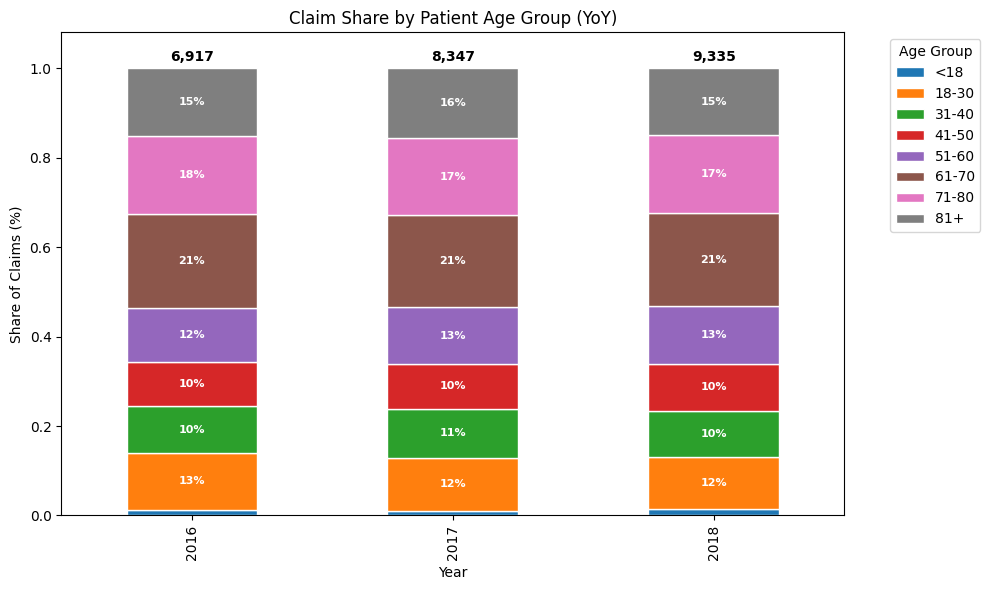

In [116]:
import matplotlib.pyplot as plt

ax = claim_age_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    edgecolor='white'
)

# ---- Absolute totals per year (from original pivot) ----
total_claims = claim_age_pivot.sum(axis=1)

# ---- % labels inside bars ----
for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        if height >= 0.07:
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                rect.get_y() + height / 2,
                f"{height*100:.0f}%",
                ha='center',
                va='center',
                fontsize=8,
                color='white',
                fontweight='bold'
            )

# ---- Total claim count on top of each bar ----
for i, total in enumerate(total_claims):
    ax.text(
        i,
        1.01,                     # slightly above 100%
        f"{int(total):,}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# ---- Formatting ----
plt.xlabel('Year')
plt.ylabel('Share of Claims (%)')
plt.title('Claim Share by Patient Age Group (YoY)')
plt.ylim(0, 1.08)

plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [117]:
hcp_first_year = (
    market_df
    .groupby(['product', 'fac_prvdr_npi_num'])['year']
    .min()
    .reset_index(name='first_year')
)


In [118]:
total_writers = (
    market_df
    .groupby(['product', 'year'])['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='total_writers')
)


In [119]:
new_writers = (
    hcp_first_year
    .groupby(['product', 'first_year'])['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='new_writers')
    .rename(columns={'first_year': 'year'})
)


In [120]:
writer_trends = (
    total_writers
    .merge(new_writers, on=['product', 'year'], how='left')
)

writer_trends['new_writers'] = writer_trends['new_writers'].fillna(0)
writer_trends['continuing_writers'] = (
    writer_trends['total_writers'] - writer_trends['new_writers']
)


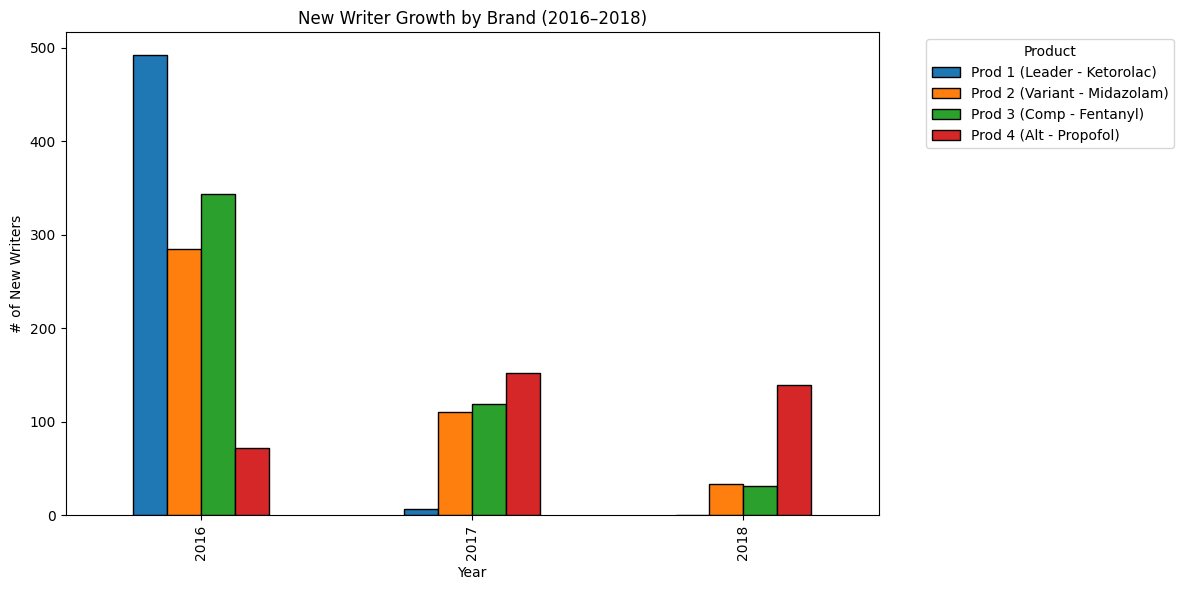

In [121]:
import matplotlib.pyplot as plt

new_writer_pivot = (
    writer_trends
    .pivot(index='year', columns='product', values='new_writers')
    .fillna(0)
)

new_writer_pivot.plot(
    kind='bar',
    figsize=(12, 6),
    edgecolor='black'
)

plt.xlabel('Year')
plt.ylabel('# of New Writers')
plt.title('New Writer Growth by Brand (2016–2018)')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


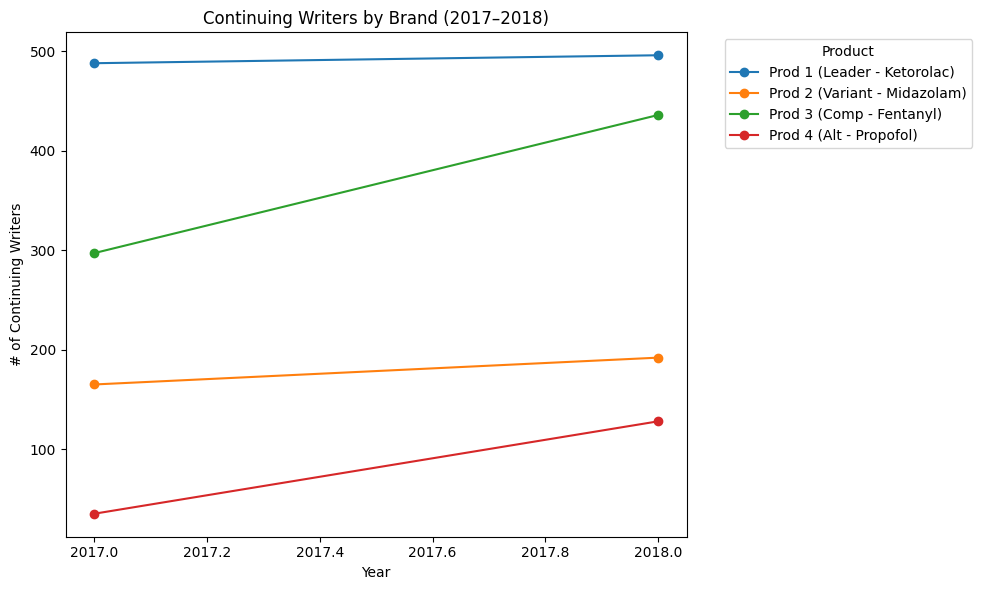

In [122]:
cont_writer_trend = writer_trends[
    writer_trends['year'].isin([2017, 2018])
]

plt.figure(figsize=(10, 6))

for product in cont_writer_trend['product'].unique():
    subset = cont_writer_trend[cont_writer_trend['product'] == product]
    plt.plot(
        subset['year'],
        subset['continuing_writers'],
        marker='o',
        label=product
    )

plt.xlabel('Year')
plt.ylabel('# of Continuing Writers')
plt.title('Continuing Writers by Brand (2017–2018)')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [123]:
bottom5_territories = (
    variant_pivot
    .sort_values('yoy_17_18_pct', ascending=False)
    .head(5)
    .index
    .tolist()
)


In [124]:
top5_df = market_df[market_df['territory_name'].isin(top5_territories)]
bottom5_df = market_df[market_df['territory_name'].isin(bottom5_territories)]


In [125]:
top5_age = (
    top5_df
    .groupby(['year', 'age_group'])['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='claims')
)

top5_age['share'] = (
    top5_age['claims'] /
    top5_age.groupby('year')['claims'].transform('sum')
)


/var/folders/_p/jh19hxn93_ngdjzjp2y59kth0000gn/T/ipykernel_1072/2668712072.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'age_group'])['cur_clm_uniq_id']


In [126]:
bottom5_age = (
    bottom5_df
    .groupby(['year', 'age_group'])['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='claims')
)

bottom5_age['share'] = (
    bottom5_age['claims'] /
    bottom5_age.groupby('year')['claims'].transform('sum')
)


/var/folders/_p/jh19hxn93_ngdjzjp2y59kth0000gn/T/ipykernel_1072/3378799579.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'age_group'])['cur_clm_uniq_id']


In [127]:
top5_age_pivot = (
    top5_age
    .pivot(index='year', columns='age_group', values='share')
    .fillna(0)
)

bottom5_age_pivot = (
    bottom5_age
    .pivot(index='year', columns='age_group', values='share')
    .fillna(0)
)

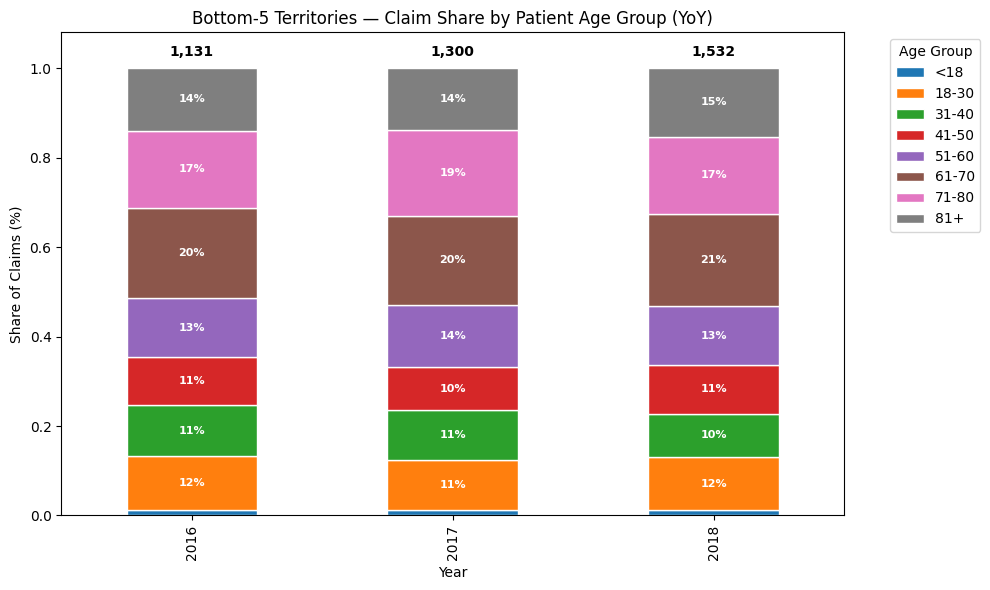

In [128]:
import matplotlib.pyplot as plt

ax = bottom5_age_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    edgecolor='white'
)

# ---- Add % labels inside bars ----
for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        if height >= 0.07:  # avoid clutter
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                rect.get_y() + height / 2,
                f"{height*100:.0f}%",
                ha='center',
                va='center',
                fontsize=8,
                color='white',
                fontweight='bold'
            )

# ---- Add total claim counts on top (absolute volume context) ----
bottom5_totals = (
    bottom5_df
    .groupby('year')['cur_clm_uniq_id']
    .nunique()
)

for i, year in enumerate(bottom5_age_pivot.index):
    ax.text(
        i,
        1.02,
        f"{bottom5_totals.loc[year]:,}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# ---- Formatting ----
plt.xlabel('Year')
plt.ylabel('Share of Claims (%)')
plt.title('Bottom-5 Territories — Claim Share by Patient Age Group (YoY)')
plt.ylim(0, 1.08)

plt.legend(
    title='Age Group',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


In [129]:
bottom5_age_pivot = (
    bottom5_age
    .pivot(index='year', columns='age_group', values='share')
    .fillna(0)
)


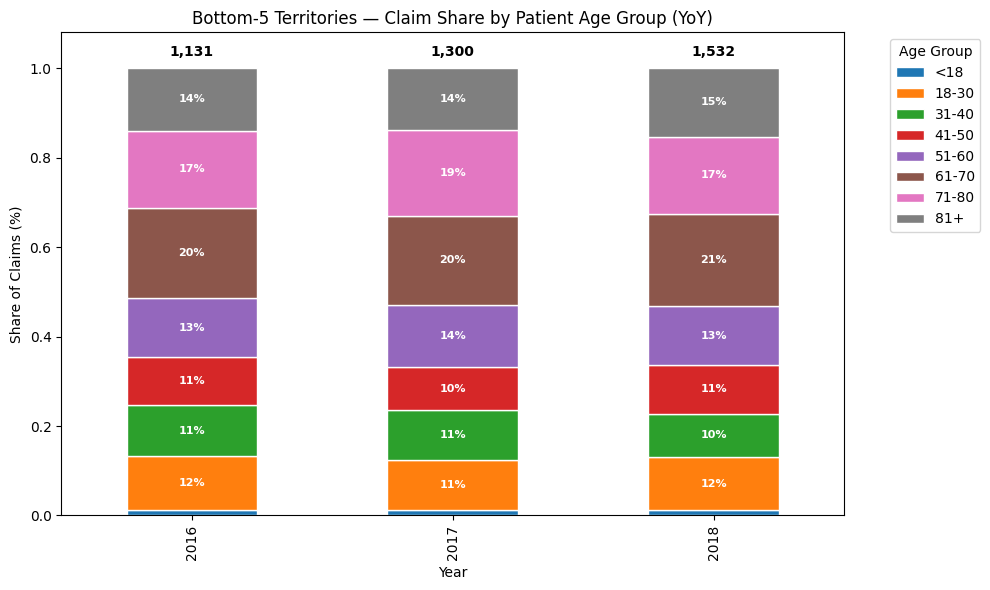

In [130]:
import matplotlib.pyplot as plt

ax = bottom5_age_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    edgecolor='white'
)

# ---- Add % labels inside bars ----
for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        if height >= 0.07:  # avoid clutter
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                rect.get_y() + height / 2,
                f"{height*100:.0f}%",
                ha='center',
                va='center',
                fontsize=8,
                color='white',
                fontweight='bold'
            )

# ---- Add total claim counts on top (absolute volume context) ----
bottom5_totals = (
    bottom5_df
    .groupby('year')['cur_clm_uniq_id']
    .nunique()
)

for i, year in enumerate(bottom5_age_pivot.index):
    ax.text(
        i,
        1.02,
        f"{bottom5_totals.loc[year]:,}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# ---- Formatting ----
plt.xlabel('Year')
plt.ylabel('Share of Claims (%)')
plt.title('Bottom-5 Territories — Claim Share by Patient Age Group (YoY)')
plt.ylim(0, 1.08)

plt.legend(
    title='Age Group',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


In [131]:
top5_writers = market_df[
    market_df['territory_name'].isin(top5_territories)
]

top5_writer_trends = (
    top5_writers
    .groupby(['product', 'year'])['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='total_writers')
)


In [132]:
bottom5_writers = market_df[
    market_df['territory_name'].isin(top5_territories)
]

bottom5_writer_trends = (
    bottom5_writers
    .groupby(['product', 'year'])['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='total_writers')
)


In [133]:
def diagnosis_specialty_share(df):
    agg = (
        df
        .groupby('diagnosis_specialty')['cur_clm_uniq_id']
        .nunique()
        .reset_index(name='claims')
    )
    agg['share_pct'] = agg['claims'] / agg['claims'].sum() * 100
    return agg.sort_values('claims', ascending=False).head(5)


In [134]:
top5_dx = diagnosis_specialty_share(top5_df)
bottom5_dx = diagnosis_specialty_share(bottom5_df)


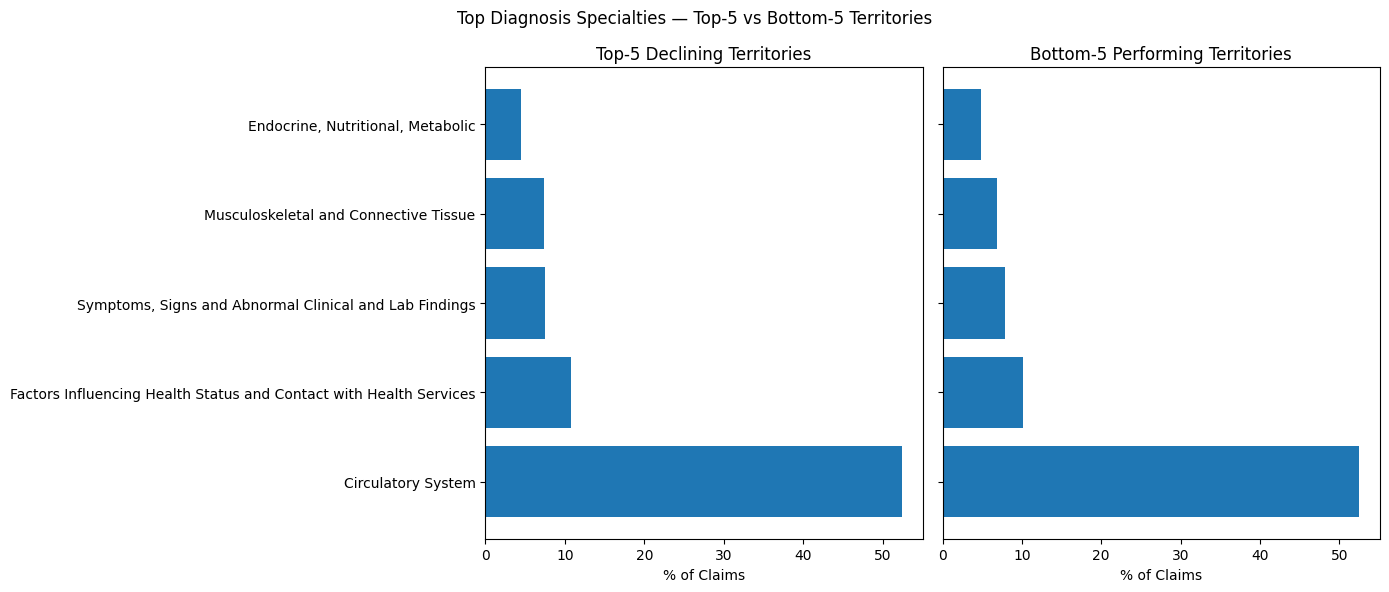

In [135]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].barh(top5_dx['diagnosis_specialty'], top5_dx['share_pct'])
axes[0].set_title('Top-5 Declining Territories')
axes[0].invert_yaxis()
axes[0].set_xlabel('% of Claims')

axes[1].barh(bottom5_dx['diagnosis_specialty'], bottom5_dx['share_pct'])
axes[1].set_title('Bottom-5 Performing Territories')
axes[1].invert_yaxis()
axes[1].set_xlabel('% of Claims')

fig.suptitle('Top Diagnosis Specialties — Top-5 vs Bottom-5 Territories')
plt.tight_layout()
plt.show()


In [136]:
def hcp_specialty_writers(df):
    agg = (
        df
        .groupby('Specialty')['fac_prvdr_npi_num']
        .nunique()
        .reset_index(name='writers')
    )
    return agg.sort_values('writers', ascending=False).head(5)


In [137]:
top5_hcp = hcp_specialty_writers(top5_df)
bottom5_hcp = hcp_specialty_writers(bottom5_df)


In [138]:
def hcp_specialty_writers(df):
    agg = (
        df
        .groupby('Specialty')['fac_prvdr_npi_num']
        .nunique()
        .reset_index(name='writers')
    )
    return agg.sort_values('writers', ascending=False).head(5)


In [139]:
top5_total_writers = (
    top5_df['fac_prvdr_npi_num']
    .nunique()
)

bottom5_total_writers = (
    bottom5_df['fac_prvdr_npi_num']
    .nunique()
)


In [140]:
top5_hcp['pct_of_writers'] = (
    top5_hcp['writers'] / top5_total_writers * 100
)

bottom5_hcp['pct_of_writers'] = (
    bottom5_hcp['writers'] / bottom5_total_writers * 100
)


In [141]:
top5_hcp[['Specialty', 'writers', 'pct_of_writers']]


,Specialty,writers,pct_of_writers
0,ANESTHESIOLOGY,48,40.000000
1,CARDIOLOGY,27,22.500000
4,ORTHOPEDICS,18,15.000000
3,NEUROLOGY,14,11.666667
2,GASTROENTEROLOGY,13,10.833333


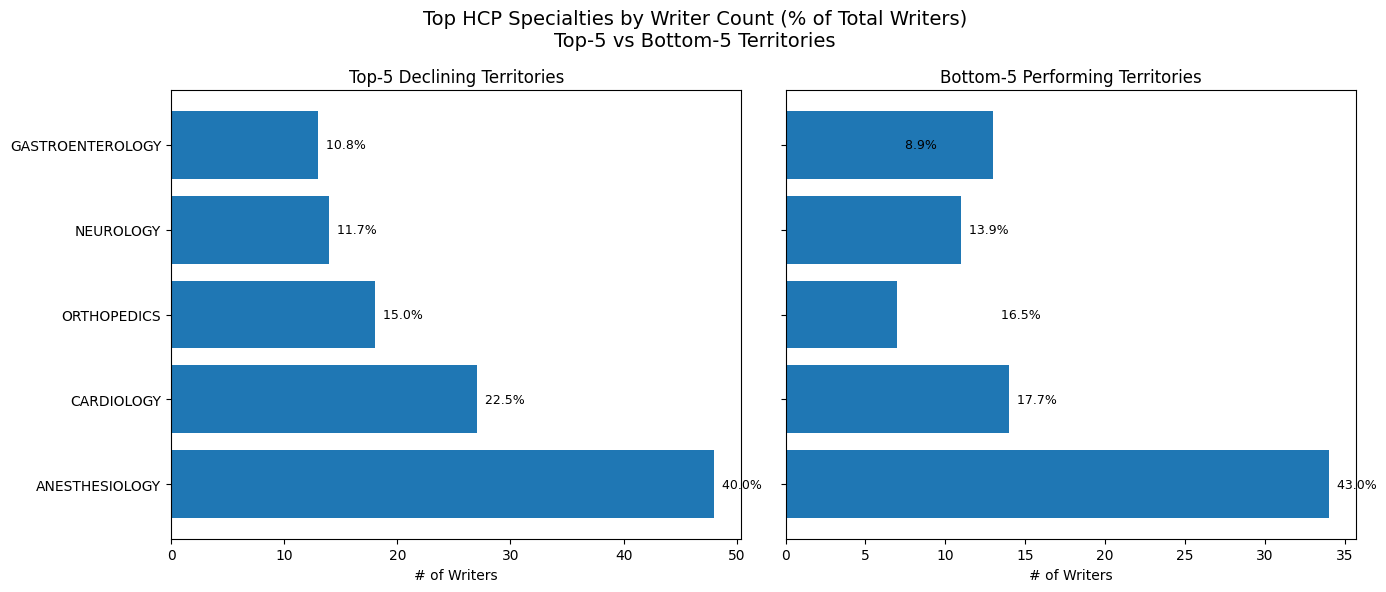

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Top-5 Declining ---
axes[0].barh(top5_hcp['Specialty'], top5_hcp['writers'])
axes[0].invert_yaxis()
axes[0].set_title('Top-5 Declining Territories')
axes[0].set_xlabel('# of Writers')

for i, row in top5_hcp.iterrows():
    axes[0].text(
        row['writers'],
        top5_hcp.index.get_loc(i),
        f"  {row['pct_of_writers']:.1f}%",
        va='center',
        fontsize=9
    )

# --- Bottom-5 Performing ---
axes[1].barh(bottom5_hcp['Specialty'], bottom5_hcp['writers'])
axes[1].invert_yaxis()
axes[1].set_title('Bottom-5 Performing Territories')
axes[1].set_xlabel('# of Writers')

for i, row in bottom5_hcp.iterrows():
    axes[1].text(
        row['writers'],
        bottom5_hcp.index.get_loc(i),
        f"  {row['pct_of_writers']:.1f}%",
        va='center',
        fontsize=9
    )

fig.suptitle(
    'Top HCP Specialties by Writer Count (% of Total Writers)\nTop-5 vs Bottom-5 Territories',
    fontsize=14
)

plt.tight_layout()
plt.show()


#Section 3 - additional analyses

In [143]:
market_df['territory_group'] = 'Other'

market_df.loc[
    market_df['territory_name'].isin(top5_territories),
    'territory_group'
] = 'Top-5 Declining'

market_df.loc[
    market_df['territory_name'].isin(bottom5_territories),
    'territory_group'
] = 'Bottom-5 Performing'


In [144]:
focus_df = market_df[
    market_df['territory_group'].isin(['Top-5 Declining', 'Bottom-5 Performing']) &
    market_df['year'].isin([2017, 2018])
]


In [145]:
spec_terr_brand = (
    focus_df
    .groupby(['territory_group', 'Specialty', 'product'])['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='claims')
)


In [146]:
spec_terr_brand['market_share'] = (
    spec_terr_brand['claims'] /
    spec_terr_brand
        .groupby(['territory_group', 'Specialty'])['claims']
        .transform('sum')
)


In [147]:
variant = 'Prod 2 (Variant - Midazolam)'
competitor = 'Prod 3 (Comp - Fentanyl)'

head_to_head = spec_terr_brand[
    spec_terr_brand['product'].isin([variant, competitor])
]


In [148]:
top5_loss = (
    head_to_head[
        head_to_head['territory_group'] == 'Top-5 Declining'
    ]
    .pivot(index='Specialty', columns='product', values='market_share')
    .fillna(0)
)

top5_loss['competitor_advantage'] = (
    top5_loss[competitor] - top5_loss[variant]
)

top5_loss = (
    top5_loss
    .sort_values('competitor_advantage', ascending=False)
)


In [149]:
top5_loss.head(10)


product,Prod 2 (Variant - Midazolam),Prod 3 (Comp - Fentanyl),competitor_advantage
Specialty,,,
ORTHOPEDICS,0.059946,0.261580,0.201635
ANESTHESIOLOGY,0.066038,0.252830,0.186792
NEUROLOGY,0.065868,0.248503,0.182635
GASTROENTEROLOGY,0.057692,0.221154,0.163462
CARDIOLOGY,0.065523,0.216849,0.151326


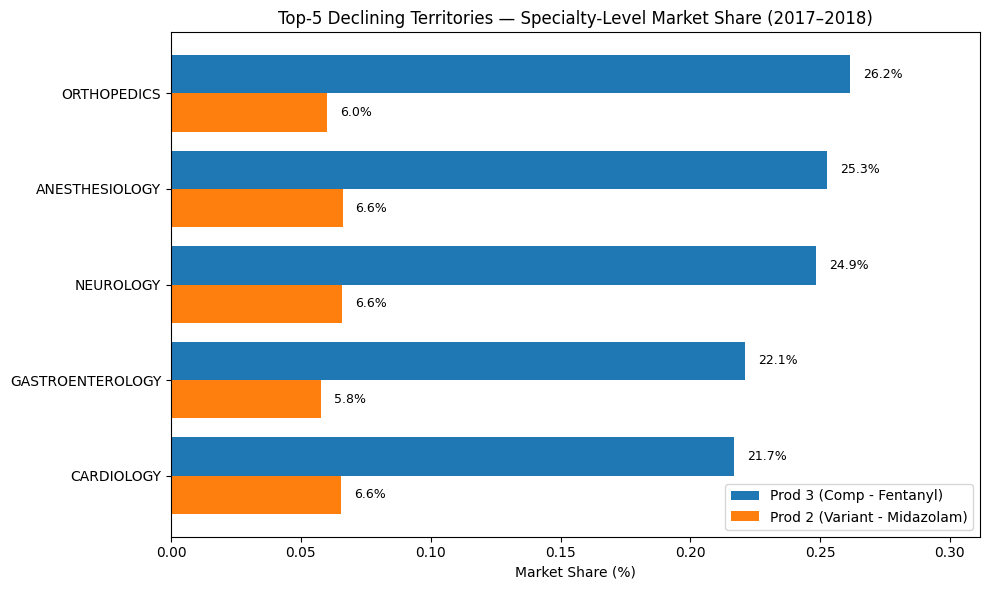

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
plot_df = (
    top5_loss[[variant, competitor]]
    .reset_index()
)

y = np.arange(len(plot_df))

plt.figure(figsize=(10, 6))

bars_comp = plt.barh(
    y - 0.2,
    plot_df[competitor],
    height=0.4,
    label=competitor
)

bars_var = plt.barh(
    y + 0.2,
    plot_df[variant],
    height=0.4,
    label=variant
)

plt.yticks(y, plot_df['Specialty'])
plt.xlabel('Market Share (%)')
plt.title('Top-5 Declining Territories — Specialty-Level Market Share (2017–2018)')
plt.gca().invert_yaxis()

# ---- Add % labels ----
for bars in [bars_comp, bars_var]:
    for bar in bars:
        width = bar.get_width()
        if width > 0.03:  # avoid clutter
            plt.text(
                width + 0.005,
                bar.get_y() + bar.get_height() / 2,
                f"{width*100:.1f}%",
                va='center',
                fontsize=9
            )

plt.xlim(0, max(plot_df[competitor].max(), plot_df[variant].max()) + 0.05)
plt.legend()
plt.tight_layout()
plt.show()


In [151]:
focus_df_2018 = focus_df[focus_df['year'] == 2018]

spec_terr_brand_2018 = (
    focus_df_2018
    .groupby(['territory_group', 'Specialty', 'product'])['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='claims')
)

spec_terr_brand_2018['market_share'] = (
    spec_terr_brand_2018['claims'] /
    spec_terr_brand_2018
        .groupby(['territory_group', 'Specialty'])['claims']
        .transform('sum')
)


In [152]:
spec_terr_brand_2018 = (
    focus_df_2018
    .groupby(['territory_group', 'Specialty', 'product'])['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='claims')
)


In [153]:
spec_terr_brand_2018['market_share'] = (
    spec_terr_brand_2018['claims'] /
    spec_terr_brand_2018
        .groupby(['territory_group', 'Specialty'])['claims']
        .transform('sum')
)


In [154]:
variant = 'Prod 2 (Variant - Midazolam)'
competitor = 'Prod 3 (Comp - Fentanyl)'

head_to_head_2018 = spec_terr_brand_2018[
    spec_terr_brand_2018['product'].isin([variant, competitor])
]


In [155]:
top5_loss_2018 = (
    head_to_head_2018[
        head_to_head_2018['territory_group'] == 'Top-5 Declining'
    ]
    .pivot(index='Specialty', columns='product', values='market_share')
    .fillna(0)
)

top5_loss_2018['competitor_advantage'] = (
    top5_loss_2018[competitor] - top5_loss[variant]
)

top5_loss_2018 = (
    top5_loss_2018
    .sort_values('competitor_advantage', ascending=False)
)


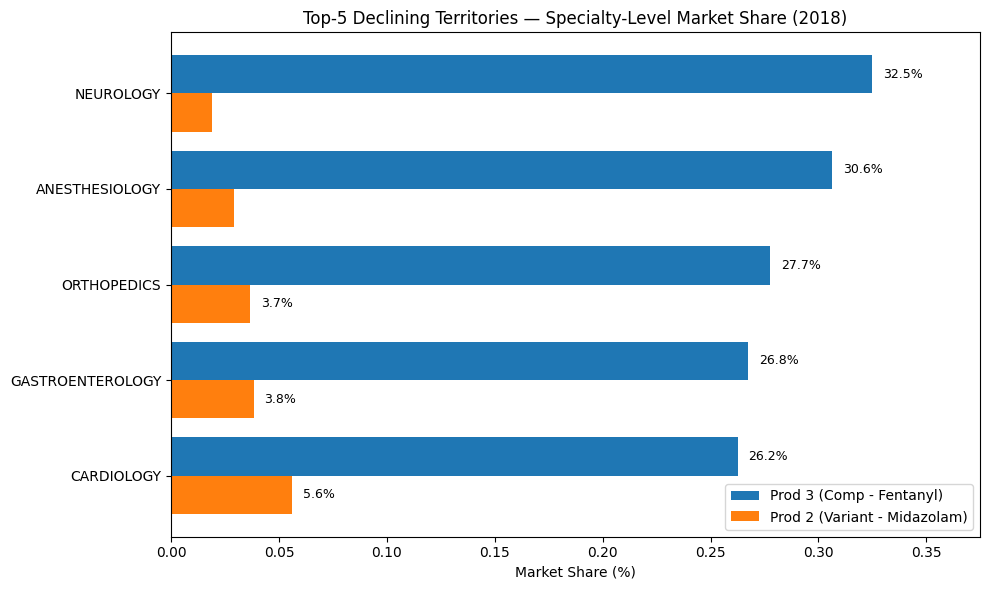

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
plot_df_1 = (
    top5_loss_2018[[variant, competitor]]
    .reset_index()
)

y = np.arange(len(plot_df_1))

plt.figure(figsize=(10, 6))

bars_comp = plt.barh(
    y - 0.2,
    plot_df_1[competitor],
    height=0.4,
    label=competitor
)

bars_var = plt.barh(
    y + 0.2,
    plot_df_1[variant],
    height=0.4,
    label=variant
)

plt.yticks(y, plot_df_1['Specialty'])
plt.xlabel('Market Share (%)')
plt.title('Top-5 Declining Territories — Specialty-Level Market Share (2018)')
plt.gca().invert_yaxis()

# ---- Add % labels ----
for bars in [bars_comp, bars_var]:
    for bar in bars:
        width = bar.get_width()
        if width > 0.03:  # avoid clutter
            plt.text(
                width + 0.005,
                bar.get_y() + bar.get_height() / 2,
                f"{width*100:.1f}%",
                va='center',
                fontsize=9
            )

plt.xlim(0, max(plot_df_1[competitor].max(), plot_df_1[variant].max()) + 0.05)
plt.legend()
plt.tight_layout()
plt.show()


NBRx — Definition NBRx in year Y = HCPs who prescribed the brand in year Y but did NOT prescribe the same brand in year Y-1

In [157]:
hcp_first_year = (
    market_df
    .groupby(['product', 'fac_prvdr_npi_num'])['year']
    .min()
    .reset_index(name='first_year')
)


In [158]:
brand_year_writers = (
    market_df
    .groupby(['product', 'year'])['fac_prvdr_npi_num']
    .unique()
    .reset_index(name='writers')
)


In [159]:
def compute_nbrx(df, product, prev_year, curr_year):
    prev_writers = set(
        df[
            (df['product'] == product) &
            (df['year'] == prev_year)
        ]['fac_prvdr_npi_num']
    )

    curr_writers = set(
        df[
            (df['product'] == product) &
            (df['year'] == curr_year)
        ]['fac_prvdr_npi_num']
    )

    nbrx = curr_writers - prev_writers
    return len(nbrx)


In [160]:
products_of_interest = [
    'Prod 1 (Leader - Ketorolac)',
    'Prod 2 (Variant - Midazolam)'
]

nbrx_results = []

for product in products_of_interest:
    nbrx_results.append({
        'product': product,
        'year': 2017,
        'nbrx_writers': compute_nbrx(market_df, product, 2016, 2017)
    })
    nbrx_results.append({
        'product': product,
        'year': 2018,
        'nbrx_writers': compute_nbrx(market_df, product, 2017, 2018)
    })

nbrx_df = pd.DataFrame(nbrx_results)



In [161]:
total_writers_by_year = (
    market_df
    .groupby(['product', 'year'])['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='total_writers')
)

nbrx_df = nbrx_df.merge(
    total_writers_by_year,
    on=['product', 'year'],
    how='left'
)


In [162]:
nbrx_df['nbrx_rate'] = nbrx_df['nbrx_writers'] / nbrx_df['total_writers']


In [163]:
# Pivot for plotting
nbrx_pivot = (
    nbrx_df
    .pivot(index='year', columns='product', values='nbrx_rate')
    .sort_index()
)

# Calculate % change from 2017 to 2018
nbrx_pct_change = (
    (nbrx_pivot.loc[2018] - nbrx_pivot.loc[2017]) /
    nbrx_pivot.loc[2017]
) * 100


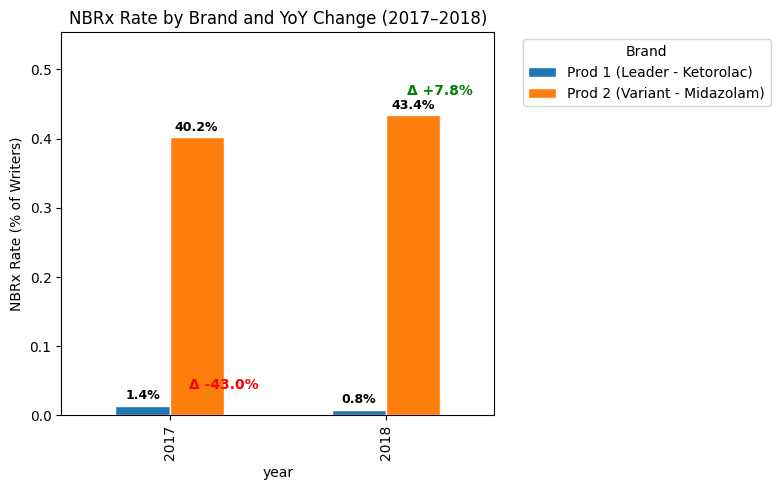

In [164]:
import matplotlib.pyplot as plt
import numpy as np

ax = nbrx_pivot.plot(
    kind='bar',
    figsize=(8, 5),
    edgecolor='white'
)

# % labels on bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.005,
                f"{height*100:.1f}%",
                ha='center',
                va='bottom',
                fontsize=9,
                fontweight='bold'
            )

# Annotate % change (2017 → 2018) above 2018 bars
for i, product in enumerate(nbrx_pivot.columns):
    pct = nbrx_pct_change[product]
    ax.text(
        i + 0.25,                      # position near 2018 bar
        nbrx_pivot.loc[2018, product] + 0.03,
        f"Δ {pct:+.1f}%",
        ha='center',
        fontsize=10,
        color='green' if pct > 0 else 'red',
        fontweight='bold'
    )

# Formatting
plt.ylabel('NBRx Rate (% of Writers)')
plt.title('NBRx Rate by Brand and YoY Change (2017–2018)')
plt.ylim(0, nbrx_pivot.max().max() + 0.12)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Question: Do new Product 2 writers come back for a 2nd or 3rd prescription?

In [165]:
# Product 2 only
p2 = market_df[market_df['product'] == 'Prod 2 (Variant - Midazolam)']

hcp_claims = (
    p2
    .groupby(['fac_prvdr_npi_num', 'year'])['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='claims')
)

hcp_total = (
    hcp_claims
    .groupby('fac_prvdr_npi_num')['claims']
    .sum()
    .reset_index()
)

hcp_total['bucket'] = pd.cut(
    hcp_total['claims'],
    bins=[0, 1, 2, 100],
    labels=['1 write only', '2 writes', '3+ writes']
)

hcp_total['bucket'].value_counts(normalize=True) * 100


bucket
3+ writes       48.604651
2 writes        27.441860
1 write only    23.953488
Name: proportion, dtype: float64

Rep KPI shift: new writer → repeat writer

Question: Are most Product 2 writers low-volume?

In [166]:
claims_per_writer = (
    p2
    .groupby(['year'])['cur_clm_uniq_id']
    .nunique()
    /
    p2.groupby(['year'])['fac_prvdr_npi_num'].nunique()
)

claims_per_writer


year
2016    1.505263
2017    1.507246
2018    1.336283
dtype: float64

Flag new Product 2 writers (30–45 day follow-up)

Question: Do new writers drop off immediately after first write?

In [167]:
p2_sorted = p2.sort_values(['fac_prvdr_npi_num', 'claim_date'])

p2_sorted['next_claim_date'] = (
    p2_sorted
    .groupby('fac_prvdr_npi_num')['claim_date']
    .shift(-1)
)

p2_sorted['days_to_next'] = (
    p2_sorted['next_claim_date'] - p2_sorted['claim_date']
).dt.days


In [168]:
p2_sorted['days_to_next'].describe()


count     718.000000
mean      235.087744
std       206.959255
min         1.000000
25%        64.000000
50%       178.000000
75%       353.500000
max      1024.000000
Name: days_to_next, dtype: float64

Question: Is Product 2 being used as an add-on instead of a replacement?

In [169]:
hcp_year_product = (
    market_df
    .groupby(['fac_prvdr_npi_num', 'year'])['product']
    .nunique()
    .reset_index(name='num_products')
)

hcp_year_product['multi_product_writer'] = hcp_year_product['num_products'] > 1

hcp_year_product['multi_product_writer'].mean()


np.float64(0.9191716766867067)

Product 3 winning on depth, not breadth

Question: Is Product 3 written fewer times by more people, or more times by fewer people?

In [170]:
summary = (
    market_df
    .groupby(['product', 'year'])
    .agg(
        writers=('fac_prvdr_npi_num', 'nunique'),
        claims=('cur_clm_uniq_id', 'nunique')
    )
    .reset_index()
)

summary['claims_per_writer'] = summary['claims'] / summary['writers']
summary


,product,year,writers,claims,claims_per_writer
0,Prod 1 (Leader - Ketorolac),2016,492,3124,6.349593
1,Prod 1 (Leader - Ketorolac),2017,495,3672,7.418182
2,Prod 1 (Leader - Ketorolac),2018,496,3290,6.633065
3,Prod 2 (Variant - Midazolam),2016,285,429,1.505263
4,Prod 2 (Variant - Midazolam),2017,276,416,1.507246
5,Prod 2 (Variant - Midazolam),2018,226,302,1.336283
6,Prod 3 (Comp - Fentanyl),2016,344,609,1.770349
7,Prod 3 (Comp - Fentanyl),2017,416,1040,2.500000
8,Prod 3 (Comp - Fentanyl),2018,468,1607,3.433761
9,Prod 4 (Alt - Propofol),2016,72,81,1.125000


Other analytics

In [171]:
df = market_df.copy()

df = df.sort_values(['fac_prvdr_npi_num', 'product', 'claim_date'])

# First-ever prescription date
first_rx = (
    df
    .groupby(['fac_prvdr_npi_num', 'product'])['claim_date']
    .min()
    .reset_index(name='first_rx_date')
)

df = df.merge(first_rx, on=['fac_prvdr_npi_num', 'product'], how='left')

df['days_from_first'] = (
    df['claim_date'] - df['first_rx_date']
).dt.days

df['rx_order'] = (
    df.groupby(['fac_prvdr_npi_num', 'product'])
      .cumcount() + 1
)


In [172]:
df['is_nbrx'] = df['rx_order'] == 1
df['is_2nd_rx_45d'] = (df['rx_order'] >= 2) & (df['days_from_first'] <= 45)
df['is_3rd_rx_90d'] = (df['rx_order'] >= 3) & (df['days_from_first'] <= 90)
df['is_loyal'] = df['rx_order'] >= 3


In [173]:
funnel = (
    df
    .groupby(['product', 'year'])
    .agg(
        nbrx_writers=('fac_prvdr_npi_num', lambda x: x[df.loc[x.index, 'is_nbrx']].nunique()),
        second_rx=('fac_prvdr_npi_num', lambda x: x[df.loc[x.index, 'is_2nd_rx_45d']].nunique()),
        third_rx=('fac_prvdr_npi_num', lambda x: x[df.loc[x.index, 'is_3rd_rx_90d']].nunique()),
        loyal_writers=('fac_prvdr_npi_num', lambda x: x[df.loc[x.index, 'is_loyal']].nunique())
    )
    .reset_index()
)


In [174]:
funnel['nbrx_to_2nd'] = (
    funnel['second_rx'] / funnel['nbrx_writers']
).replace([np.inf, np.nan], 0)

funnel['nbrx_to_3rd'] = (
    funnel['third_rx'] / funnel['nbrx_writers']
).replace([np.inf, np.nan], 0)


In [175]:
display(
    funnel[
        ['product', 'year',
         'nbrx_writers', 'second_rx', 'third_rx',
         'nbrx_to_2nd', 'nbrx_to_3rd']
    ]
    .assign(
        nbrx_to_2nd_pct=lambda x: (x['nbrx_to_2nd'] * 100).round(1),
        nbrx_to_3rd_pct=lambda x: (x['nbrx_to_3rd'] * 100).round(1)
    )
)


,product,year,nbrx_writers,second_rx,third_rx,nbrx_to_2nd,nbrx_to_3rd,nbrx_to_2nd_pct,nbrx_to_3rd_pct
0,Prod 1 (Leader - Ketorolac),2016,492,221,187,0.449187,0.380081,44.9,38.0
1,Prod 1 (Leader - Ketorolac),2017,7,8,6,1.142857,0.857143,114.3,85.7
2,Prod 1 (Leader - Ketorolac),2018,0,0,0,NaN,NaN,NaN,NaN
3,Prod 2 (Variant - Midazolam),2016,285,38,6,0.133333,0.021053,13.3,2.1
4,Prod 2 (Variant - Midazolam),2017,111,14,2,0.126126,0.018018,12.6,1.8
5,Prod 2 (Variant - Midazolam),2018,34,2,0,0.058824,0.0,5.9,0.0
6,Prod 3 (Comp - Fentanyl),2016,344,57,9,0.165698,0.026163,16.6,2.6
7,Prod 3 (Comp - Fentanyl),2017,119,38,13,0.319328,0.109244,31.9,10.9
8,Prod 3 (Comp - Fentanyl),2018,32,8,6,0.25,0.1875,25.0,18.8
9,Prod 4 (Alt - Propofol),2016,72,0,0,0.0,0.0,0.0,0.0


In [176]:
df['territory_group'] = np.where(
    df['territory_name'].isin(top5_territories),
    'Top 5 Declining',
    np.where(
        df['territory_name'].isin(bottom5_territories),
        'Bottom 5 Growing',
        'Other'
    )
)


In [177]:
funnel_territory = (
    df
    .groupby(['territory_group', 'product', 'year'])
    .agg(
        nbrx_writers=('fac_prvdr_npi_num', lambda x: x[df.loc[x.index, 'is_nbrx']].nunique()),
        second_rx=('fac_prvdr_npi_num', lambda x: x[df.loc[x.index, 'is_2nd_rx_45d']].nunique()),
        third_rx=('fac_prvdr_npi_num', lambda x: x[df.loc[x.index, 'is_3rd_rx_90d']].nunique())
    )
    .reset_index()
)

funnel_territory['nbrx_to_2nd'] = (
    funnel_territory['second_rx'] / funnel_territory['nbrx_writers']
).replace([np.inf, np.nan], 0)

funnel_territory['nbrx_to_3rd'] = (
    funnel_territory['third_rx'] / funnel_territory['nbrx_writers']
).replace([np.inf, np.nan], 0)


In [178]:
display(
    funnel_territory[
        funnel_territory['territory_group'].isin(['Top 5 Declining', 'Bottom 5 Growing'])
    ]
    .assign(
        nbrx_to_2nd_pct=lambda x: (x['nbrx_to_2nd'] * 100).round(1),
        nbrx_to_3rd_pct=lambda x: (x['nbrx_to_3rd'] * 100).round(1)
    )
    .sort_values(['territory_group', 'product', 'year'])
)


,territory_group,product,year,nbrx_writers,second_rx,third_rx,nbrx_to_2nd,nbrx_to_3rd,nbrx_to_2nd_pct,nbrx_to_3rd_pct
0,Bottom 5 Growing,Prod 1 (Leader - Ketorolac),2016,79,29,26,0.367089,0.329114,36.7,32.9
1,Bottom 5 Growing,Prod 1 (Leader - Ketorolac),2017,0,0,0,NaN,NaN,NaN,NaN
2,Bottom 5 Growing,Prod 1 (Leader - Ketorolac),2018,0,0,0,NaN,NaN,NaN,NaN
3,Bottom 5 Growing,Prod 2 (Variant - Midazolam),2016,44,9,1,0.204545,0.022727,20.5,2.3
4,Bottom 5 Growing,Prod 2 (Variant - Midazolam),2017,8,0,0,0.0,0.0,0.0,0.0
5,Bottom 5 Growing,Prod 2 (Variant - Midazolam),2018,6,0,0,0.0,0.0,0.0,0.0
6,Bottom 5 Growing,Prod 3 (Comp - Fentanyl),2016,48,12,1,0.25,0.020833,25.0,2.1
7,Bottom 5 Growing,Prod 3 (Comp - Fentanyl),2017,23,4,1,0.173913,0.043478,17.4,4.3
8,Bottom 5 Growing,Prod 3 (Comp - Fentanyl),2018,6,3,1,0.5,0.166667,50.0,16.7
9,Bottom 5 Growing,Prod 4 (Alt - Propofol),2016,10,0,0,0.0,0.0,0.0,0.0


In [179]:
import matplotlib.pyplot as plt

def plot_funnel_conversion(df, territory_group, year):
    plot_df = df[
        (df['territory_group'] == territory_group) &
        (df['year'] == year)
    ]

    plt.figure(figsize=(8, 5))

    for product in plot_df['product'].unique():
        sub = plot_df[plot_df['product'] == product]
        plt.plot(
            ['NBx→2nd', 'NBx→3rd'],
            [sub['nbrx_to_2nd'].values[0], sub['nbrx_to_3rd'].values[0]],
            marker='o',
            label=product
        )

    plt.title(f'Post-First-Rx Conversion — {territory_group} ({year})')
    plt.ylabel('Conversion Rate')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


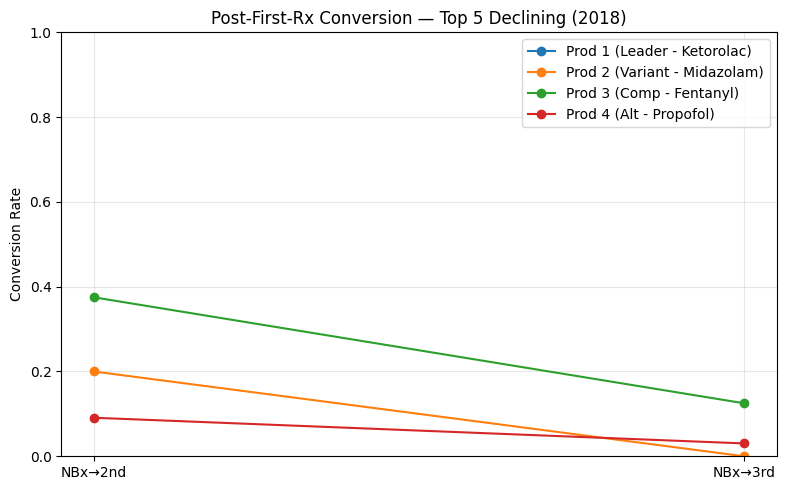

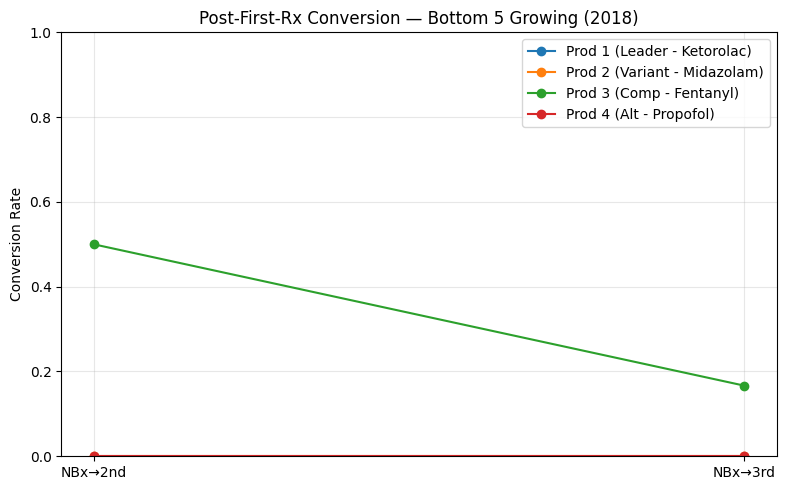

In [180]:
plot_funnel_conversion(funnel_territory, 'Top 5 Declining', 2018)
plot_funnel_conversion(funnel_territory, 'Bottom 5 Growing', 2018)


In [181]:
#Step 2.1 — Isolate Product 2 writers
p2 = market_df[market_df['product'] == 'Prod 2 (Variant - Midazolam)']


In [182]:
#Step 2.2 — Count Product 2 claims per HCP (lifetime)
p2_hcp_claims = (
    p2
    .groupby('fac_prvdr_npi_num')['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='p2_claims')
)

In [183]:
one_write_hcps = p2_hcp_claims[
    p2_hcp_claims['p2_claims'] == 1
]['fac_prvdr_npi_num']


In [184]:
hcp_total_volume = (
    market_df
    .groupby('fac_prvdr_npi_num')['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='total_claims_all_products')
)


In [185]:
salvageable = (
    hcp_total_volume
    .merge(
        p2_hcp_claims,
        on='fac_prvdr_npi_num',
        how='left'
    )
    .fillna({'p2_claims': 0})
)

salvageable = salvageable[
    salvageable['fac_prvdr_npi_num'].isin(one_write_hcps)
]


In [186]:
#Flag high-value salvageables
volume_threshold = salvageable['total_claims_all_products'].quantile(0.75)

salvageable['is_high_value'] = (
    salvageable['total_claims_all_products'] >= volume_threshold
)


In [187]:
#Add competitor capture (critical insight)
p3_volume = (
    market_df[market_df['product'] == 'Prod 3 (Comp - Fentanyl)']
    .groupby('fac_prvdr_npi_num')['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='p3_claims')
)


In [188]:
salvageable = salvageable.merge(
    p3_volume,
    on='fac_prvdr_npi_num',
    how='left'
).fillna({'p3_claims': 0})


In [189]:
salvageable_summary = salvageable.agg(
    salvageable_hcps=('fac_prvdr_npi_num', 'nunique'),
    avg_total_volume=('total_claims_all_products', 'mean'),
    avg_p3_claims=('p3_claims', 'mean')
)

salvageable_summary


,fac_prvdr_npi_num,total_claims_all_products,p3_claims
salvageable_hcps,103.0,NaN,NaN
avg_total_volume,NaN,43.902913,NaN
avg_p3_claims,NaN,NaN,5.834951


In [190]:
high_value_summary = salvageable[salvageable['is_high_value']].agg(
    high_value_hcps=('fac_prvdr_npi_num', 'nunique'),
    avg_total_volume=('total_claims_all_products', 'mean'),
    avg_p3_claims=('p3_claims', 'mean')
)

high_value_summary


,fac_prvdr_npi_num,total_claims_all_products,p3_claims
high_value_hcps,27.0,NaN,NaN
avg_total_volume,NaN,67.185185,NaN
avg_p3_claims,NaN,NaN,8.888889


In [191]:
salvageable_geo = (
    salvageable
    .merge(
        market_df[['fac_prvdr_npi_num', 'territory_name']].drop_duplicates(),
        on='fac_prvdr_npi_num',
        how='left'
    )
    .groupby('territory_name')
    .agg(
        hcps=('fac_prvdr_npi_num', 'nunique'),
        avg_volume=('total_claims_all_products', 'mean')
    )
    .sort_values('hcps', ascending=False)
)


In [192]:
salvageable_spec = (
    salvageable
    .merge(
        market_df[['fac_prvdr_npi_num', 'Specialty']].drop_duplicates(),
        on='fac_prvdr_npi_num',
        how='left'
    )
    .groupby('Specialty')
    .agg(
        hcps=('fac_prvdr_npi_num', 'nunique'),
        avg_volume=('total_claims_all_products', 'mean')
    )
    .sort_values('hcps', ascending=False)
)


SWITCHING BARRIERS 

BARRIER 1 — Protocol Anchoring / Habit

Question: Once an HCP starts Product 3, do they keep using it persistently?

Proxy

Product persistence across years

In [193]:
# Product-level persistence across years
hcp_product_year = (
    market_df
    .groupby(['fac_prvdr_npi_num', 'product'])['year']
    .nunique()
    .reset_index(name='num_years_active')
)

# Compare persistence
persistence_summary = (
    hcp_product_year
    .groupby('product')['num_years_active']
    .mean()
    .reset_index(name='avg_years_active')
)

persistence_summary


,product,avg_years_active
0,Prod 1 (Leader - Ketorolac),2.971944
1,Prod 2 (Variant - Midazolam),1.830233
2,Prod 3 (Comp - Fentanyl),2.480808
3,Prod 4 (Alt - Propofol),1.447802


In [194]:
#Lack of Replacement Behavior
# First product written by HCP
first_product = (
    market_df
    .sort_values('claim_date')
    .groupby('fac_prvdr_npi_num')['product']
    .first()
    .reset_index(name='first_product')
)

# Last product written by HCP
last_product = (
    market_df
    .sort_values('claim_date')
    .groupby('fac_prvdr_npi_num')['product']
    .last()
    .reset_index(name='last_product')
)

switch_df = first_product.merge(last_product, on='fac_prvdr_npi_num')

switch_matrix = (
    switch_df
    .groupby(['first_product', 'last_product'])
    .size()
    .reset_index(name='hcp_count')
)

switch_matrix


,first_product,last_product,hcp_count
0,Prod 1 (Leader - Ketorolac),Prod 1 (Leader - Ketorolac),182
1,Prod 1 (Leader - Ketorolac),Prod 2 (Variant - Midazolam),17
2,Prod 1 (Leader - Ketorolac),Prod 3 (Comp - Fentanyl),116
3,Prod 1 (Leader - Ketorolac),Prod 4 (Alt - Propofol),23
4,Prod 2 (Variant - Midazolam),Prod 1 (Leader - Ketorolac),41
5,Prod 2 (Variant - Midazolam),Prod 3 (Comp - Fentanyl),27
6,Prod 2 (Variant - Midazolam),Prod 4 (Alt - Propofol),3
7,Prod 3 (Comp - Fentanyl),Prod 1 (Leader - Ketorolac),50
8,Prod 3 (Comp - Fentanyl),Prod 2 (Variant - Midazolam),3
9,Prod 3 (Comp - Fentanyl),Prod 3 (Comp - Fentanyl),18


In [195]:
hcp_prod_year = (
    market_df
    .groupby(['fac_prvdr_npi_num', 'year', 'product'])['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='claims')
)


In [196]:
# Rank products per HCP-year
hcp_prod_year['rank'] = (
    hcp_prod_year
    .groupby(['fac_prvdr_npi_num', 'year'])['claims']
    .rank(method='dense', ascending=False)
)

# Keep ONLY strict winners (rank == 1 and unique)
dominant = hcp_prod_year[hcp_prod_year['rank'] == 1]

# Drop ties
dominant = dominant.merge(
    dominant.groupby(['fac_prvdr_npi_num', 'year'])['rank']
    .count()
    .reset_index(name='n_top'),
    on=['fac_prvdr_npi_num', 'year']
)

dominant = dominant[dominant['n_top'] == 1]


In [197]:
switch_17_18 = (
    dominant
    .pivot(index='fac_prvdr_npi_num', columns='year', values='product')
    .dropna(subset=[2017, 2018])
    .reset_index()
)


In [198]:
switch_matrix_final = (
    switch_17_18
    .groupby([2017, 2018])
    .size()
    .reset_index(name='hcp_count')
)

switch_pivot = switch_matrix_final.pivot(
    index=2017,
    columns=2018,
    values='hcp_count'
).fillna(0)

switch_pct = switch_pivot.div(
    switch_pivot.sum(axis=1),
    axis=0
)

switch_pct


2018,Prod 1 (Leader - Ketorolac),Prod 3 (Comp - Fentanyl),Prod 4 (Alt - Propofol)
2017,,,
Prod 1 (Leader - Ketorolac),0.885922,0.11165,0.002427
Prod 3 (Comp - Fentanyl),1.000000,0.00000,0.000000
Prod 4 (Alt - Propofol),1.000000,0.00000,0.000000


In [199]:
market_df['product']

0           Prod 3 (Comp - Fentanyl)
1        Prod 1 (Leader - Ketorolac)
2                                NaN
3           Prod 3 (Comp - Fentanyl)
4                                NaN
                    ...             
28363    Prod 1 (Leader - Ketorolac)
28364       Prod 3 (Comp - Fentanyl)
28365                            NaN
28366                            NaN
28367                            NaN
Name: product, Length: 28351, dtype: object

In [200]:
P2 = 'Prod 2 (Variant - Midazolam)'


In [201]:
p2_once = (
    market_df[market_df['product'] == P2]
    .groupby('fac_prvdr_npi_num')['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='p2_claims')
)

never_converted = p2_once[p2_once['p2_claims'] == 1]
never_converted


,fac_prvdr_npi_num,p2_claims
0,1001501533,1
5,1213622409,1
6,1227762246,1
9,1258001569,1
10,1304895734,1
...,...,...
411,9774996872,1
412,9785293753,1
416,9834851544,1
422,9918395005,1




Question: Do HCPs test Product 2 but immediately revert?

In [202]:
p2_sorted = (
    market_df[market_df['product'] == 'Prod 2 (Variant - Midazolam)']
    .sort_values(['fac_prvdr_npi_num', 'claim_date'])
)

p2_sorted['next_claim_date'] = (
    p2_sorted
    .groupby('fac_prvdr_npi_num')['claim_date']
    .shift(-1)
)

p2_sorted['days_to_next'] = (
    p2_sorted['next_claim_date'] - p2_sorted['claim_date']
).dt.days

p2_sorted['days_to_next'].describe()


count     718.000000
mean      235.087744
std       206.959255
min         1.000000
25%        64.000000
50%       178.000000
75%       353.500000
max      1024.000000
Name: days_to_next, dtype: float64

Depth Lock-in (Competitor Strength)

Question: Is Product 3 used deeply even by multi-product writers?

In [203]:
multi_product_hcps = (
    market_df
    .groupby('fac_prvdr_npi_num')['product']
    .nunique()
    .reset_index(name='num_products')
)

multi_product_hcps = multi_product_hcps[
    multi_product_hcps['num_products'] > 1
]['fac_prvdr_npi_num']

depth_df = (
    market_df[market_df['fac_prvdr_npi_num'].isin(multi_product_hcps)]
    .groupby(['product'])['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='claims')
)

writers_df = (
    market_df[market_df['fac_prvdr_npi_num'].isin(multi_product_hcps)]
    .groupby(['product'])['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='writers')
)

depth_df.merge(writers_df, on='product').assign(
    claims_per_writer=lambda x: x['claims'] / x['writers']
)


,product,claims,writers,claims_per_writer
0,Prod 1 (Leader - Ketorolac),10060,498,20.200803
1,Prod 2 (Variant - Midazolam),1147,430,2.667442
2,Prod 3 (Comp - Fentanyl),3253,495,6.571717
3,Prod 4 (Alt - Propofol),704,364,1.934066


In [204]:
# ============================================================
# SECTION 3 – TOP-5 DECLINING TERRITORIES EXECUTION DIAGNOSTIC
# 2018 SNAPSHOT (FINAL, CLEAN VERSION)
# ============================================================

YEAR = 2018
P2_NAME = 'Prod 2 (Variant - Midazolam)'

# ------------------------------------------------------------
# Filter to Top-5 Declining Territories (2018 only)
# ------------------------------------------------------------
top5_df = market_df[
    (market_df['territory_name'].isin(top5_territories)) &
    (market_df['year'] == YEAR)
].copy()

# ------------------------------------------------------------
# Total writers (all products)
# ------------------------------------------------------------
total_writers = (
    top5_df
    .groupby('territory_name')['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='total_writers')
)

# ------------------------------------------------------------
# Product 2 writers
# ------------------------------------------------------------
p2_df = top5_df[top5_df['product'] == P2_NAME]

p2_writers = (
    p2_df
    .groupby('territory_name')['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='p2_writers')
)

# ------------------------------------------------------------
# % New Product 2 writers (first-ever in 2018)
# ------------------------------------------------------------
first_rx = (
    market_df
    .groupby(['fac_prvdr_npi_num', 'product'])['year']
    .min()
    .reset_index(name='first_year')
)

new_p2 = first_rx[
    (first_rx['product'] == P2_NAME) &
    (first_rx['first_year'] == YEAR)
]

new_p2 = new_p2.merge(
    top5_df[['fac_prvdr_npi_num', 'territory_name']].drop_duplicates(),
    on='fac_prvdr_npi_num',
    how='inner'
)

new_writer_pct = (
    new_p2
    .groupby('territory_name')['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='new_p2_writers')
)

# ------------------------------------------------------------
# % Salvageable writers (1-and-done Product 2 writers)
# ------------------------------------------------------------
salvageable_top5 = salvageable.merge(
    top5_df[['fac_prvdr_npi_num', 'territory_name']].drop_duplicates(),
    on='fac_prvdr_npi_num',
    how='inner'
)

salvageable_pct = (
    salvageable_top5
    .groupby('territory_name')['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='salvageable_writers')
)

# ------------------------------------------------------------
# Avg claims per writer (market depth proxy)
# ------------------------------------------------------------
claims_per_writer = (
    top5_df
    .groupby('territory_name')
    .agg(
        total_claims=('cur_clm_uniq_id', 'nunique'),
        writers=('fac_prvdr_npi_num', 'nunique')
    )
    .reset_index()
)

claims_per_writer['avg_claims_per_writer'] = (
    claims_per_writer['total_claims'] /
    claims_per_writer['writers']
)

# ------------------------------------------------------------
# Dominant HCP specialty for Product 2
# ------------------------------------------------------------
dominant_specialty = (
    p2_df
    .groupby(['territory_name', 'Specialty'])['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='writers')
    .sort_values(['territory_name', 'writers'], ascending=[True, False])
    .drop_duplicates('territory_name')
)

# ------------------------------------------------------------
# FINAL EXECUTIVE ARCHETYPE TABLE (2018)
# ------------------------------------------------------------
summary_table = (
    total_writers
    .merge(p2_writers, on='territory_name', how='left')
    .merge(new_writer_pct, on='territory_name', how='left')
    .merge(salvageable_pct, on='territory_name', how='left')
    .merge(
        claims_per_writer[['territory_name', 'avg_claims_per_writer']],
        on='territory_name'
    )
    .merge(
        dominant_specialty[['territory_name', 'Specialty']],
        on='territory_name'
    )
)

summary_table['% New Writers'] = (
    summary_table['new_p2_writers'] /
    summary_table['p2_writers']
)

summary_table['% Salvageable Writers'] = (
    summary_table['salvageable_writers'] /
    summary_table['p2_writers']
)

summary_table = summary_table[[
    'territory_name',
    '% New Writers',
    '% Salvageable Writers',
    'avg_claims_per_writer',
    'Specialty'
]]

summary_table


,territory_name,% New Writers,% Salvageable Writers,avg_claims_per_writer,Specialty
0,"LA-San Diego, CA",0.153846,0.461538,19.864865,ANESTHESIOLOGY
1,"Minneapolis, MN",0.333333,0.833333,18.571429,ANESTHESIOLOGY
2,"New York, NY",0.083333,0.583333,20.410256,CARDIOLOGY
3,"Phoenix, AZ",NaN,1.000000,17.750000,CARDIOLOGY
4,"St Louis, MO",NaN,0.800000,18.166667,ANESTHESIOLOGY


In [205]:
YEAR = 2018
P2 = 'Prod 2 (Variant - Midazolam)'
P3 = 'Prod 3 (Comp - Fentanyl)'

def build_scorecard(df, territories, product, label):
    base = df[
        (df['year'] == YEAR) &
        (df['territory_name'].isin(territories)) &
        (df['product'] == product)
    ].copy()

    # Writers & claims
    writers = base['fac_prvdr_npi_num'].nunique()
    claims = base['cur_clm_uniq_id'].nunique()
    avg_claims = claims / writers if writers > 0 else 0

    # New writers
    first_rx = (
        df[df['product'] == product]
        .groupby('fac_prvdr_npi_num')['year']
        .min()
        .reset_index(name='first_year')
    )

    new_writers = first_rx[first_rx['first_year'] == YEAR]['fac_prvdr_npi_num']
    new_writers = base[
        base['fac_prvdr_npi_num'].isin(new_writers)
    ]['fac_prvdr_npi_num'].nunique()

    new_writer_pct = new_writers / writers if writers > 0 else 0

    # Funnel
    rx_counts = (
        base
        .groupby('fac_prvdr_npi_num')['cur_clm_uniq_id']
        .nunique()
    )

    nbrx = (rx_counts >= 1).sum()
    second = (rx_counts >= 2).sum()
    third = (rx_counts >= 3).sum()

    nbrx_to_2nd = second / nbrx if nbrx > 0 else 0
    nbrx_to_3rd = third / nbrx if nbrx > 0 else 0
    one_and_done = 1 - nbrx_to_2nd

    return pd.DataFrame({
        'Cohort': [label],
        'New writers %': [new_writer_pct],
        'NBx → 2nd Rx': [nbrx_to_2nd],
        'NBx → 3rd Rx': [nbrx_to_3rd],
        '% One-and-Done': [one_and_done],
        'Avg claims / writer': [avg_claims]
    })


# Build scorecard
scorecard_numeric = pd.concat([
    build_scorecard(market_df, top5_territories, P2, 'Top-5 Declining'),
    build_scorecard(market_df, bottom5_territories, P2, 'Bottom-5 Gaining'),
    build_scorecard(market_df, top5_territories, P3, 'Benchmark (Prod 3)')
]).reset_index(drop=True)

scorecard_numeric


,Cohort,New writers %,NBx → 2nd Rx,NBx → 3rd Rx,% One-and-Done,Avg claims / writer
0,Top-5 Declining,0.128205,0.230769,0.025641,0.769231,1.256410
1,Bottom-5 Gaining,0.162162,0.351351,0.027027,0.648649,1.378378
2,Benchmark (Prod 3),0.068376,0.846154,0.641026,0.153846,3.316239


In [206]:
def label_vs_benchmark(value, benchmark):
    if pd.isna(value) or pd.isna(benchmark):
        return 'NA'
    if value >= benchmark * 1.10:
        return 'High'
    elif value >= benchmark * 0.80:
        return 'Medium'
    else:
        return 'Low'


In [207]:
benchmark = scorecard_numeric[
    scorecard_numeric['Cohort'] == 'Benchmark (Prod 3)'
].iloc[0]

metrics = [
    'New writers %',
    'NBx → 2nd Rx',
    'NBx → 3rd Rx',
    '% One-and-Done',
    'Avg claims / writer'
]

scorecard_exec = scorecard_numeric[['Cohort']].copy()

for m in metrics:
    scorecard_exec[m] = scorecard_numeric[m].apply(
        lambda x: label_vs_benchmark(x, benchmark[m])
    )

scorecard_exec


,Cohort,New writers %,NBx → 2nd Rx,NBx → 3rd Rx,% One-and-Done,Avg claims / writer
0,Top-5 Declining,High,Low,Low,High,Low
1,Bottom-5 Gaining,High,Low,Low,High,Low
2,Benchmark (Prod 3),Medium,Medium,Medium,Medium,Medium


In [208]:
YEAR = 2018
P2 = 'Prod 2 (Variant - Midazolam)'

# Ensure chronological order
df_sorted = market_df.sort_values(['fac_prvdr_npi_num', 'claim_date'])

# First time each HCP tried Product 2
p2_first = (
    df_sorted[df_sorted['product'] == P2]
    .groupby('fac_prvdr_npi_num')['claim_date']
    .min()
    .reset_index(name='p2_first_date')
)

# Restrict to HCPs who tried Product 2 in 2018
p2_first = p2_first.merge(
    df_sorted[['fac_prvdr_npi_num', 'year']].drop_duplicates(),
    on='fac_prvdr_npi_num'
)

p2_first = p2_first[p2_first['year'] == YEAR]

# Claims AFTER first Product 2 use
post_p2 = df_sorted.merge(p2_first, on='fac_prvdr_npi_num')
post_p2 = post_p2[post_p2['claim_date'] > post_p2['p2_first_date']]

# Next product written after Product 2
next_product = (
    post_p2
    .groupby('fac_prvdr_npi_num')['product']
    .first()
    .reset_index(name='next_product')
)

# Build switching table
switch_table = (
    next_product
    .groupby('next_product')
    .size()
    .reset_index(name='hcp_count')
)

switch_table['% of HCPs'] = (
    switch_table['hcp_count'] /
    switch_table['hcp_count'].sum() * 100
).round(1)

switch_table.rename(columns={
    'next_product': 'Next Product After Product 2',
    'hcp_count': '# of HCPs'
}, inplace=True)

switch_table


,Next Product After Product 2,# of HCPs,% of HCPs
0,Prod 1 (Leader - Ketorolac),293,68.6
1,Prod 2 (Variant - Midazolam),39,9.1
2,Prod 3 (Comp - Fentanyl),87,20.4
3,Prod 4 (Alt - Propofol),8,1.9


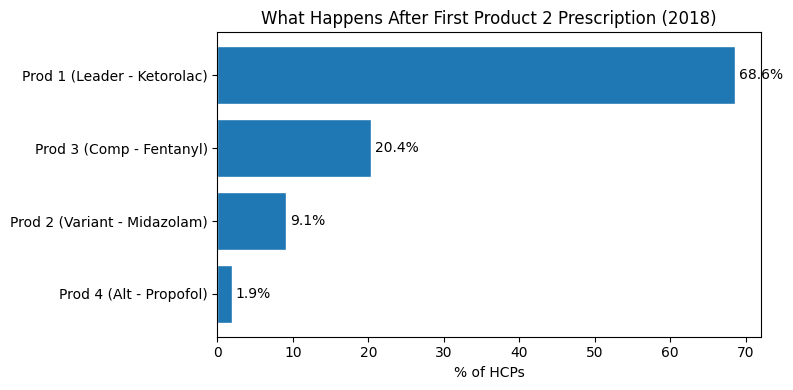

In [209]:
import matplotlib.pyplot as plt

plot_df = switch_table.sort_values('% of HCPs')

plt.figure(figsize=(8, 4))
plt.barh(
    plot_df['Next Product After Product 2'],
    plot_df['% of HCPs'],
    edgecolor='white'
)

for i, v in enumerate(plot_df['% of HCPs']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')

plt.xlabel('% of HCPs')
plt.title('What Happens After First Product 2 Prescription (2018)')
plt.tight_layout()
plt.show()


In [210]:
import matplotlib.pyplot as plt

YEAR = 2018
P2 = 'Prod 2 (Variant - Midazolam)'

def plot_post_p2_switching(df, territories, title):
    # Sort chronologically
    df_sorted = df.sort_values(['fac_prvdr_npi_num', 'claim_date'])

    # Restrict to territories
    df_sorted = df_sorted[df_sorted['territory_name'].isin(territories)]

    # First Product 2 prescription per HCP
    p2_first = (
        df_sorted[df_sorted['product'] == P2]
        .groupby('fac_prvdr_npi_num')['claim_date']
        .min()
        .reset_index(name='p2_first_date')
    )

    # Keep only those whose first P2 was in YEAR
    p2_first = p2_first.merge(
        df_sorted[['fac_prvdr_npi_num', 'year']].drop_duplicates(),
        on='fac_prvdr_npi_num'
    )
    p2_first = p2_first[p2_first['year'] == YEAR]

    # Claims AFTER first Product 2
    post_p2 = df_sorted.merge(p2_first, on='fac_prvdr_npi_num')
    post_p2 = post_p2[post_p2['claim_date'] > post_p2['p2_first_date']]

    # Next product after Product 2
    next_product = (
        post_p2
        .groupby('fac_prvdr_npi_num')['product']
        .first()
        .reset_index(name='next_product')
    )

    # Aggregate
    switch_table = (
        next_product
        .groupby('next_product')
        .size()
        .reset_index(name='hcp_count')
    )

    switch_table['pct'] = (
        switch_table['hcp_count'] /
        switch_table['hcp_count'].sum() * 100
    )

    switch_table = switch_table.sort_values('pct')

    # ---- Plot ----
    plt.figure(figsize=(8, 4))
    plt.barh(
        switch_table['next_product'],
        switch_table['pct'],
        edgecolor='white'
    )

    for i, v in enumerate(switch_table['pct']):
        plt.text(v + 0.5, i, f"{v:.1f}%", va='center')

    plt.xlabel('% of HCPs')
    plt.title(title)
    plt.tight_layout()
    plt.show()

    return switch_table


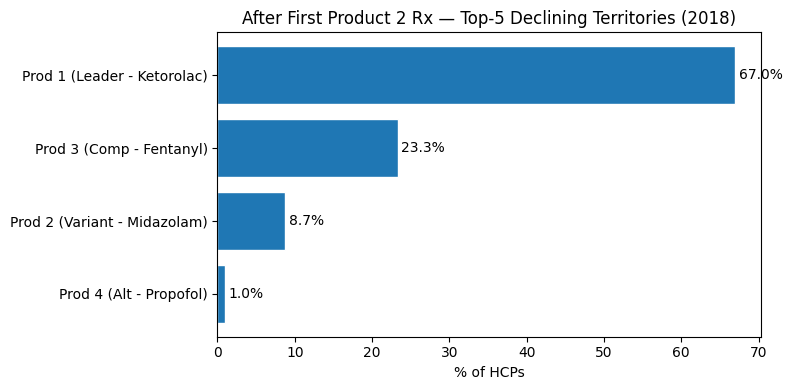

,next_product,hcp_count,pct
3,Prod 4 (Alt - Propofol),1,0.970874
1,Prod 2 (Variant - Midazolam),9,8.737864
2,Prod 3 (Comp - Fentanyl),24,23.300971
0,Prod 1 (Leader - Ketorolac),69,66.990291


In [211]:
top5_switch = plot_post_p2_switching(
    market_df,
    top5_territories,
    'After First Product 2 Rx — Top-5 Declining Territories (2018)'
)

top5_switch


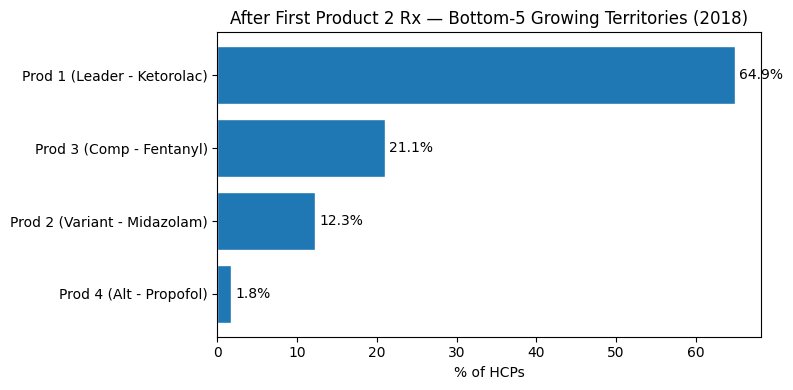

,next_product,hcp_count,pct
3,Prod 4 (Alt - Propofol),1,1.754386
1,Prod 2 (Variant - Midazolam),7,12.280702
2,Prod 3 (Comp - Fentanyl),12,21.052632
0,Prod 1 (Leader - Ketorolac),37,64.912281


In [212]:
bottom5_switch = plot_post_p2_switching(
    market_df,
    bottom5_territories,
    'After First Product 2 Rx — Bottom-5 Growing Territories (2018)'
)

bottom5_switch


In [213]:
total_claims = market_df['cur_clm_uniq_id'].nunique()

market_claims = market_df[
    market_df['product'].isin([
        'Prod 1 (Leader - Ketorolac)',
        'Prod 2 (Variant - Midazolam)',
        'Prod 3 (Comp - Fentanyl)',
        'Prod 4 (Alt - Propofol)'
    ])
]['cur_clm_uniq_id'].nunique()

total_claims, market_claims


(15140, 15139)

In [214]:
hcp_count = market_df['fac_prvdr_npi_num'].nunique()
patient_count = market_df['bene_mbi_id'].nunique()

hcp_count, patient_count


(499, 4043)

In [215]:
market_df.groupby('product')['cur_clm_uniq_id'].nunique().sort_values(ascending=False)


product
Prod 1 (Leader - Ketorolac)     10071
Prod 3 (Comp - Fentanyl)         3253
Prod 2 (Variant - Midazolam)     1147
Prod 4 (Alt - Propofol)           704
Name: cur_clm_uniq_id, dtype: int64

In [216]:
summary_metrics = pd.DataFrame({
    'Metric': [
        'Market Claims',
        'Unique Writers (HCPs)',
        'Unique Patients',
        'Avg Claims per Writer',
        'NBx → 2nd Rx Conversion',
        'NBx → 3rd Rx Conversion',
        'Raw Line Items'
    ],
    'Value': [
        # Market share base
        market_df['cur_clm_uniq_id'].nunique(),

        # Writers
        market_df['fac_prvdr_npi_num'].nunique(),

        # Patients
        market_df['bene_mbi_id'].nunique(),

        # Avg claims per writer
        (
            market_df['cur_clm_uniq_id'].nunique() /
            market_df['fac_prvdr_npi_num'].nunique()
        ),

        # NBx → 2nd Rx
        (
            market_df
            .groupby('fac_prvdr_npi_num')['cur_clm_uniq_id']
            .nunique()
            .pipe(lambda x: (x >= 2).sum() / (x >= 1).sum())
        ),

        # NBx → 3rd Rx
        (
            market_df
            .groupby('fac_prvdr_npi_num')['cur_clm_uniq_id']
            .nunique()
            .pipe(lambda x: (x >= 3).sum() / (x >= 1).sum())
        ),

        # Raw dataset size
        market_df.shape[0]
    ]
})

summary_metrics


,Metric,Value
0,Market Claims,15140.000000
1,Unique Writers (HCPs),499.000000
2,Unique Patients,4043.000000
3,Avg Claims per Writer,30.340681
4,NBx → 2nd Rx Conversion,1.000000
5,NBx → 3rd Rx Conversion,1.000000
6,Raw Line Items,28351.000000


In [217]:
P1 = 'Prod 1 (Leader - Ketorolac)'
P2 = 'Prod 2 (Variant - Midazolam)'
P3 = 'Prod 3 (Comp - Fentanyl)'
P4 = 'Prod 4 (Alt - Propofol)'


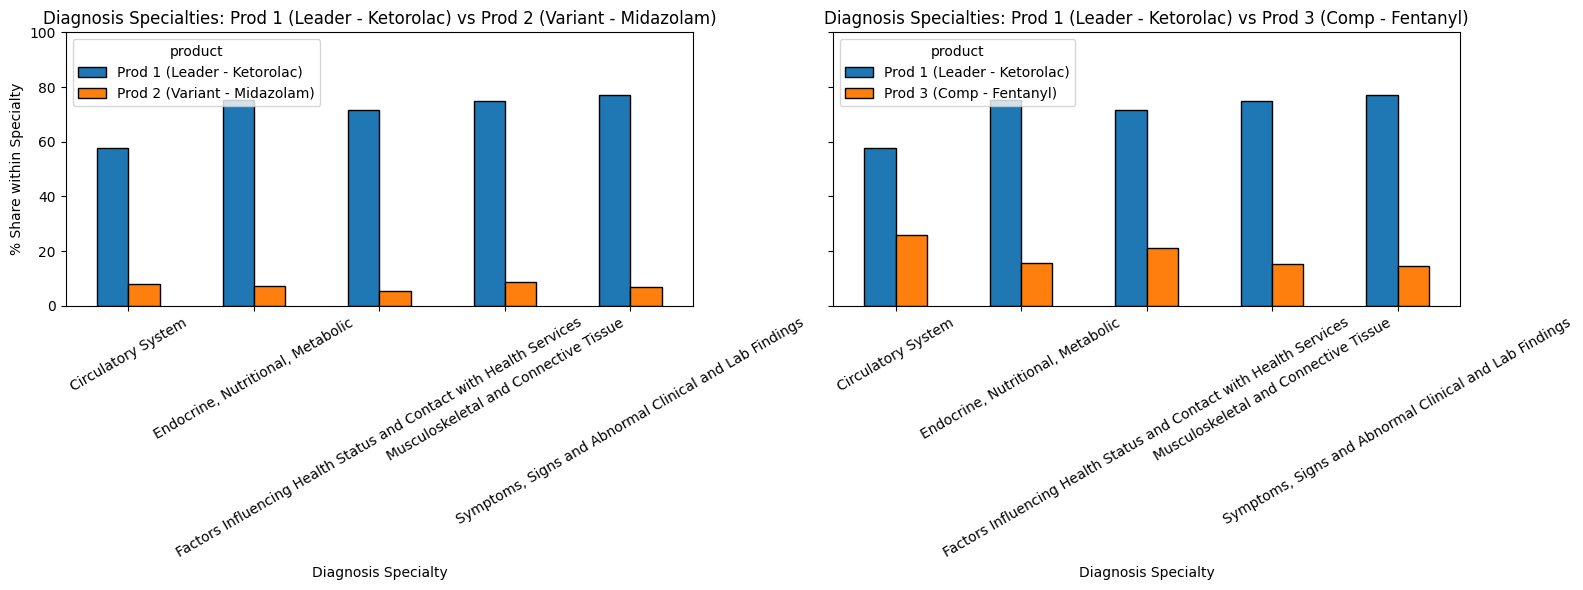

In [218]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# CONFIG
# -------------------------------
PRODUCTS = [
    'Prod 1 (Leader - Ketorolac)',
    'Prod 2 (Variant - Midazolam)',
    'Prod 3 (Comp - Fentanyl)',
    'Prod 4 (Alt - Propofol)'
]

COMPARE_SETS = [
    ('Prod 1 (Leader - Ketorolac)', 'Prod 2 (Variant - Midazolam)'),
    ('Prod 1 (Leader - Ketorolac)', 'Prod 3 (Comp - Fentanyl)')
]

TOP_N = 5

# -------------------------------
# AGGREGATE CLAIMS
# -------------------------------
dx_prod = (
    market_df
    .dropna(subset=['diagnosis_specialty', 'product'])
    .query("product in @PRODUCTS")
    .groupby(['diagnosis_specialty', 'product'])['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='claims')
)

# Total claims per diagnosis specialty
dx_totals = (
    dx_prod
    .groupby('diagnosis_specialty')['claims']
    .sum()
    .reset_index(name='total_claims')
)

dx_prod = dx_prod.merge(dx_totals, on='diagnosis_specialty')
dx_prod['share_pct'] = 100 * dx_prod['claims'] / dx_prod['total_claims']

# -------------------------------
# PLOTTING
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for ax, (p_a, p_b) in zip(axes, COMPARE_SETS):

    plot_df = dx_prod[dx_prod['product'].isin([p_a, p_b])]

    # Keep only top specialties by combined usage
    top_specialties = (
        plot_df
        .groupby('diagnosis_specialty')['claims']
        .sum()
        .nlargest(TOP_N)
        .index
    )

    plot_df = plot_df[plot_df['diagnosis_specialty'].isin(top_specialties)]

    pivot = plot_df.pivot(
        index='diagnosis_specialty',
        columns='product',
        values='share_pct'
    ).fillna(0)

    pivot.plot(
        kind='bar',
        ax=ax,
        edgecolor='black'
    )

    ax.set_title(f'Diagnosis Specialties: {p_a} vs {p_b}')
    ax.set_xlabel('Diagnosis Specialty')
    ax.set_ylabel('% Share within Specialty')
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


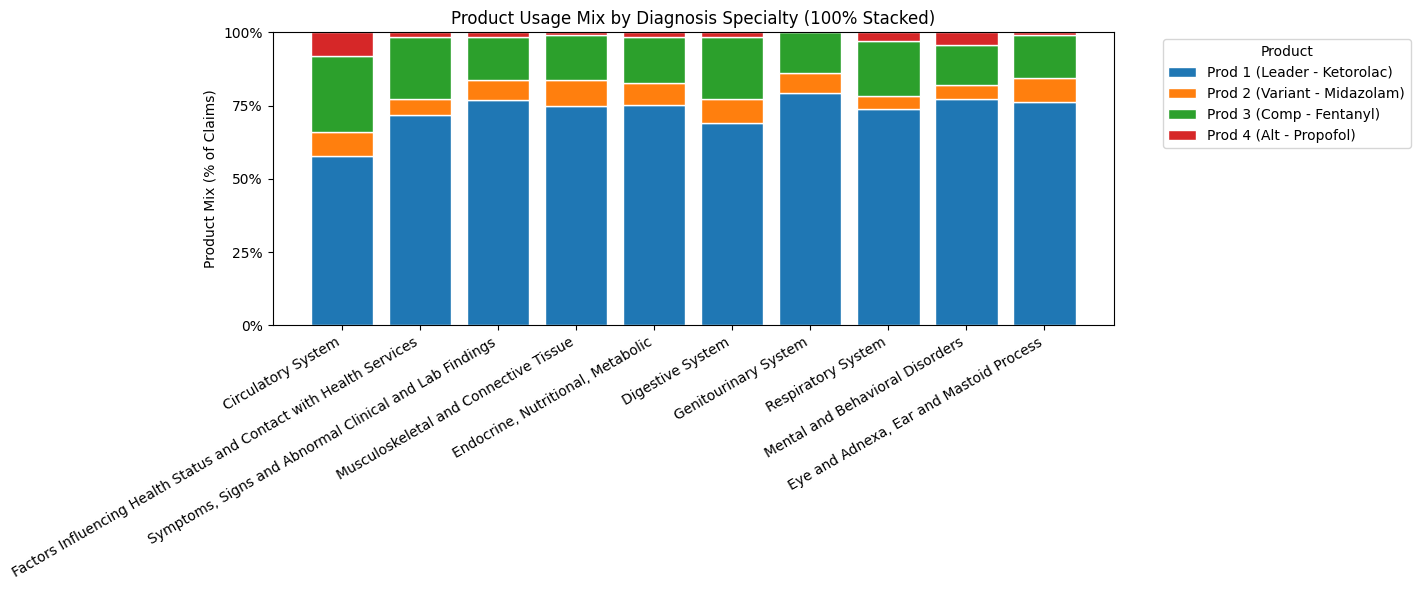

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Aggregate claims by specialty and product
# --------------------------------------------------
agg = (
    market_df
    .groupby(['diagnosis_specialty', 'product'])['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='claims')
)

# --------------------------------------------------
# 2. Convert to % share within each specialty
# --------------------------------------------------
agg['pct_share'] = (
    agg['claims'] /
    agg.groupby('diagnosis_specialty')['claims'].transform('sum')
)

# --------------------------------------------------
# 3. Pivot for stacked bar plotting
# --------------------------------------------------
pivot = (
    agg
    .pivot(index='diagnosis_specialty', columns='product', values='pct_share')
    .fillna(0)
)

# Optional: focus on top specialties by total volume
top_specialties = (
    agg.groupby('diagnosis_specialty')['claims']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

pivot = pivot.loc[top_specialties]

# --------------------------------------------------
# 4. Plot stacked % bar chart
# --------------------------------------------------
color_map = {
    'Prod 1 (Leader - Ketorolac)': '#1f77b4',
    'Prod 2 (Variant - Midazolam)': '#ff7f0e',
    'Prod 3 (Comp - Fentanyl)': '#2ca02c',
    'Prod 4 (Alt - Propofol)': '#d62728'
}

fig, ax = plt.subplots(figsize=(14, 6))

bottom = pd.Series([0] * len(pivot), index=pivot.index)

for product in pivot.columns:
    values = pivot[product]
    ax.bar(
        pivot.index,
        values,
        bottom=bottom,
        label=product,
        color=color_map.get(product, '#999999'),
        edgecolor='white'
    )
    bottom += values

# --------------------------------------------------
# 5. Formatting
# --------------------------------------------------
ax.set_ylabel('Product Mix (% of Claims)')
ax.set_title('Product Usage Mix by Diagnosis Specialty (100% Stacked)')
ax.set_ylim(0, 1)

ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])

plt.xticks(rotation=30, ha='right')

ax.legend(
    title='Product',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


In [220]:
import numpy as np
import matplotlib.pyplot as plt

def plot_specialty_product_mix_by_year(
    df,
    specialties,
    products,
    years,
    title,
    color_map,
    label_threshold=0.07
):
    plot_df = df[
        df['diagnosis_specialty'].isin(specialties) &
        df['product'].isin(products) &
        df['year'].isin(years)
    ]

    # ---- FIX HERE: derive claims properly ----
    agg = (
        plot_df
        .groupby(['diagnosis_specialty', 'year', 'product'])['cur_clm_uniq_id']
        .nunique()
        .reset_index(name='claims')
    )

    # Convert to % share within specialty-year
    agg['share'] = (
        agg['claims'] /
        agg.groupby(['diagnosis_specialty', 'year'])['claims'].transform('sum')
    )

    specialties = list(specialties)
    x = np.arange(len(specialties))
    width = 0.22
    year_gap = 0.05

    fig, ax = plt.subplots(figsize=(16, 7))

    for i, year in enumerate(years):
        year_df = agg[agg['year'] == year]
        bottom = np.zeros(len(specialties))
        x_pos = x + i * (width + year_gap)

        for product in products:
            values = (
                year_df[year_df['product'] == product]
                .set_index('diagnosis_specialty')
                .reindex(specialties)['share']
                .fillna(0)
                .values
            )

            ax.bar(
                x_pos,
                values,
                width,
                bottom=bottom,
                color=color_map.get(product, '#999999'),
                edgecolor='white',
                linewidth=1,
                label=product if i == 0 else None
            )

            # Labels
            for idx, v in enumerate(values):
                if v >= label_threshold:
                    ax.text(
                        x_pos[idx],
                        bottom[idx] + v / 2,
                        f"{v*100:.0f}%",
                        ha='center',
                        va='center',
                        fontsize=8,
                        color='white',
                        fontweight='bold'
                    )

            bottom += values

    ax.set_xticks(x + (len(years)-1)*(width + year_gap)/2)
    ax.set_xticklabels(specialties, rotation=30, ha='right')

    ax.set_ylim(0, 1)
    ax.set_ylabel('Share of Claims (%)')
    ax.set_title(title)

    ax.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


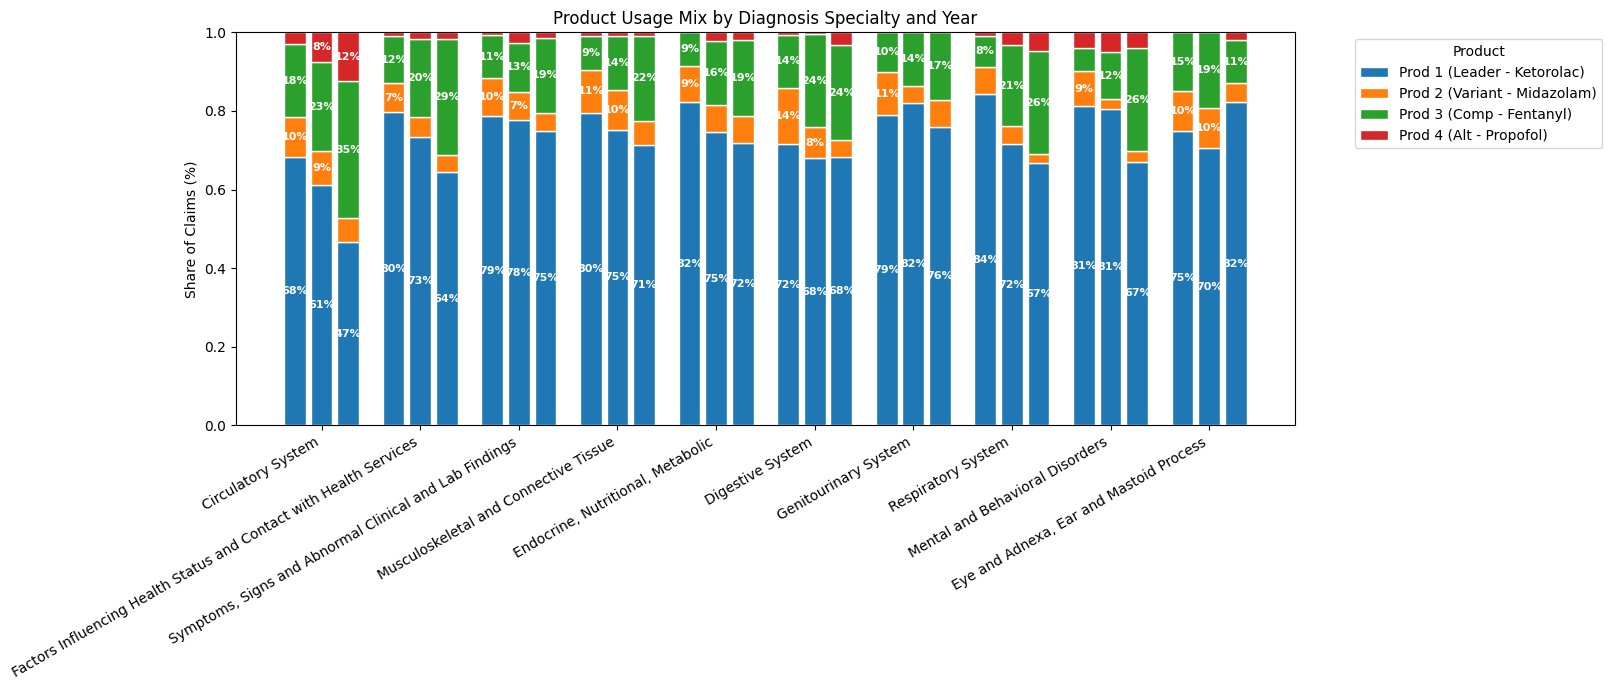

In [221]:
plot_specialty_product_mix_by_year(
    df=market_df,
    specialties=top_specialties,   # or market_df['diagnosis_specialty'].unique()
    products=[
        'Prod 1 (Leader - Ketorolac)',
        'Prod 2 (Variant - Midazolam)',
        'Prod 3 (Comp - Fentanyl)',
        'Prod 4 (Alt - Propofol)'
    ],
    years=[2016, 2017, 2018],
    title='Product Usage Mix by Diagnosis Specialty and Year',
    color_map={
        'Prod 1 (Leader - Ketorolac)': '#1f77b4',
        'Prod 2 (Variant - Midazolam)': '#ff7f0e',
        'Prod 3 (Comp - Fentanyl)': '#2ca02c',
        'Prod 4 (Alt - Propofol)': '#d62728'
    }
)


In [222]:
import numpy as np
import matplotlib.pyplot as plt

def plot_specialty_product_mix_by_year_top5(
    df,
    products,
    years,
    title,
    color_map,
    label_threshold=0.08
):
    # --------------------------------------------------
    # 1. Identify TOP 5 specialties by total claim volume
    # --------------------------------------------------
    top5_specialties = (
        df[df['year'].isin(years)]
        .groupby('diagnosis_specialty')['cur_clm_uniq_id']
        .nunique()
        .sort_values(ascending=False)
        .head(5)
        .index
        .tolist()
    )

    plot_df = df[
        (df['diagnosis_specialty'].isin(top5_specialties)) &
        (df['product'].isin(products)) &
        (df['year'].isin(years))
    ]

    # --------------------------------------------------
    # 2. Aggregate claim counts
    # --------------------------------------------------
    agg = (
        plot_df
        .groupby(['diagnosis_specialty', 'year', 'product'])['cur_clm_uniq_id']
        .nunique()
        .reset_index(name='claims')
    )

    # Convert to % share within specialty-year
    agg['share'] = (
        agg['claims'] /
        agg.groupby(['diagnosis_specialty', 'year'])['claims'].transform('sum')
    )

    specialties = top5_specialties
    x = np.arange(len(specialties))
    width = 0.22
    year_gap = 0.05

    fig, ax = plt.subplots(figsize=(14, 6))

    # --------------------------------------------------
    # 3. Plot grouped + stacked bars
    # --------------------------------------------------
    for i, year in enumerate(years):
        year_df = agg[agg['year'] == year]
        bottom = np.zeros(len(specialties))
        x_pos = x + i * (width + year_gap)

        for product in products:
            values = (
                year_df[year_df['product'] == product]
                .set_index('diagnosis_specialty')
                .reindex(specialties)['share']
                .fillna(0)
                .values
            )

            ax.bar(
                x_pos,
                values,
                width,
                bottom=bottom,
                color=color_map.get(product, '#999999'),
                edgecolor='white',
                linewidth=1.0,
                label=product if i == 0 else None
            )

            # % labels
            for idx, v in enumerate(values):
                if v >= label_threshold:
                    ax.text(
                        x_pos[idx],
                        bottom[idx] + v / 2,
                        f"{v*100:.0f}%",
                        ha='center',
                        va='center',
                        fontsize=8,
                        color='white',
                        fontweight='bold'
                    )

            bottom += values

    # --------------------------------------------------
    # 4. Formatting
    # --------------------------------------------------
    ax.set_xticks(x + (len(years)-1)*(width + year_gap)/2)
    ax.set_xticklabels(specialties, rotation=30, ha='right')

    ax.set_ylim(0, 1)
    ax.set_ylabel('Product Share (%)')
    ax.set_title(title)

    ax.legend(
        title='Product',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

    plt.tight_layout()
    plt.show()


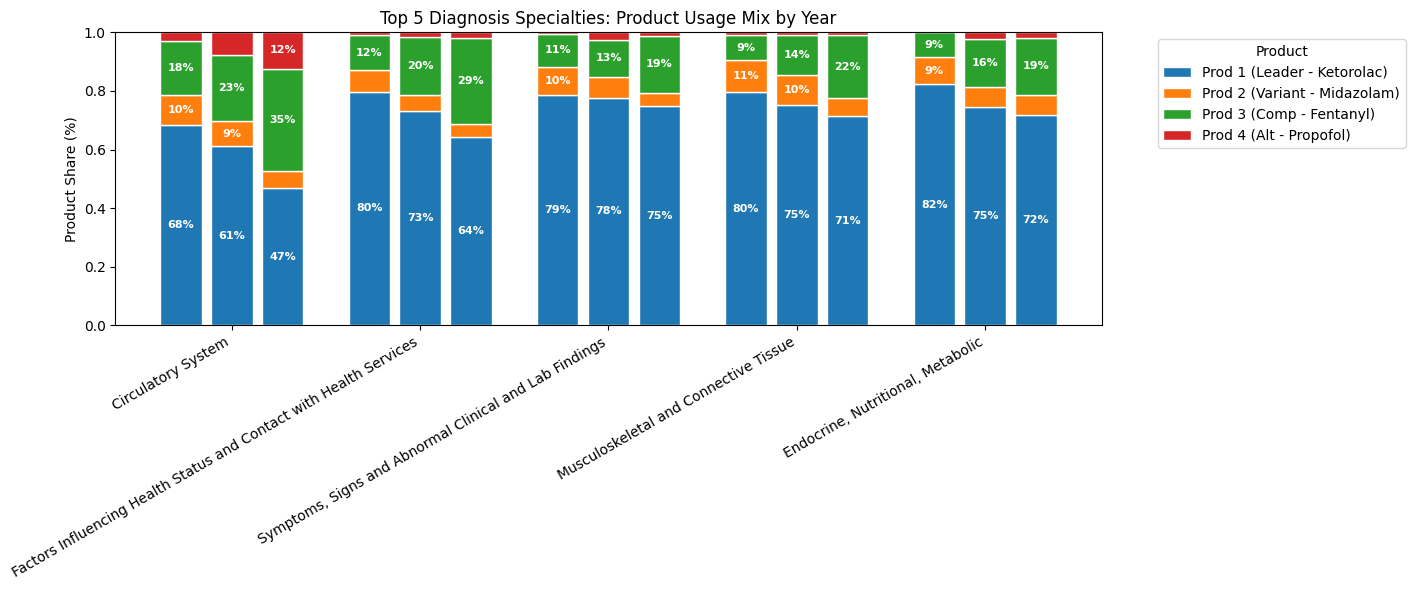

In [223]:
plot_specialty_product_mix_by_year_top5(
    df=market_df,
    products=[
        'Prod 1 (Leader - Ketorolac)',
        'Prod 2 (Variant - Midazolam)',
        'Prod 3 (Comp - Fentanyl)',
        'Prod 4 (Alt - Propofol)'
    ],
    years=[2016, 2017, 2018],
    title='Top 5 Diagnosis Specialties: Product Usage Mix by Year',
    color_map={
        'Prod 1 (Leader - Ketorolac)': '#1f77b4',
        'Prod 2 (Variant - Midazolam)': '#ff7f0e',
        'Prod 3 (Comp - Fentanyl)': '#2ca02c',
        'Prod 4 (Alt - Propofol)': '#d62728'
    }
)


In [224]:
import numpy as np
import matplotlib.pyplot as plt

def plot_specialty_product_mix_by_year_top5_erosion_territories(
    df,
    erosion_territories,
    products,
    years,
    title,
    color_map,
    label_threshold=0.07
):
    # 1. Filter to worst-performing territories
    plot_df = df[
        (df['territory_name'].isin(erosion_territories)) &
        (df['product'].isin(products)) &
        (df['year'].isin(years))
    ]

    # 2. Aggregate claims
    agg = (
        plot_df
        .groupby(['diagnosis_specialty', 'year', 'product'])
        .size()                       # 👈 claim count (no 'claims' column)
        .reset_index(name='claims')
    )

    # 3. Identify TOP 5 specialties by total volume (across years/products)
    top_specialties = (
        agg.groupby('diagnosis_specialty')['claims']
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .index
        .tolist()
    )

    agg = agg[agg['diagnosis_specialty'].isin(top_specialties)]

    # 4. Convert to % share within specialty-year
    agg['share'] = (
        agg['claims'] /
        agg.groupby(['diagnosis_specialty', 'year'])['claims']
        .transform('sum')
    )

    specialties = top_specialties
    x = np.arange(len(specialties))
    width = 0.22
    year_gap = 0.05

    fig, ax = plt.subplots(figsize=(14, 6))

    for i, year in enumerate(years):
        year_df = agg[agg['year'] == year]
        bottom = np.zeros(len(specialties))
        x_pos = x + i * (width + year_gap)

        for product in products:
            values = (
                year_df[year_df['product'] == product]
                .set_index('diagnosis_specialty')
                .reindex(specialties)['share']
                .fillna(0)
                .values
            )

            ax.bar(
                x_pos,
                values,
                width,
                bottom=bottom,
                color=color_map.get(product, '#999999'),
                edgecolor='white',
                linewidth=1,
                label=product if i == 0 else None
            )

            # % labels
            for idx, v in enumerate(values):
                if v >= label_threshold:
                    ax.text(
                        x_pos[idx],
                        bottom[idx] + v / 2,
                        f"{v*100:.0f}%",
                        ha='center',
                        va='center',
                        fontsize=8,
                        color='white',
                        fontweight='bold'
                    )

            bottom += values

    ax.set_xticks(x + (len(years)-1)*(width + year_gap)/2)
    ax.set_xticklabels(specialties, rotation=30, ha='right')

    ax.set_ylim(0, 1)
    ax.set_ylabel('Product Share (%)')
    ax.set_title(title)

    ax.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


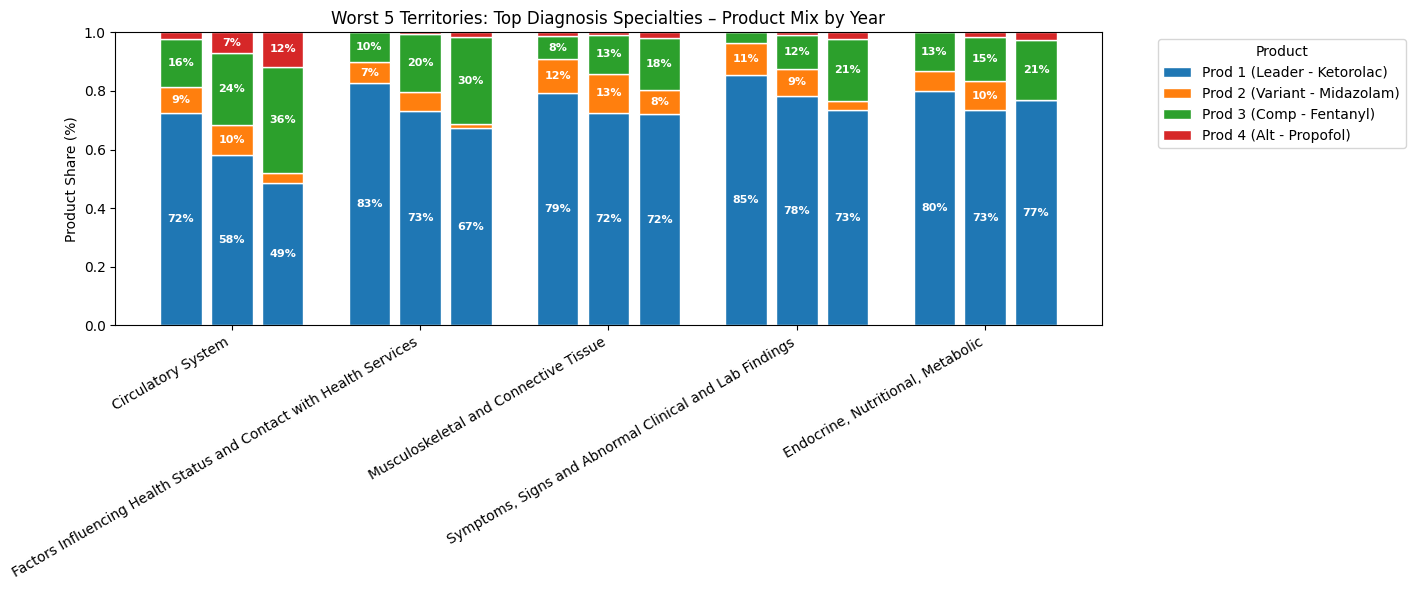

In [225]:
plot_specialty_product_mix_by_year_top5_erosion_territories(
    df=market_df,
    erosion_territories=top5_territories,
    products=[
        'Prod 1 (Leader - Ketorolac)',
        'Prod 2 (Variant - Midazolam)',
        'Prod 3 (Comp - Fentanyl)',
        'Prod 4 (Alt - Propofol)'
    ],
    years=[2016, 2017, 2018],
    title='Worst 5 Territories: Top Diagnosis Specialties – Product Mix by Year',
    color_map={
        'Prod 1 (Leader - Ketorolac)': '#1f77b4',
        'Prod 2 (Variant - Midazolam)': '#ff7f0e',
        'Prod 3 (Comp - Fentanyl)': '#2ca02c',
        'Prod 4 (Alt - Propofol)': '#d62728'
    }
)


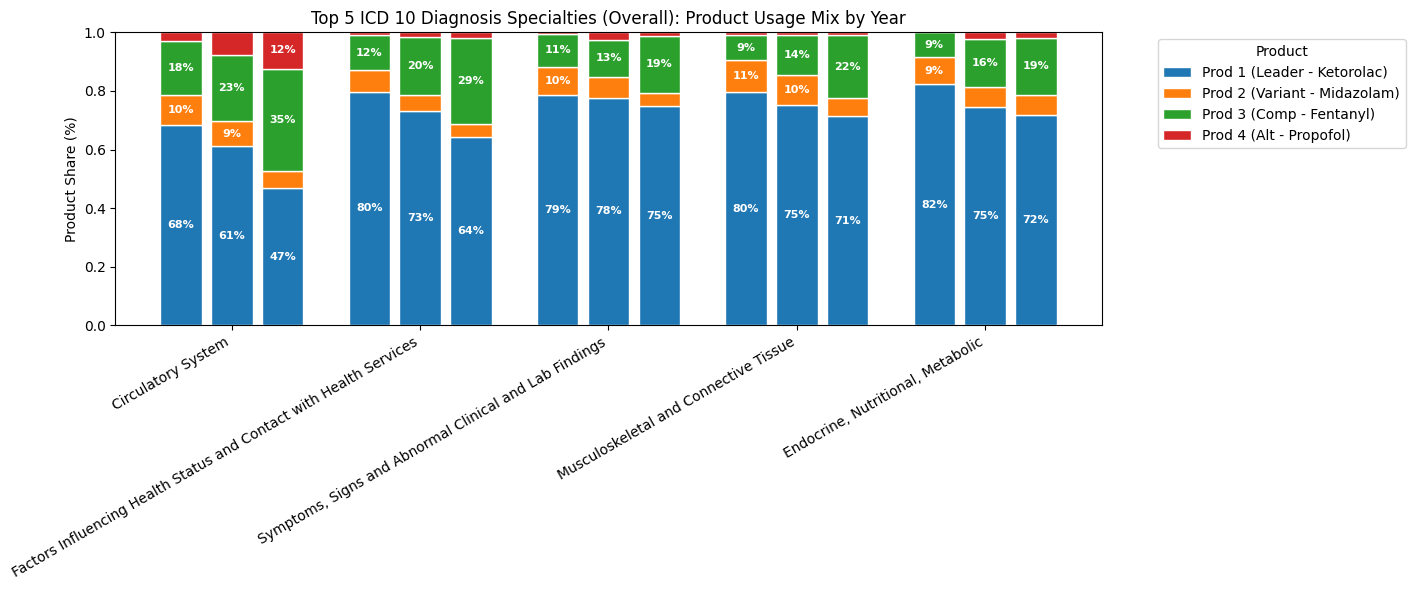

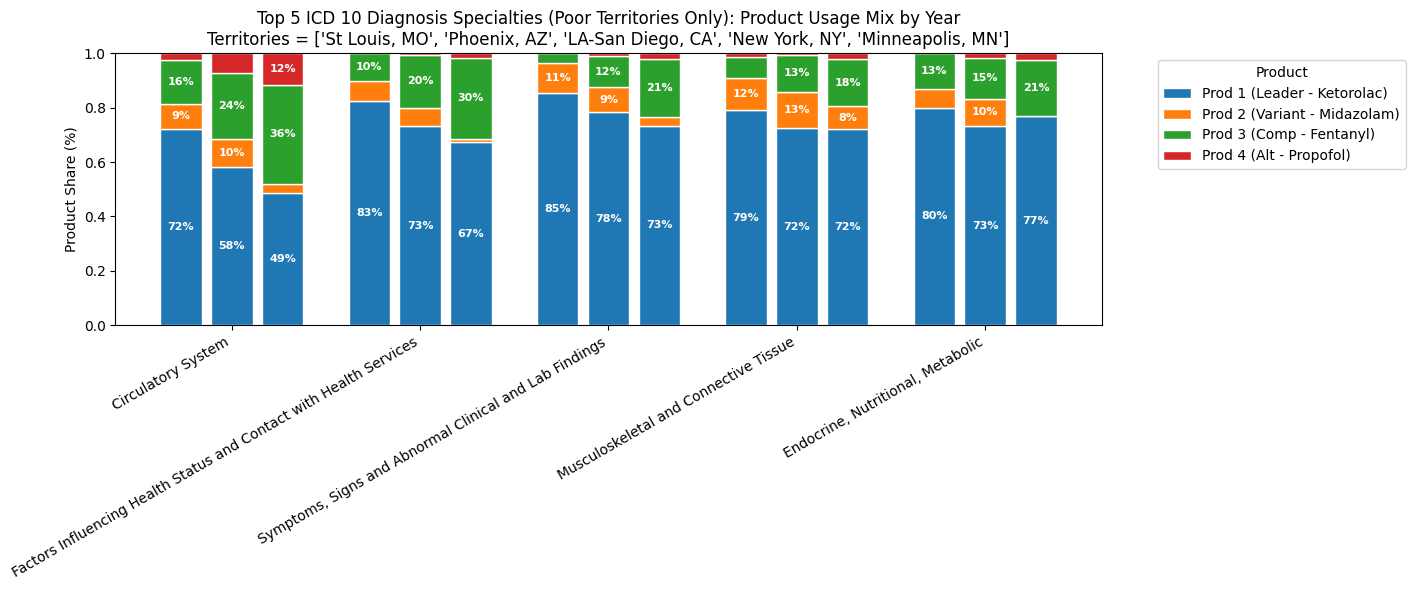

Avg Prod 1 share (overall) by year: {2016: 77.8, 2017: 72.4, 2018: 65.8}
Avg Prod 1 share (poor territories) by year: {2016: 79.9, 2017: 71.1, 2018: 67.7}
Prod 1 drop 2017->2018 (overall): -6.5 pp
Prod 1 drop 2017->2018 (poor territories): -3.4 pp


In [226]:
# ============================================================
# 1) Filter market_df to top-5 poorly performing territories
# ============================================================
poor_terr_df = market_df[market_df["territory_name"].isin(top5_territories)].copy()

# ============================================================
# 2) Run the SAME chart for:
#    A) Overall market (baseline)
#    B) Poor territories only (stress test)
# ============================================================
PRODUCTS = [
    "Prod 1 (Leader - Ketorolac)",
    "Prod 2 (Variant - Midazolam)",
    "Prod 3 (Comp - Fentanyl)",
    "Prod 4 (Alt - Propofol)"
]
YEARS = [2016, 2017, 2018]

COLOR_MAP = {
    "Prod 1 (Leader - Ketorolac)": "#1f77b4",
    "Prod 2 (Variant - Midazolam)": "#ff7f0e",
    "Prod 3 (Comp - Fentanyl)": "#2ca02c",
    "Prod 4 (Alt - Propofol)": "#d62728"
}

# A) Baseline: overall
plot_specialty_product_mix_by_year_top5(
    df=market_df,
    products=PRODUCTS,
    years=YEARS,
    title="Top 5 ICD 10 Diagnosis Specialties (Overall): Product Usage Mix by Year",
    color_map=COLOR_MAP,
    label_threshold=0.08
)

# B) Stress test: only the top-5 poorly performing territories
plot_specialty_product_mix_by_year_top5(
    df=poor_terr_df,
    products=PRODUCTS,
    years=YEARS,
    title=f"Top 5 ICD 10 Diagnosis Specialties (Poor Territories Only): Product Usage Mix by Year\nTerritories = {top5_territories}",
    color_map=COLOR_MAP,
    label_threshold=0.08
)

# ============================================================
# 3) Quick numeric check: is Prod 1 share drop worse in poor territories?
#    (share within specialty-year, averaged across the plotted specialties)
# ============================================================
def avg_prod_share_in_top5_specialties(df, product_name, years):
    # replicate top-5 specialty selection logic (claims = unique claim IDs)
    top5_specs = (
        df[df["year"].isin(years)]
        .groupby("diagnosis_specialty")["cur_clm_uniq_id"].nunique()
        .sort_values(ascending=False).head(5).index.tolist()
    )

    tmp = df[
        df["year"].isin(years) &
        df["diagnosis_specialty"].isin(top5_specs) &
        df["product"].isin(PRODUCTS)
    ].copy()

    agg = (
        tmp.groupby(["diagnosis_specialty", "year", "product"])["cur_clm_uniq_id"]
        .nunique()
        .reset_index(name="claims")
    )

    agg["share"] = agg["claims"] / agg.groupby(["diagnosis_specialty", "year"])["claims"].transform("sum")

    out = (
        agg[agg["product"] == product_name]
        .groupby("year")["share"].mean()
        .reindex(years)
    )
    return out

overall_p1 = avg_prod_share_in_top5_specialties(market_df, "Prod 1 (Leader - Ketorolac)", YEARS)
poor_p1    = avg_prod_share_in_top5_specialties(poor_terr_df, "Prod 1 (Leader - Ketorolac)", YEARS)

print("Avg Prod 1 share (overall) by year:", (overall_p1 * 100).round(1).to_dict())
print("Avg Prod 1 share (poor territories) by year:", (poor_p1 * 100).round(1).to_dict())

print("Prod 1 drop 2017->2018 (overall):",
      round((overall_p1.loc[2018] - overall_p1.loc[2017]) * 100, 1), "pp")
print("Prod 1 drop 2017->2018 (poor territories):",
      round((poor_p1.loc[2018] - poor_p1.loc[2017]) * 100, 1), "pp")


In [227]:
market_df.Specialty.nunique

<bound method IndexOpsMixin.nunique of 0          ANESTHESIOLOGY
1          ANESTHESIOLOGY
2              CARDIOLOGY
3              CARDIOLOGY
4          ANESTHESIOLOGY
               ...       
28363    GASTROENTEROLOGY
28364      ANESTHESIOLOGY
28365          CARDIOLOGY
28366      ANESTHESIOLOGY
28367    GASTROENTEROLOGY
Name: Specialty, Length: 28351, dtype: object>

In [228]:
import numpy as np
import matplotlib.pyplot as plt

def plot_specialty_product_mix_by_year_top5(
    df,
    products,
    years,
    title,
    color_map,
    label_threshold=0.07
):
    # -------------------------------
    # 1. Identify TOP 5 SPECIALTIES
    # -------------------------------
    top5_specialties = (
        df[df['year'].isin(years)]
        .groupby('Specialty')['cur_clm_uniq_id']
        .nunique()
        .sort_values(ascending=False)
        .head(5)
        .index
        .tolist()
    )

    # -------------------------------
    # 2. Filter data
    # -------------------------------
    plot_df = df[
        (df['Specialty'].isin(top5_specialties)) &
        (df['product'].isin(products)) &
        (df['year'].isin(years))
    ]

    if plot_df.empty:
        print("⚠️ No data after filtering. Check inputs.")
        return

    # -------------------------------
    # 3. Aggregate
    # -------------------------------
    agg = (
        plot_df
        .groupby(['Specialty', 'year', 'product'])['cur_clm_uniq_id']
        .nunique()
        .reset_index(name='claims')
    )

    # Convert to % share within Specialty-Year
    agg['share'] = (
        agg['claims'] /
        agg.groupby(['Specialty', 'year'])['claims'].transform('sum')
    )

    specialties = top5_specialties
    x = np.arange(len(specialties))
    width = 0.22
    year_gap = 0.05

    fig, ax = plt.subplots(figsize=(15, 6))

    # -------------------------------
    # 4. Plot
    # -------------------------------
    for i, year in enumerate(years):
        year_df = agg[agg['year'] == year]
        bottom = np.zeros(len(specialties))
        x_pos = x + i * (width + year_gap)

        for product in products:
            values = (
                year_df[year_df['product'] == product]
                .set_index('Specialty')
                .reindex(specialties)['share']
                .fillna(0)
                .values
            )

            bars = ax.bar(
                x_pos,
                values,
                width,
                bottom=bottom,
                color=color_map.get(product, '#999999'),
                edgecolor='white',
                label=product if i == 0 else None
            )

            # Labels
            for idx, v in enumerate(values):
                if v >= label_threshold:
                    ax.text(
                        x_pos[idx],
                        bottom[idx] + v / 2,
                        f"{v*100:.0f}%",
                        ha='center',
                        va='center',
                        fontsize=8,
                        color='white',
                        fontweight='bold'
                    )

            bottom += values

    # -------------------------------
    # 5. Formatting
    # -------------------------------
    ax.set_xticks(x + (len(years)-1)*(width + year_gap)/2)
    ax.set_xticklabels(specialties, rotation=30, ha='right')
    ax.set_ylim(0, 1)
    ax.set_ylabel('Share of Claims (%)')
    ax.set_title(title)

    ax.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


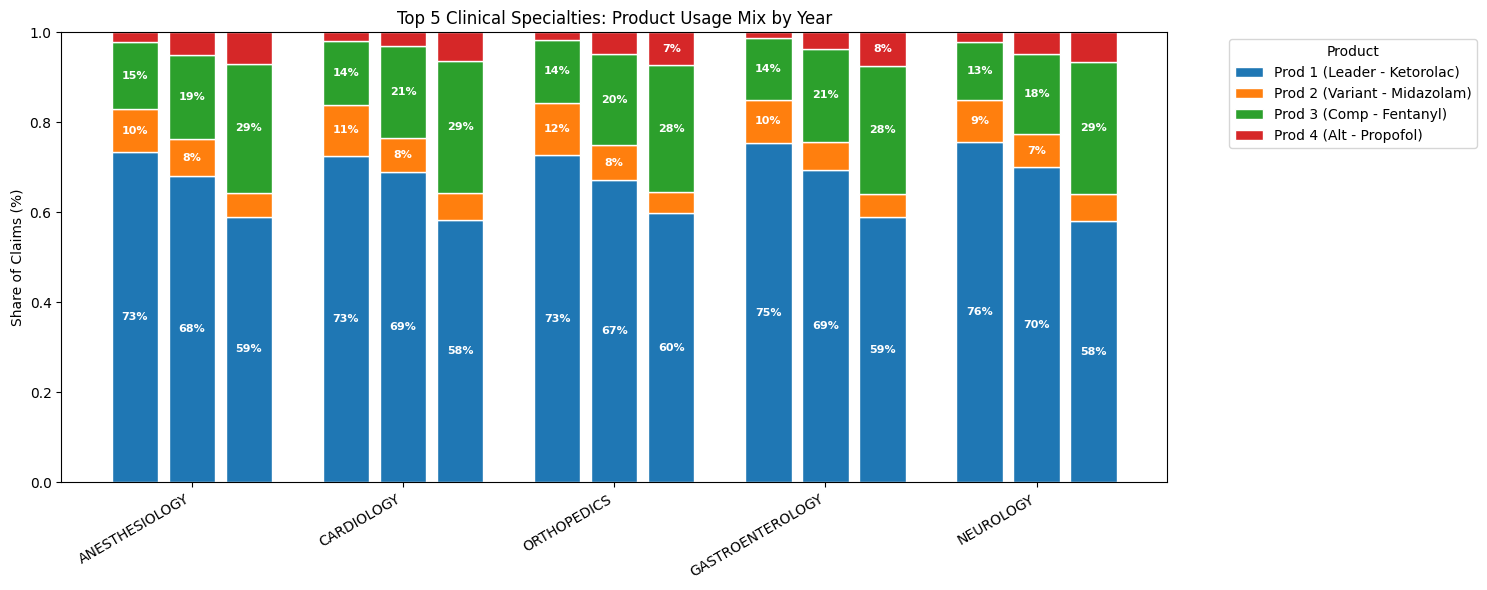

In [229]:
plot_specialty_product_mix_by_year_top5(
    df=market_df,
    products=[
        'Prod 1 (Leader - Ketorolac)',
        'Prod 2 (Variant - Midazolam)',
        'Prod 3 (Comp - Fentanyl)',
        'Prod 4 (Alt - Propofol)'
    ],
    years=[2016, 2017, 2018],
    title='Top 5 Clinical Specialties: Product Usage Mix by Year',
    color_map={
        'Prod 1 (Leader - Ketorolac)': '#1f77b4',
        'Prod 2 (Variant - Midazolam)': '#ff7f0e',
        'Prod 3 (Comp - Fentanyl)': '#2ca02c',
        'Prod 4 (Alt - Propofol)': '#d62728'
    }
)


In [230]:
market_df[['Specialty', 'product', 'year']].dropna().head()


,Specialty,product,year
0,ANESTHESIOLOGY,Prod 3 (Comp - Fentanyl),2018
1,ANESTHESIOLOGY,Prod 1 (Leader - Ketorolac),2016
3,CARDIOLOGY,Prod 3 (Comp - Fentanyl),2016
5,ORTHOPEDICS,Prod 1 (Leader - Ketorolac),2018
7,ANESTHESIOLOGY,Prod 1 (Leader - Ketorolac),2018


In [231]:
import numpy as np
import matplotlib.pyplot as plt

def plot_specialty_product_mix_by_year_top5_poor_territories(
    df,
    top5_territories,
    products,
    years,
    title,
    color_map,
    label_threshold=0.08
):
    # Filter to poor-performing territories only
    df_sub = df[
        (df['territory_name'].isin(top5_territories)) &
        (df['product'].isin(products)) &
        (df['year'].isin(years))
    ]

    # Identify top 5 specialties within these territories
    top5_specialties = (
        df_sub
        .groupby('Specialty')
        .size()
        .sort_values(ascending=False)
        .head(5)
        .index
        .tolist()
    )

    df_sub = df_sub[df_sub['Specialty'].isin(top5_specialties)]

    # Aggregate counts
    agg = (
        df_sub
        .groupby(['Specialty', 'year', 'product'])
        .size()
        .reset_index(name='count')
    )

    # Convert to share within specialty-year
    agg['share'] = (
        agg['count'] /
        agg.groupby(['Specialty', 'year'])['count'].transform('sum')
    )

    specialties = top5_specialties
    x = np.arange(len(specialties))
    width = 0.22
    year_gap = 0.05

    fig, ax = plt.subplots(figsize=(14, 6))

    for i, year in enumerate(years):
        year_df = agg[agg['year'] == year]
        bottom = np.zeros(len(specialties))
        x_pos = x + i * (width + year_gap)

        for product in products:
            values = (
                year_df[year_df['product'] == product]
                .set_index('Specialty')
                .reindex(specialties)['share']
                .fillna(0)
                .values
            )

            ax.bar(
                x_pos,
                values,
                width,
                bottom=bottom,
                color=color_map.get(product, '#999999'),
                edgecolor='white',
                linewidth=1.0,
                label=product if i == 0 else None
            )

            for idx, v in enumerate(values):
                if v >= label_threshold:
                    ax.text(
                        x_pos[idx],
                        bottom[idx] + v / 2,
                        f"{v*100:.0f}%",
                        ha='center',
                        va='center',
                        fontsize=8,
                        color='white',
                        fontweight='bold'
                    )

            bottom += values

    ax.set_xticks(x + (len(years)-1)*(width + year_gap)/2)
    ax.set_xticklabels(specialties, rotation=30, ha='right')
    ax.set_ylim(0, 1)
    ax.set_ylabel('Product Share (%)')
    ax.set_title(title)

    ax.legend(
        title='Product',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

    plt.tight_layout()
    plt.show()


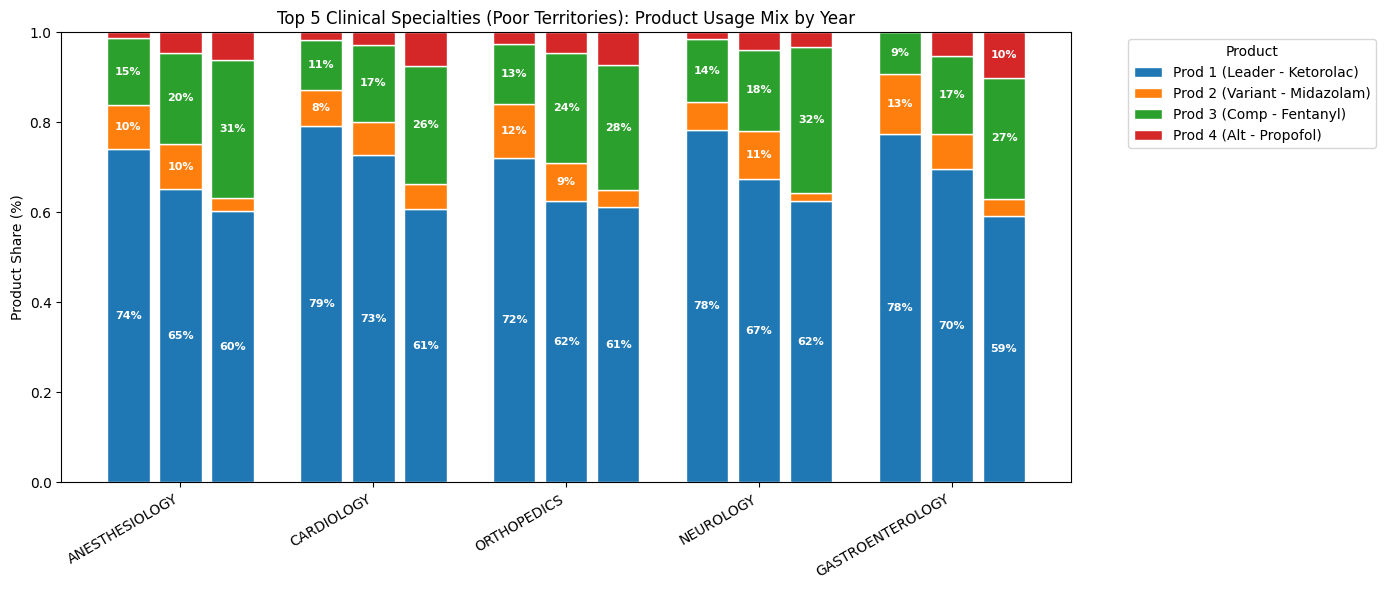

In [232]:
plot_specialty_product_mix_by_year_top5_poor_territories(
    df=market_df,
    top5_territories=top5_territories,
    products=[
        'Prod 1 (Leader - Ketorolac)',
        'Prod 2 (Variant - Midazolam)',
        'Prod 3 (Comp - Fentanyl)',
        'Prod 4 (Alt - Propofol)'
    ],
    years=[2016, 2017, 2018],
    title='Top 5 Clinical Specialties (Poor Territories): Product Usage Mix by Year',
    color_map={
        'Prod 1 (Leader - Ketorolac)': '#1f77b4',
        'Prod 2 (Variant - Midazolam)': '#ff7f0e',
        'Prod 3 (Comp - Fentanyl)': '#2ca02c',
        'Prod 4 (Alt - Propofol)': '#d62728'
    }
)


In [233]:
market_df.columns

Index(['cur_clm_uniq_id', 'bene_mbi_id', 'fac_prvdr_npi_num', 'clm_from_dt',
       'clm_thru_dt', 'prncpl_dgns_cd', 'clm_pmt_amt',
       'clm_mdcr_instnl_tot_chrg_amt', 'clm_line_num', 'clm_line_hcpcs_cd',
       'clm_line_cvrd_pd_amt', 'clm_val_sqnc_num_dgns', 'clm_dgns_cd',
       'clm_val_sqnc_num_prcdr', 'clm_prcdr_cd', 'clm_line_alowd_chrg_amt',
       'clm_prvdr_spclty_cd', 'claim_date', 'year_month', 'product',
       'dx_initial', 'diagnosis_specialty', 'NPI', 'State', 'zip_code',
       'Specialty', 'patient_id', 'age', 'gender', 'age_group',
       'territory_name', 'region_name', 'year', 'territory_group'],
      dtype='object')

In [234]:
market_df['patient_id'].nunique()


4043

In [235]:
market_df['NPI'].nunique()


499

In [236]:
market_df['fac_prvdr_npi_num'].nunique()


499

In [237]:
market_df['zip_code'].nunique()


496

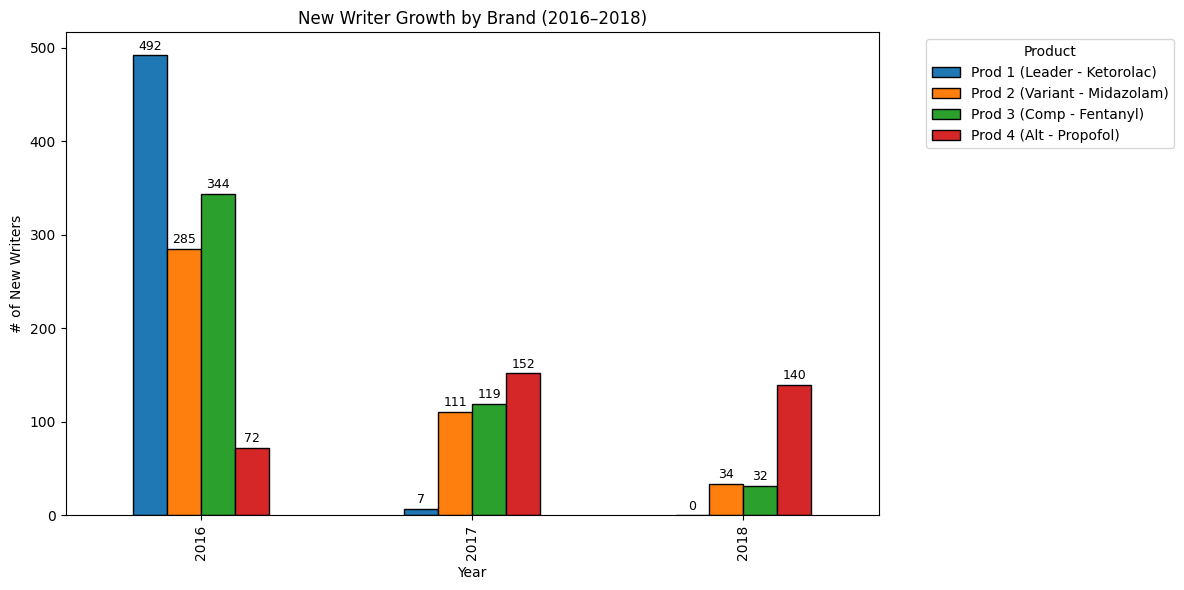

In [239]:
import matplotlib.pyplot as plt

new_writer_pivot = (
    writer_trends
    .pivot(index='year', columns='product', values='new_writers')
    .fillna(0)
)

ax = new_writer_pivot.plot(
    kind='bar',
    figsize=(12, 6),
    edgecolor='black'
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(
        container,
        label_type='edge',
        fontsize=9,
        fmt='%d',
        padding=2
    )

plt.xlabel('Year')
plt.ylabel('# of New Writers')
plt.title('New Writer Growth by Brand (2016–2018)')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [244]:
import pandas as pd
import matplotlib.pyplot as plt

P2 = 'Prod 2 (Variant - Midazolam)'
P3 = 'Prod 3 (Comp - Fentanyl)'
YEARS = [2016, 2017, 2018]


In [245]:
first_rx = (
    market_df
    .groupby(['fac_prvdr_npi_num', 'product'])['year']
    .min()
    .reset_index(name='first_year')
)


In [246]:
total_writers = (
    market_df
    .groupby(['product', 'year'])['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='total_writers')
)


In [247]:
new_writers = (
    first_rx
    .groupby(['product', 'first_year'])['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='new_writers')
    .rename(columns={'first_year': 'year'})
)


In [248]:
writer_trends = (
    total_writers
    .merge(new_writers, on=['product', 'year'], how='left')
    .fillna(0)
)

writer_trends['continuing_writers'] = (
    writer_trends['total_writers'] - writer_trends['new_writers']
)

writer_trends['new_writer_pct'] = (
    writer_trends['new_writers'] / writer_trends['total_writers']
)


In [249]:
writer_trends = writer_trends[
    (writer_trends['product'].isin([P2, P3])) &
    (writer_trends['year'].isin(YEARS))
]


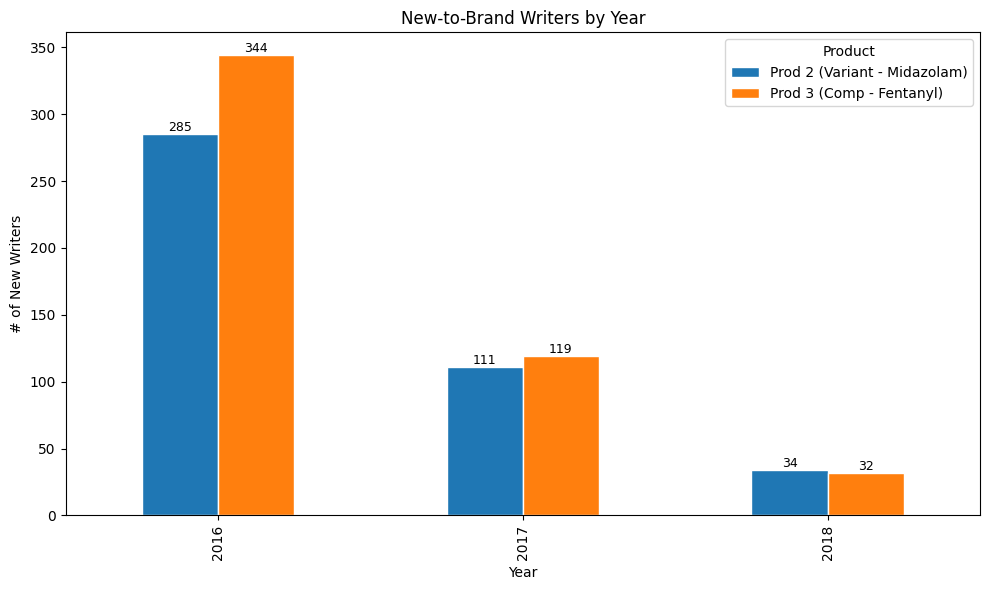

In [250]:
pivot_new = writer_trends.pivot(
    index='year',
    columns='product',
    values='new_writers'
)

ax = pivot_new.plot(
    kind='bar',
    figsize=(10, 6),
    edgecolor='white'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9)

plt.title('New-to-Brand Writers by Year')
plt.ylabel('# of New Writers')
plt.xlabel('Year')
plt.legend(title='Product')
plt.tight_layout()
plt.show()


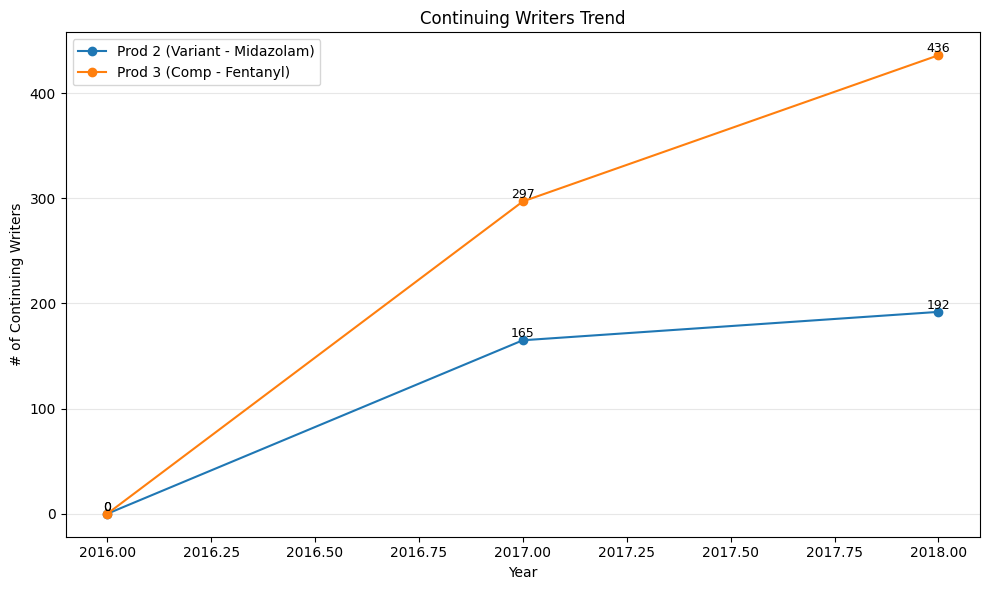

In [251]:
plt.figure(figsize=(10, 6))

for product in [P2, P3]:
    subset = writer_trends[writer_trends['product'] == product]
    plt.plot(
        subset['year'],
        subset['continuing_writers'],
        marker='o',
        label=product
    )

for _, row in writer_trends.iterrows():
    plt.text(
        row['year'],
        row['continuing_writers'],
        f"{int(row['continuing_writers'])}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Continuing Writers Trend')
plt.ylabel('# of Continuing Writers')
plt.xlabel('Year')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


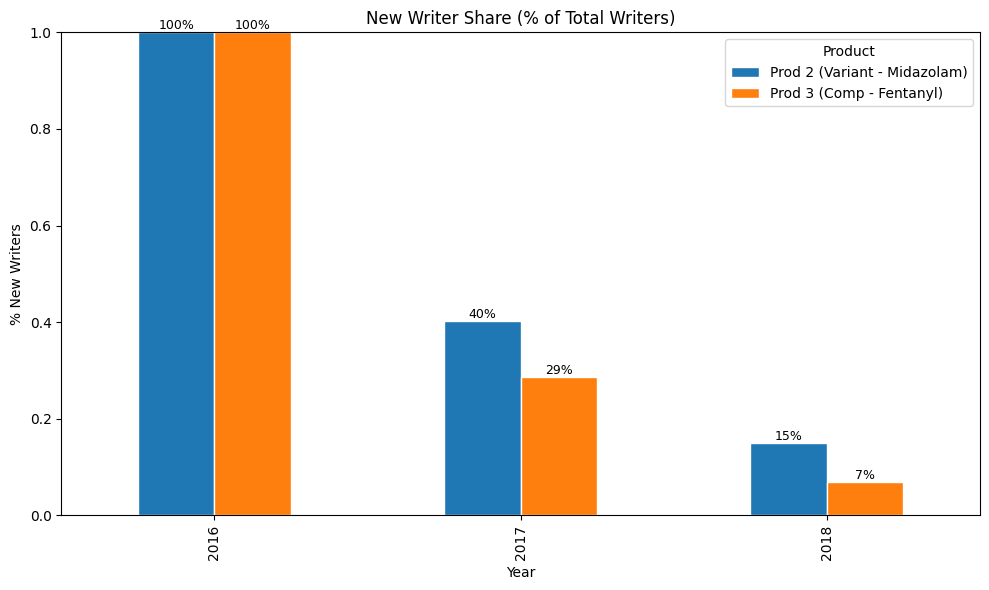

In [252]:
pivot_pct = writer_trends.pivot(
    index='year',
    columns='product',
    values='new_writer_pct'
)

ax = pivot_pct.plot(
    kind='bar',
    stacked=False,
    figsize=(10, 6),
    edgecolor='white'
)

for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{v*100:.0f}%" for v in container.datavalues],
        fontsize=9
    )

plt.title('New Writer Share (% of Total Writers)')
plt.ylabel('% New Writers')
plt.xlabel('Year')
plt.ylim(0, 1)
plt.legend(title='Product')
plt.tight_layout()
plt.show()


In [253]:
writer_trends[['product', 'year', 'new_writers', 'total_writers', 'new_writer_pct']]


,product,year,new_writers,total_writers,new_writer_pct
3,Prod 2 (Variant - Midazolam),2016,285.0,285,1.000000
4,Prod 2 (Variant - Midazolam),2017,111.0,276,0.402174
5,Prod 2 (Variant - Midazolam),2018,34.0,226,0.150442
6,Prod 3 (Comp - Fentanyl),2016,344.0,344,1.000000
7,Prod 3 (Comp - Fentanyl),2017,119.0,416,0.286058
8,Prod 3 (Comp - Fentanyl),2018,32.0,468,0.068376


In [254]:
P2 = 'Prod 2 (Variant - Midazolam)'
YEAR = 2018


In [255]:
p2_claim_counts = (
    market_df[market_df['product'] == P2]
    .groupby('fac_prvdr_npi_num')['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='p2_claims')
)


In [256]:
salvageable_writers = p2_claim_counts[
    p2_claim_counts['p2_claims'].isin([1, 2])
]


In [257]:
salvageable_writers = salvageable_writers.merge(
    market_df[
        (market_df['year'] == YEAR) &
        (market_df['product'] == P2)
    ][['fac_prvdr_npi_num', 'territory_name', 'Specialty']]
    .drop_duplicates(),
    on='fac_prvdr_npi_num',
    how='left'
)


In [258]:
total_p2_writers = (
    market_df[
        (market_df['product'] == P2) &
        (market_df['year'] == YEAR)
    ]['fac_prvdr_npi_num']
    .nunique()
)

salvageable_count = salvageable_writers['fac_prvdr_npi_num'].nunique()
salvageable_pct = salvageable_count / total_p2_writers

salvageable_count, salvageable_pct


(221, 0.9778761061946902)

In [259]:
def territory_group(t):
    if t in top5_territories:
        return 'Top-5 Declining'
    elif t in bottom5_territories:
        return 'Bottom-5 Growing'
    else:
        return 'Other'

salvageable_writers['territory_group'] = (
    salvageable_writers['territory_name'].apply(territory_group)
)

salvageable_by_group = (
    salvageable_writers
    .groupby('territory_group')['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='salvageable_writers')
)

salvageable_by_group


,territory_group,salvageable_writers
0,Bottom-5 Growing,10
1,Other,197
2,Top-5 Declining,14


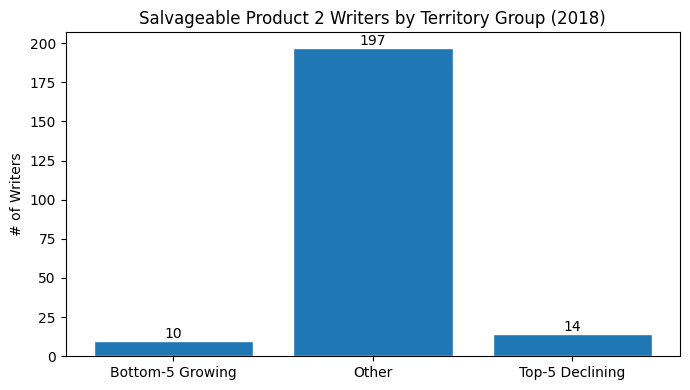

In [260]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.bar(
    salvageable_by_group['territory_group'],
    salvageable_by_group['salvageable_writers'],
    edgecolor='white'
)

for i, v in enumerate(salvageable_by_group['salvageable_writers']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Salvageable Product 2 Writers by Territory Group (2018)')
plt.ylabel('# of Writers')
plt.tight_layout()
plt.show()


In [261]:
salvageable_specialty = (
    salvageable_writers
    .groupby('Specialty')['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='writers')
    .sort_values('writers', ascending=False)
)

salvageable_specialty.head(10)


,Specialty,writers
0,ANESTHESIOLOGY,29
3,NEUROLOGY,16
4,ORTHOPEDICS,13
1,CARDIOLOGY,10
2,GASTROENTEROLOGY,10


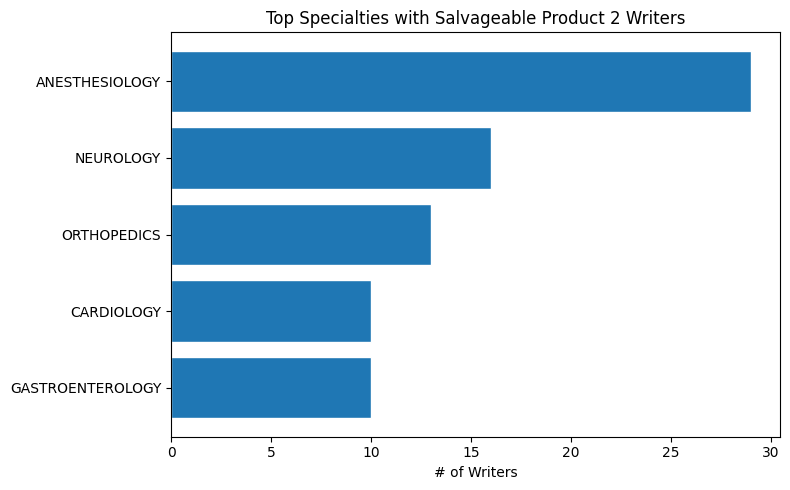

In [262]:
plt.figure(figsize=(8, 5))
plt.barh(
    salvageable_specialty.head(8)['Specialty'],
    salvageable_specialty.head(8)['writers'],
    edgecolor='white'
)

plt.gca().invert_yaxis()
plt.title('Top Specialties with Salvageable Product 2 Writers')
plt.xlabel('# of Writers')
plt.tight_layout()
plt.show()


In [263]:
p2_claim_dist = (
    market_df[market_df['product'] == P2]
    .groupby(['year', 'fac_prvdr_npi_num'])['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='p2_claims')
)

def bucketize(x):
    if x == 1:
        return '1 claim (One-and-done)'
    elif x == 2:
        return '2 claims (Partial adoption)'
    else:
        return '3+ claims (Adopted)'

p2_claim_dist['bucket'] = p2_claim_dist['p2_claims'].apply(bucketize)


In [264]:
dist_table = (
    p2_claim_dist[p2_claim_dist['year'].isin([2017, 2018])]
    .groupby(['year', 'bucket'])['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='writers')
)

dist_table['pct'] = (
    dist_table['writers'] /
    dist_table.groupby('year')['writers'].transform('sum') * 100
)

dist_table


,year,bucket,writers,pct
0,2017,1 claim (One-and-done),172,62.318841
1,2017,2 claims (Partial adoption),74,26.811594
2,2017,3+ claims (Adopted),30,10.869565
3,2018,1 claim (One-and-done),160,70.796460
4,2018,2 claims (Partial adoption),57,25.221239
5,2018,3+ claims (Adopted),9,3.982301


In [272]:
YEAR = 2018
P2 = 'Prod 2 (Variant - Midazolam)'

# Count Product 2 claims per HCP in 2018
p2_claims_per_hcp = (
    market_df[
        (market_df['product'] == P2) &
        (market_df['year'] == YEAR)
    ]
    .groupby('fac_prvdr_npi_num')['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='p2_claims')
)

# Assign conversion bucket
def assign_bucket(n):
    if n == 1:
        return '1 Rx → One-and-done'
    elif n == 2:
        return '2 Rx → Salvageable'
    else:
        return '≥3 Rx → Adopted'

p2_claims_per_hcp['bucket'] = p2_claims_per_hcp['p2_claims'].apply(assign_bucket)

# Aggregate for plotting
salvageable_summary = (
    p2_claims_per_hcp
    .groupby('bucket')
    .size()
    .reset_index(name='hcp_count')
)

salvageable_summary


,bucket,hcp_count
0,1 Rx → One-and-done,160
1,2 Rx → Salvageable,57
2,≥3 Rx → Adopted,9


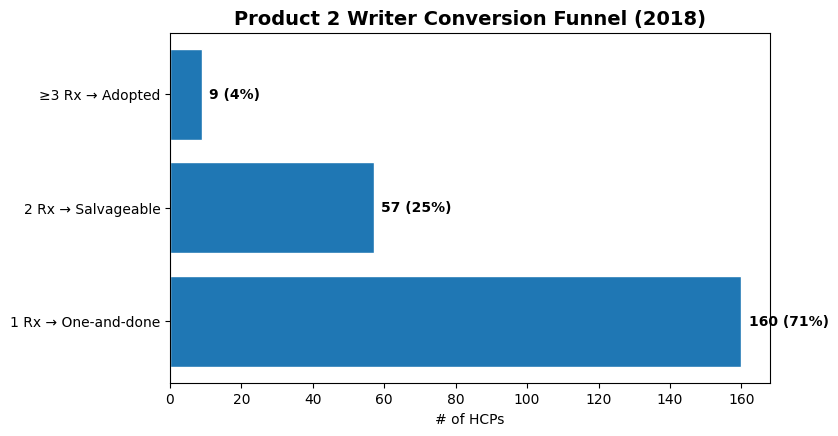

In [273]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.barh(
    salvageable_summary['bucket'],
    salvageable_summary['hcp_count'],
    edgecolor='white'
)

total = salvageable_summary['hcp_count'].sum()

for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 2,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width)} ({width/total:.0%})",
        va='center',
        fontsize=10,
        fontweight='bold'
    )

ax.set_title(
    'Product 2 Writer Conversion Funnel (2018)',
    fontsize=14,
    fontweight='bold'
)

ax.set_xlabel('# of HCPs')
ax.set_ylabel('')

plt.subplots_adjust(left=0.35, right=0.95, top=0.85, bottom=0.15)
plt.show()


In [274]:
# ----------------------------
# Filter to Top-5 Declining Territories (2018 only)
# ----------------------------
top5_df = market_df[
    (market_df['territory_name'].isin(top5_territories)) &
    (market_df['year'] == YEAR)
].copy()

# ----------------------------
# Total Product 2 writers per territory
# ----------------------------
p2_writers = (
    top5_df[top5_df['product'] == P2]
    .groupby('territory_name')['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='p2_writers')
)

# ----------------------------
# New Product 2 writers (%)
# ----------------------------
first_rx = (
    market_df[market_df['product'] == P2]
    .groupby('fac_prvdr_npi_num')['year']
    .min()
    .reset_index(name='first_year')
)

new_p2 = first_rx[first_rx['first_year'] == YEAR]

new_p2 = new_p2.merge(
    top5_df[['fac_prvdr_npi_num', 'territory_name']].drop_duplicates(),
    on='fac_prvdr_npi_num',
    how='inner'
)

new_writer_pct = (
    new_p2
    .groupby('territory_name')['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='new_p2_writers')
)

# ----------------------------
# Salvageable writers (%)
# Definition: exactly 2 Product 2 claims in 2018
# ----------------------------
p2_claims_per_hcp = (
    top5_df[top5_df['product'] == P2]
    .groupby('fac_prvdr_npi_num')['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='p2_claims')
)

salvageable = p2_claims_per_hcp[p2_claims_per_hcp['p2_claims'] == 2]

salvageable = salvageable.merge(
    top5_df[['fac_prvdr_npi_num', 'territory_name']].drop_duplicates(),
    on='fac_prvdr_npi_num',
    how='inner'
)

salvageable_pct = (
    salvageable
    .groupby('territory_name')['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='salvageable_writers')
)

# ----------------------------
# Avg claims per writer (commercial attractiveness)
# ----------------------------
claims_per_writer = (
    top5_df
    .groupby('territory_name')
    .agg(
        total_claims=('cur_clm_uniq_id', 'nunique'),
        writers=('fac_prvdr_npi_num', 'nunique')
    )
    .reset_index()
)

claims_per_writer['avg_claims_per_writer'] = (
    claims_per_writer['total_claims'] /
    claims_per_writer['writers']
)

# ----------------------------
# Dominant HCP Specialty (Product 2 only)
# ----------------------------
dominant_specialty = (
    top5_df[top5_df['product'] == P2]
    .groupby(['territory_name', 'Specialty'])['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='writers')
    .sort_values(['territory_name', 'writers'], ascending=[True, False])
    .drop_duplicates('territory_name')
)

# ----------------------------
# FINAL ARCHETYPE TABLE
# ----------------------------
archetype_table = (
    p2_writers
    .merge(new_writer_pct, on='territory_name', how='left')
    .merge(salvageable_pct, on='territory_name', how='left')
    .merge(
        claims_per_writer[['territory_name', 'avg_claims_per_writer']],
        on='territory_name',
        how='left'
    )
    .merge(
        dominant_specialty[['territory_name', 'Specialty']],
        on='territory_name',
        how='left'
    )
)

# Calculate percentages
archetype_table['% New Writers'] = (
    archetype_table['new_p2_writers'] /
    archetype_table['p2_writers']
)

archetype_table['% Salvageable Writers'] = (
    archetype_table['salvageable_writers'] /
    archetype_table['p2_writers']
)

# Final formatting for PPT
archetype_table = archetype_table[[
    'territory_name',
    '% New Writers',
    '% Salvageable Writers',
    'avg_claims_per_writer',
    'Specialty'
]].sort_values('% Salvageable Writers', ascending=False)

archetype_table


,territory_name,% New Writers,% Salvageable Writers,avg_claims_per_writer,Specialty
2,"New York, NY",0.083333,0.250000,20.410256,CARDIOLOGY
0,"LA-San Diego, CA",0.153846,0.230769,19.864865,ANESTHESIOLOGY
4,"St Louis, MO",NaN,0.200000,18.166667,ANESTHESIOLOGY
1,"Minneapolis, MN",0.333333,0.166667,18.571429,ANESTHESIOLOGY
3,"Phoenix, AZ",NaN,NaN,17.750000,CARDIOLOGY


In [275]:
YEAR = 2018
P2 = 'Prod 2 (Variant - Midazolam)'

# Product 2 claims per HCP in 2018
p2_claims_hcp = (
    market_df[
        (market_df['product'] == P2) &
        (market_df['year'] == YEAR)
    ]
    .groupby(['territory_name', 'fac_prvdr_npi_num'])['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='p2_claims')
)

# Salvageable = exactly 2 claims
salvageable_hcps = p2_claims_hcp[p2_claims_hcp['p2_claims'] == 2]


In [277]:
territory_summary = (
    p2_claims_hcp
    .groupby('territory_name')
    .agg(
        total_p2_writers=('fac_prvdr_npi_num', 'nunique'),
        avg_claims_per_writer=('p2_claims', 'mean')
    )
    .reset_index()
)

salvageable_counts = (
    salvageable_hcps
    .groupby('territory_name')['fac_prvdr_npi_num']
    .nunique()
    .reset_index(name='salvageable_writers')
)

territory_salvage = territory_summary.merge(
    salvageable_counts,
    on='territory_name',
    how='left'
).fillna(0)

territory_salvage['% Salvageable Writers'] = (
    territory_salvage['salvageable_writers'] /
    territory_salvage['total_p2_writers']
)

territory_salvage


,territory_name,total_p2_writers,avg_claims_per_writer,salvageable_writers,% Salvageable Writers
0,"Albany, NY",12,1.583333,7.0,0.583333
1,"Atlanta, GA",11,1.545455,2.0,0.181818
2,"Birmingham, AL",3,1.666667,2.0,0.666667
3,"Boston, MA",19,1.315789,3.0,0.157895
4,"Charlotte, NC",4,1.500000,2.0,0.500000
5,"Chicago, IL",7,1.428571,3.0,0.428571
6,"Cincinnati, OH",8,1.250000,2.0,0.250000
7,"Dallas, TX",11,1.181818,2.0,0.181818
8,"Denver, CO",9,1.333333,3.0,0.333333
9,"Detroit, MI",5,1.200000,1.0,0.200000


In [278]:
top_salvageable_territories = (
    territory_salvage
    .query("total_p2_writers >= 10")      # avoid noise
    .sort_values('% Salvageable Writers', ascending=False)
    .head(5)['territory_name']
    .tolist()
)

top_salvageable_territories


['Albany, NY',
 'San Jose, CA',
 'Houston, TX',
 'New York, NY',
 'LA-San Diego, CA']

In [280]:
display_df = territory_salvage.copy()

# Convert % to readable percentage
display_df['% Salvageable Writers'] = (
    display_df['% Salvageable Writers'] * 100
)

# Round for readability
display_df['avg_claims_per_writer'] = display_df['avg_claims_per_writer'].round(1)
display_df['% Salvageable Writers'] = display_df['% Salvageable Writers'].round(1)

# Rename columns for executive clarity
display_df = display_df.rename(columns={
    'territory_name': 'Territory',
    'total_p2_writers': 'Total P2 Writers',
    'salvageable_writers': 'Salvageable Writers',
    'avg_claims_per_writer': 'Avg Claims / Writer'
})

display_df.sort_values('% Salvageable Writers', ascending=False)


,Territory,Total P2 Writers,Avg Claims / Writer,Salvageable Writers,% Salvageable Writers
2,"Birmingham, AL",3,1.7,2.0,66.7
0,"Albany, NY",12,1.6,7.0,58.3
4,"Charlotte, NC",4,1.5,2.0,50.0
5,"Chicago, IL",7,1.4,3.0,42.9
18,"San Jose, CA",14,1.6,5.0,35.7
10,"Houston, TX",12,1.3,4.0,33.3
8,"Denver, CO",9,1.3,3.0,33.3
6,"Cincinnati, OH",8,1.2,2.0,25.0
13,"New York, NY",12,1.4,3.0,25.0
11,"LA-San Diego, CA",13,1.2,3.0,23.1


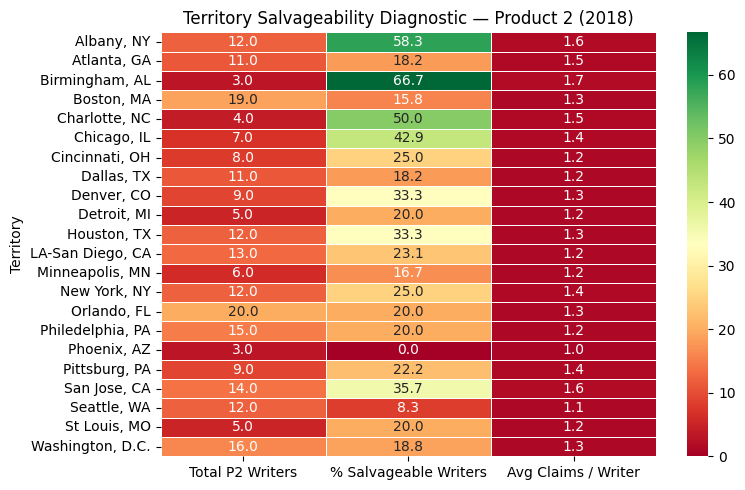

In [281]:
import seaborn as sns

heatmap_df = (
    display_df
    .set_index('Territory')[[
        'Total P2 Writers',
        '% Salvageable Writers',
        'Avg Claims / Writer'
    ]]
)

plt.figure(figsize=(8, 5))
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt='.1f',
    cmap='RdYlGn',
    linewidths=0.5
)

plt.title('Territory Salvageability Diagnostic — Product 2 (2018)')
plt.tight_layout()
plt.show()


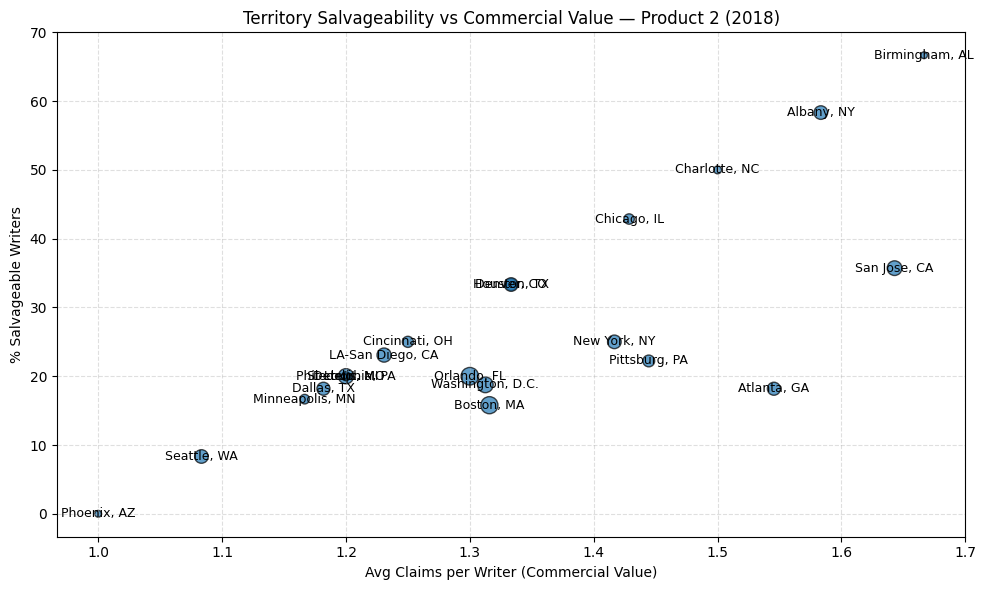

In [282]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(
    territory_salvage['avg_claims_per_writer'],
    territory_salvage['% Salvageable Writers'] * 100,
    s=territory_salvage['total_p2_writers'] * 8,
    alpha=0.7,
    edgecolors='black'
)

for _, row in territory_salvage.iterrows():
    plt.text(
        row['avg_claims_per_writer'],
        row['% Salvageable Writers'] * 100,
        row['territory_name'],
        fontsize=9,
        ha='center',
        va='center'
    )

plt.xlabel('Avg Claims per Writer (Commercial Value)')
plt.ylabel('% Salvageable Writers')
plt.title('Territory Salvageability vs Commercial Value — Product 2 (2018)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [283]:
P2 = 'Prod 2 (Variant - Midazolam)'
YEAR = 2018   # strongly recommended to fix to 2018

p2_specialty = (
    market_df[
        (market_df['product'] == P2) &
        (market_df['year'] == YEAR)
    ]
    .groupby('Specialty')['cur_clm_uniq_id']
    .nunique()
    .reset_index(name='claims')
)


In [284]:
top_n = 5

p2_specialty_top = (
    p2_specialty
    .sort_values('claims', ascending=False)
    .head(top_n)
)

# Combine rest into "Others"
others = pd.DataFrame({
    'Specialty': ['Others'],
    'claims': [p2_specialty['claims'].sum() - p2_specialty_top['claims'].sum()]
})

p2_specialty_final = pd.concat([p2_specialty_top, others], ignore_index=True)


In [285]:
p2_specialty_final['pct'] = (
    p2_specialty_final['claims'] /
    p2_specialty_final['claims'].sum()
) * 100


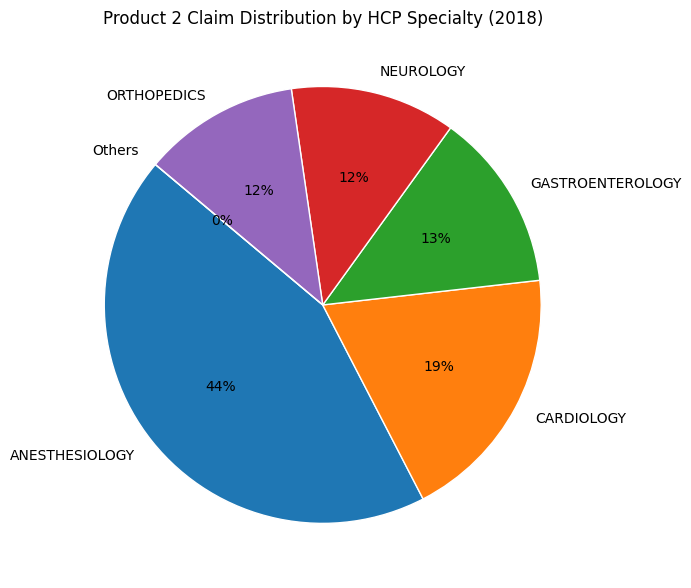

In [286]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))

plt.pie(
    p2_specialty_final['pct'],
    labels=p2_specialty_final['Specialty'],
    autopct='%1.0f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Product 2 Claim Distribution by HCP Specialty (2018)')
plt.tight_layout()
plt.show()


In [287]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_product_specialty_pie(
    df,
    product,
    year,
    top_n=5,
    title_suffix=''
):
    data = (
        df[
            (df['product'] == product) &
            (df['year'] == year)
        ]
        .groupby('Specialty')['cur_clm_uniq_id']
        .nunique()
        .reset_index(name='claims')
    )

    # Top specialties
    top = data.sort_values('claims', ascending=False).head(top_n)

    # Others
    others = pd.DataFrame({
        'Specialty': ['Others'],
        'claims': [data['claims'].sum() - top['claims'].sum()]
    })

    plot_df = pd.concat([top, others], ignore_index=True)
    plot_df['pct'] = plot_df['claims'] / plot_df['claims'].sum() * 100

    plt.figure(figsize=(7, 7))
    plt.pie(
        plot_df['pct'],
        labels=plot_df['Specialty'],
        autopct='%1.0f%%',
        startangle=140,
        wedgeprops={'edgecolor': 'white'}
    )

    plt.title(f"{product} — Claim Distribution by Specialty ({year}) {title_suffix}")
    plt.tight_layout()
    plt.show()


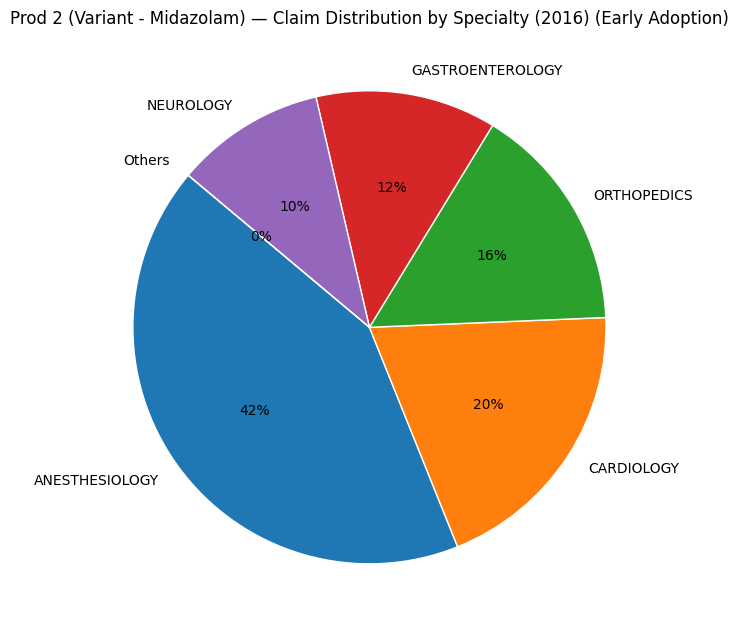

In [288]:
plot_product_specialty_pie(
    df=market_df,
    product='Prod 2 (Variant - Midazolam)',
    year=2016,
    title_suffix='(Early Adoption)'
)


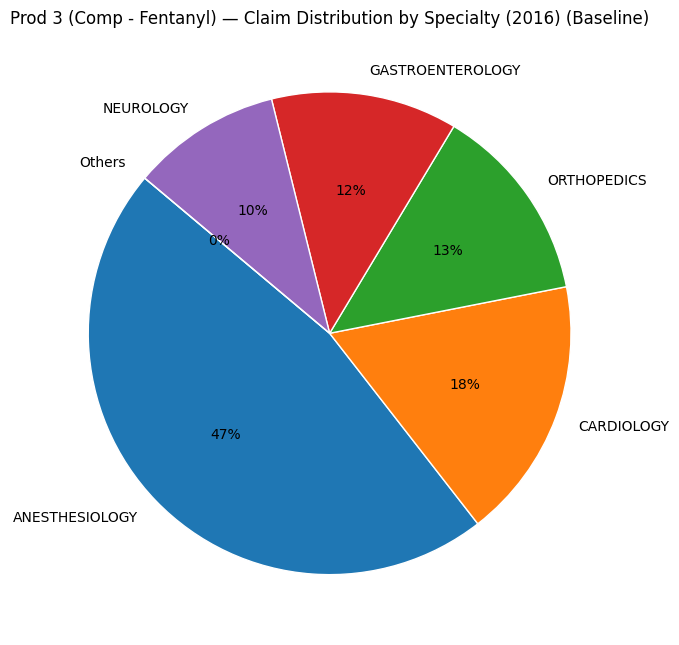

In [289]:
plot_product_specialty_pie(
    df=market_df,
    product='Prod 3 (Comp - Fentanyl)',
    year=2016,
    title_suffix='(Baseline)'
)


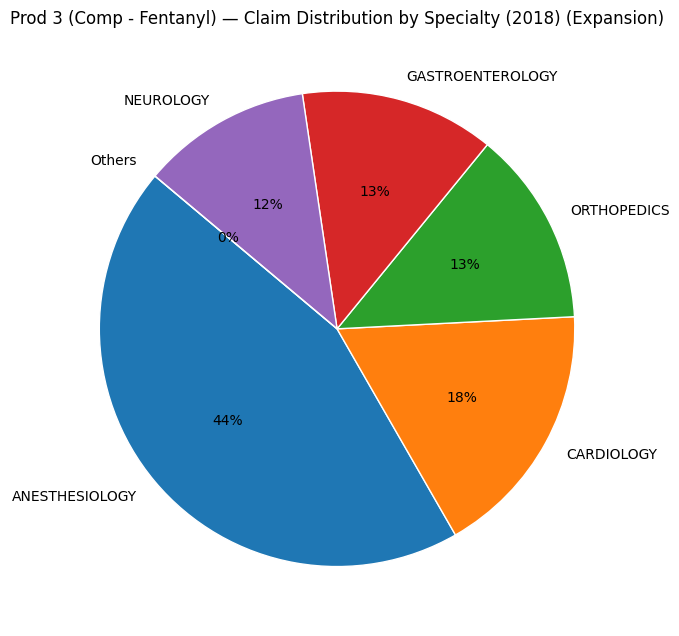

In [290]:
plot_product_specialty_pie(
    df=market_df,
    product='Prod 3 (Comp - Fentanyl)',
    year=2018,
    title_suffix='(Expansion)'
)


In [291]:
def plot_product_specialty_pie_with_counts(
    df,
    product,
    year,
    top_n=5,
    title_suffix=''
):
    data = (
        df[
            (df['product'] == product) &
            (df['year'] == year)
        ]
        .groupby('Specialty')['cur_clm_uniq_id']
        .nunique()
        .reset_index(name='claims')
    )

    total_claims = data['claims'].sum()

    top = data.sort_values('claims', ascending=False).head(top_n)

    others = pd.DataFrame({
        'Specialty': ['Others'],
        'claims': [total_claims - top['claims'].sum()]
    })

    plot_df = pd.concat([top, others], ignore_index=True)
    plot_df['pct'] = plot_df['claims'] / total_claims * 100

    plt.figure(figsize=(7, 7))
    plt.pie(
        plot_df['pct'],
        labels=plot_df['Specialty'],
        autopct='%1.0f%%',
        startangle=140,
        wedgeprops={'edgecolor': 'white'}
    )

    plt.title(
        f"{product} — Claim Distribution by Specialty ({year})\n"
        f"Total Claims: {total_claims:,} {title_suffix}"
    )
    plt.tight_layout()
    plt.show()


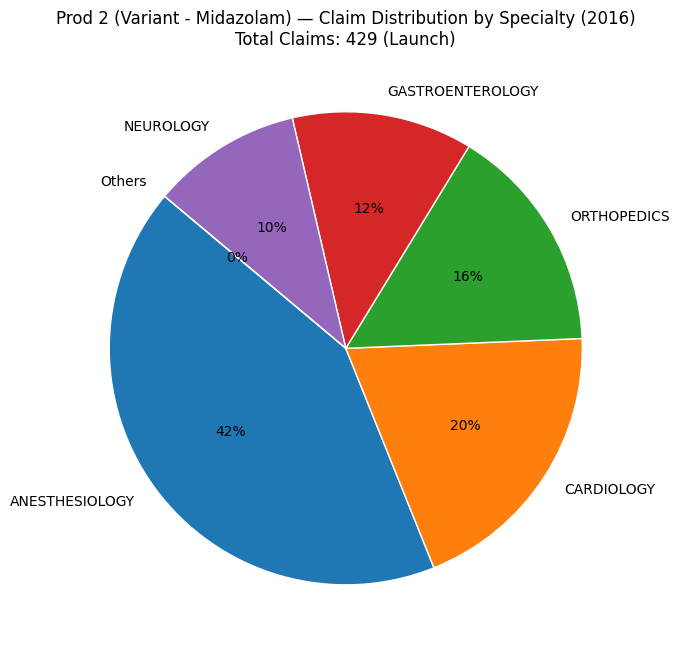

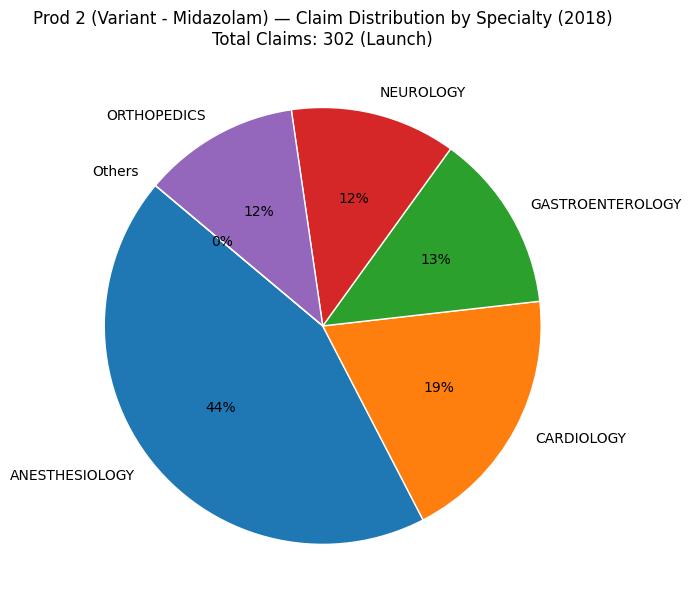

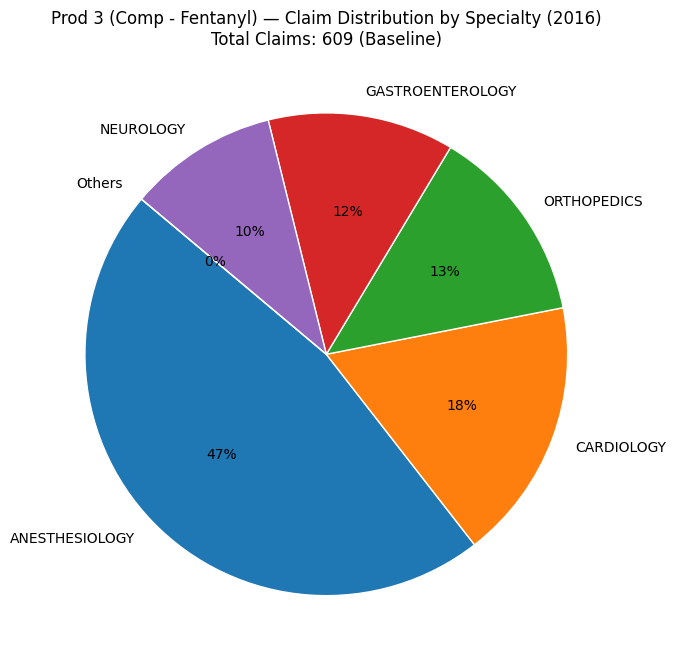

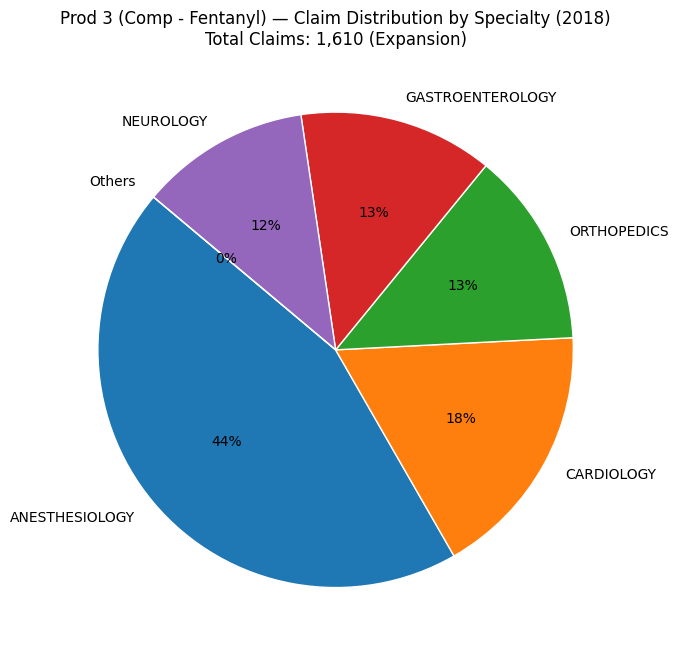

In [293]:
plot_product_specialty_pie_with_counts(
    market_df,
    'Prod 2 (Variant - Midazolam)',
    2016,
    title_suffix='(Launch)'
)

plot_product_specialty_pie_with_counts(
    market_df,
    'Prod 2 (Variant - Midazolam)',
    2018,
    title_suffix='(Launch)'
)

plot_product_specialty_pie_with_counts(
    market_df,
    'Prod 3 (Comp - Fentanyl)',
    2016,
    title_suffix='(Baseline)'
)

plot_product_specialty_pie_with_counts(
    market_df,
    'Prod 3 (Comp - Fentanyl)',
    2018,
    title_suffix='(Expansion)'
)
